<center><h1 style="color:mediumseagreen">Group Project Data Mining I 2024/25</h1></center>
<br>
<h4 style="color:black">Group 9:</h4>
   <ul style="margin-left: 0%; color: black;">
   The project was a part of a group assignment in Data Mining 1 course at NovaIMS, first semester of 2024/25 study year. It follows a path from data exploration, visualization and understanding, up to various forms of data clustering in order to identify the various similar segments/groups that appear in the dataset.

<br>



<center><h3 style="color:mediumseagreen">Librarys</h3></center>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans


In [4]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

<br>
<br>
<center><h3 style="color:mediumseagreen; font-size:25px;">Importing Data</h3></center>


In [6]:
df = pd.read_csv('customer_credit.csv')

In [7]:
#This is the unchanged original dataset, for comparison purposes
df_original = df

<br>
<br>
<center><h3 style="color:mediumseagreen; font-size:25px;">Data Exploration and Understanding</h3></center>


In [9]:
df_original.head()

Client_ID Gender Owns_Car Owns_Realty  Number_of_Children  Annual_Income  \
0    5008804      M        Y           Y                   0       427500.0   
1    5008805      M        Y           Y                   0       427500.0   
2    5008806      M        Y           Y                   0       112500.0   
3    5008808      F        N           Y                   0       270000.0   
4    5008810      F        N           Y                   0       270000.0   

            Income_Type                Education_Level        Marital_Status  \
0               Working               Higher education        Civil marriage   
1               Working               Higher education        Civil marriage   
2               Working  Secondary / secondary special               Married   
3  Commercial associate  Secondary / secondary special  Single / not married   
4  Commercial associate  Secondary / secondary special  Single / not married   

        Housing_Type  Days_Birth  Days_Employed  Has_Mobile_Phone  \
0   Rented apartment      -12005          -4542               1.0   
1   Rented apartment      -12005          -4542               1.0   
2  House / apartment      -21474          -1134               1.0   
3  House / apartment      -19110          -3051               1.0   
4  House / apartment      -19110          -3051               1.0   

   Has_Work_Phone  Has_Personal_Phone Has_Email Occupation_Type  Family_Size  \
0               1                   0         0             NaN          2.0   
1               1                   0         0             NaN          2.0   
2               0                   0         0  Security staff          2.0   
3               0                   1         1     Sales staff          1.0   
4               0                   1         1     Sales staff          1.0   

  Credit_Status  
0             C  
1             C  
2             C  
3             0  
4             C

In [10]:
df_original.shape

(24672, 19)

The dataset originally has 24672 rows and 18 columns - with the indexed client_id. When dropping the duplicates, we ended up with 14333 rows.

In [12]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24672 entries, 0 to 24671
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Client_ID           24672 non-null  int64  
 1   Gender              24672 non-null  object 
 2   Owns_Car            24672 non-null  object 
 3   Owns_Realty         24672 non-null  object 
 4   Number_of_Children  24672 non-null  int64  
 5   Annual_Income       24516 non-null  float64
 6   Income_Type         24672 non-null  object 
 7   Education_Level     24672 non-null  object 
 8   Marital_Status      24672 non-null  object 
 9   Housing_Type        24672 non-null  object 
 10  Days_Birth          24672 non-null  int64  
 11  Days_Employed       24672 non-null  int64  
 12  Has_Mobile_Phone    24616 non-null  float64
 13  Has_Work_Phone      24672 non-null  int64  
 14  Has_Personal_Phone  24672 non-null  int64  
 15  Has_Email           24672 non-null  object 
 16  Occu

In [13]:
df_original.columns

Index(['Client_ID', 'Gender', 'Owns_Car', 'Owns_Realty', 'Number_of_Children',
       'Annual_Income', 'Income_Type', 'Education_Level', 'Marital_Status',
       'Housing_Type', 'Days_Birth', 'Days_Employed', 'Has_Mobile_Phone',
       'Has_Work_Phone', 'Has_Personal_Phone', 'Has_Email', 'Occupation_Type',
       'Family_Size', 'Credit_Status'],
      dtype='object')

In [14]:
df_original.count()

Client_ID             24672
Gender                24672
Owns_Car              24672
Owns_Realty           24672
Number_of_Children    24672
Annual_Income         24516
Income_Type           24672
Education_Level       24672
Marital_Status        24672
Housing_Type          24672
Days_Birth            24672
Days_Employed         24672
Has_Mobile_Phone      24616
Has_Work_Phone        24672
Has_Personal_Phone    24672
Has_Email             24672
Occupation_Type       17043
Family_Size           24672
Credit_Status         24672
dtype: int64

In [15]:
#Number of unique values in each column
df_original.nunique()

Client_ID             24672
Gender                    2
Owns_Car                  2
Owns_Realty               2
Number_of_Children        8
Annual_Income           255
Income_Type               5
Education_Level           5
Marital_Status            6
Housing_Type              7
Days_Birth             6655
Days_Employed          3457
Has_Mobile_Phone          1
Has_Work_Phone            2
Has_Personal_Phone        2
Has_Email                 3
Occupation_Type          18
Family_Size               9
Credit_Status             8
dtype: int64

**Descriptive statistics for categorical data**



In [17]:
# Descritptive statistics for the categorical data
df_original.describe(include = ['O']).T

count unique                            top   freq
Gender           24672      2                              F  16406
Owns_Car         24672      2                              N  15301
Owns_Realty      24672      2                              Y  16293
Income_Type      24672      5                        Working  12711
Education_Level  24672      5  Secondary / secondary special  16782
Marital_Status   24672      6                        Married  16783
Housing_Type     24672      7              House / apartment  22019
Has_Email        24672      3                              0  21500
Occupation_Type  17043     18                       Laborers   4293
Credit_Status    24672      8                              C  12974

<br>
<br>
<center><h3 style="color:mediumseagreen; font-size:25px;">Data Preprocessing</h3></center>


In [19]:
#Setting the Client_ID column as the index.
df = df.set_index('Client_ID')

In [20]:
duplicate_rows = df_original.duplicated()
num_duplicates = duplicate_rows.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [21]:
#Using the drop_duplicates function to drop the duplicate rows.
df = df.drop_duplicates()

We decided to drop the duplicate rows. However, we decided to keep the "duplicated rows" where all the values, with the exception of the Credit_Status, are the same.

In [23]:
#Adding a column 'Age', since 'Days_Birth' is more difficult to understand, and to use in further code implementations.
df['Age'] = (df['Days_Birth'] / -365).astype(int)

In [24]:
# Create 'Employed_Years' and 'Unemployed_Years'
df['Employed_Years'] = df['Days_Employed'].apply(lambda x: int(-x / 365) if x <= 0 else 0)
df['Unemployed_Years'] = df['Days_Employed'].apply(lambda x: int(x / 365) if x > 0 else 0)

# Optionally, check the new columns
print(df[['Days_Employed', 'Employed_Years', 'Unemployed_Years']].head())


           Days_Employed  Employed_Years  Unemployed_Years
Client_ID                                                 
5008804            -4542              12                 0
5008806            -1134               3                 0
5008808            -3051               8                 0
5008810            -3051               8                 0
5008813           365243               0              1000


In [25]:
# Drop the Days_Birth and Days_Employed columns
df = df.drop(['Days_Birth', 'Days_Employed'], axis=1)

In [26]:
df.head()

Gender Owns_Car Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                  
5008804        M        Y           Y                   0       427500.0   
5008806        M        Y           Y                   0       112500.0   
5008808        F        N           Y                   0       270000.0   
5008810        F        N           Y                   0       270000.0   
5008813        F        N           Y                   0       283500.0   

                    Income_Type                Education_Level  \
Client_ID                                                        
5008804                 Working               Higher education   
5008806                 Working  Secondary / secondary special   
5008808    Commercial associate  Secondary / secondary special   
5008810    Commercial associate  Secondary / secondary special   
5008813               Pensioner               Higher education   

                 Marital_Status       Housing_Type  Has_Mobile_Phone  \
Client_ID                                                              
5008804          Civil marriage   Rented apartment               1.0   
5008806                 Married  House / apartment               1.0   
5008808    Single / not married  House / apartment               1.0   
5008810    Single / not married  House / apartment               1.0   
5008813               Separated  House / apartment               1.0   

           Has_Work_Phone  Has_Personal_Phone Has_Email Occupation_Type  \
Client_ID                                                                 
5008804                 1                   0         0             NaN   
5008806                 0                   0         0  Security staff   
5008808                 0                   1         1     Sales staff   
5008810                 0                   1         1     Sales staff   
5008813                 0                   0         0             NaN   

           Family_Size Credit_Status  Age  Employed_Years  Unemployed_Years  
Client_ID                                                                    
5008804            2.0             C   32              12                 0  
5008806            2.0             C   58               3                 0  
5008808            1.0             0   52               8                 0  
5008810            1.0             C   52               8                 0  
5008813            1.0             0   61               0              1000

In [27]:
df['Unemployed_Years'].value_counts()

Unemployed_Years
0       11876
1000     2457
Name: count, dtype: int64

In [28]:
df['Income_Type'].value_counts()

Income_Type
Working                 7329
Commercial associate    3405
Pensioner               2474
State servant           1122
Student                    3
Name: count, dtype: int64

In [29]:
df['Education_Level'].value_counts()

Education_Level
Secondary / secondary special    9818
Higher education                 3785
Incomplete higher                 565
Lower secondary                   153
Academic degree                    12
Name: count, dtype: int64

In [30]:
education = {
    'Secondary': ['Secondary / secondary special'],
    'Higher Education': ['Higher education', 'Academic degree'],
    'Incomplete Higher Education': ['Incomplete higher'],
    'Lower Secondary': ['Lower secondary']
}

mapping = {old: new for new, olds in education.items() for old in olds}

df['Education_Level'] = df['Education_Level'].replace(mapping)

In [31]:
# Creating a mapping for Education_Level
education_mapping = {
    'Lower Secondary': 1,
    'Secondary': 2,
    'Incomplete Higher Education': 3,
    'Higher Education': 4
}

# Apply the mapping to the Education_Level column
df['Education_Level'] = df['Education_Level'].map(education_mapping)

# Check if it worked
print(df['Education_Level'].unique())


[4 2 3 1]


In [32]:
df['Marital_Status'].value_counts()

Marital_Status
Married                 9570
Single / not married    1933
Civil marriage          1155
Separated                838
Widow                    599
?                        238
Name: count, dtype: int64

In [33]:
marital = {
    'Single': ['Single / not married'],
    'Widowed': ['Widow'],
    'Married': ['Civil marriage' , 'Married']
}

marital_mapping = {old: new for new, olds in marital.items() for old in olds}

df['Marital_Status'] = df['Marital_Status'].replace(marital_mapping)

In [34]:
df['Marital_Status'].value_counts()

Marital_Status
Married      10725
Single        1933
Separated      838
Widowed        599
?              238
Name: count, dtype: int64

In [35]:
#Since there is a small perecntage with '?', we can delete them
df = df.drop(df[df['Marital_Status'] == '?'].index)

In [36]:
df['Credit_Status'].value_counts()

Credit_Status
C    6340
0    4564
X    2891
1     219
5      51
2      19
3       6
4       5
Name: count, dtype: int64

In [37]:
#X: No loan for the month → 0
#C: Paid off that month → 1
#0: 1-29 days past due → 2
#1: 30-59 days past due → 3
#2: 60-89 days overdue → 4
#3: 90-119 days overdue → 5
#4: 120-149 days overdue → 6
#5: Overdue or bad debts (write-offs for more than 150 days) → 7

credit_status_mapping = {
    'X': 0,
    'C': 1,
    '0': 2,
    '1': 3,
    '2': 4,
    '3': 5,
    '4': 6,
    '5': 7
}

df['Credit_Status'] = df['Credit_Status'].map(credit_status_mapping)

In [38]:
# Convert 'Y' to 1 and 'N' to 0 in Owns_Car and Owns_Realty
df['Owns_Car'] = df['Owns_Car'].map({'Y': 1, 'N': 0})
df['Owns_Realty'] = df['Owns_Realty'].map({'Y': 1, 'N': 0})

In [39]:
df['Has_Email'].value_counts()

Has_Email
0    11931
1     1203
?      961
Name: count, dtype: int64

In [40]:
# Replace '?' with 'no' in the Has_Email column
df['Has_Email'] = df['Has_Email'].replace('?', '0')

# Check the result to ensure the change was made
df['Has_Email'].value_counts()

Has_Email
0    12892
1     1203
Name: count, dtype: int64

In [41]:
df['Has_Mobile_Phone'].value_counts()

Has_Mobile_Phone
1.0    14040
Name: count, dtype: int64

In [42]:
#Since all rows have the same value, we can delete the column
df = df.drop(columns=['Has_Mobile_Phone'])

In [43]:
def check_family_consistency(row):
    if row['Marital_Status'] in ['Married', 'Civil marriage']:
        expected_family_size = row['Number_of_Children'] + 2  # Casados e casamento civil têm 2 adultos
    elif row['Marital_Status'] == 'Divorced':
        expected_family_size = row['Number_of_Children'] + 1  # Divorciados têm 1 adulto
    elif row['Marital_Status'] == 'Single':
        expected_family_size = row['Number_of_Children'] + 1  # Solteiros têm 1 adulto
    elif row['Marital_Status'] == 'Widowed':
        expected_family_size = row['Number_of_Children'] + 1  # Viúvos têm 1 adulto
    else:
        # Para outros estados civis, não aplicamos regras
        return None
    
    # Verifica se o tamanho da família é inconsistente
    return row['Family_Size'] != expected_family_size


df['Family_Consistency_Error'] = df.apply(check_family_consistency, axis=1)

# Filter rows where there's an inconsistency
inconsistent_rows = df[df['Family_Consistency_Error'] == True]



print(f"Number of inconsistent rows: {len(inconsistent_rows)}")
print("Sample of inconsistent rows:")
print(inconsistent_rows[['Number_of_Children', 'Family_Size', 'Marital_Status']])

Number of inconsistent rows: 35
Sample of inconsistent rows:
           Number_of_Children  Family_Size Marital_Status
Client_ID                                                
5010838                     0          2.0         Single
5010869                     1          1.0         Single
5021314                     0          2.0         Single
5023641                     2          1.0        Married
5023738                     0          2.0         Single
5024069                     0          2.0         Single
5029028                     0          2.0         Single
5035868                     0          2.0         Single
5036469                     0          2.0         Single
5041073                     0          2.0         Single
5045457                     2          1.0        Married
5046324                     1          3.0         Single
5046328                     1          3.0         Single
5053148                     1          1.0        Married
5053361    

In [44]:
# Delete inconsistent rows
df = df[df['Family_Consistency_Error'] == False]

# Delete column 'Family_Consistency_Error' after deleting the inconsistent rows
df = df.drop(columns=['Family_Consistency_Error'])


In [45]:
df['Marital_Status'].value_counts()

Marital_Status
Married    10719
Single      1904
Widowed      599
Name: count, dtype: int64

In [46]:
df.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0       427500.0   
5008806        M         1            1                   0       112500.0   
5008808        F         0            1                   0       270000.0   
5008810        F         0            1                   0       270000.0   
5008815        M         1            1                   0       270000.0   

                    Income_Type  Education_Level Marital_Status  \
Client_ID                                                         
5008804                 Working                4        Married   
5008806                 Working                2        Married   
5008808    Commercial associate                2         Single   
5008810    Commercial associate                2         Single   
5008815                 Working                4        Married   

                Housing_Type  Has_Work_Phone  Has_Personal_Phone Has_Email  \
Client_ID                                                                    
5008804     Rented apartment               1                   0         0   
5008806    House / apartment               0                   0         0   
5008808    House / apartment               0                   1         1   
5008810    House / apartment               0                   1         1   
5008815    House / apartment               1                   1         1   

          Occupation_Type  Family_Size  Credit_Status  Age  Employed_Years  \
Client_ID                                                                    
5008804               NaN          2.0              1   32              12   
5008806    Security staff          2.0              1   58               3   
5008808       Sales staff          1.0              2   52               8   
5008810       Sales staff          1.0              1   52               8   
5008815       Accountants          2.0              2   46               2   

           Unemployed_Years  
Client_ID                    
5008804                   0  
5008806                   0  
5008808                   0  
5008810                   0  
5008815                   0

In [47]:
df.isna().sum()

Gender                   0
Owns_Car                 0
Owns_Realty              0
Number_of_Children       0
Annual_Income          142
Income_Type              0
Education_Level          0
Marital_Status           0
Housing_Type             0
Has_Work_Phone           0
Has_Personal_Phone       0
Has_Email                0
Occupation_Type       4061
Family_Size              0
Credit_Status            0
Age                      0
Employed_Years           0
Unemployed_Years         0
dtype: int64

In [48]:
df.isna().sum()/len(df)*100

Gender                 0.000000
Owns_Car               0.000000
Owns_Realty            0.000000
Number_of_Children     0.000000
Annual_Income          1.073968
Income_Type            0.000000
Education_Level        0.000000
Marital_Status         0.000000
Housing_Type           0.000000
Has_Work_Phone         0.000000
Has_Personal_Phone     0.000000
Has_Email              0.000000
Occupation_Type       30.713962
Family_Size            0.000000
Credit_Status          0.000000
Age                    0.000000
Employed_Years         0.000000
Unemployed_Years       0.000000
dtype: float64

In [49]:
# Calculate the mean of the 'Annual_Income' column, ignoring NaN values
mean_income = df['Annual_Income'].mean()

# Replace missing values with the mean
df['Annual_Income'] = df['Annual_Income'].fillna(mean_income)

# Optionally, check the updated column
print(df['Annual_Income'].head())

Client_ID
5008804    427500.0
5008806    112500.0
5008808    270000.0
5008810    270000.0
5008815    270000.0
Name: Annual_Income, dtype: float64


In [50]:
#Code to check
pensioners_over_56 = df[(df['Age'] > 56) & (df['Income_Type'] == 'Pensioner')]
pensioners_over_56.count()
unique_occupation_types = pensioners_over_56['Occupation_Type'].unique()
unique_occupation_types

array([nan], dtype=object)

In [51]:
#Assigning the Retired occupation_type
df.loc[(df['Age'] > 56) & (df['Income_Type'] == 'Pensioner'), 'Occupation_Type'] = 'Retired'

In [52]:
#Code to check
pensioners_under_56 = df[(df['Age'] < 56) & (df['Income_Type'] == 'Pensioner') & (df['Unemployed_Years'] > 0)]
pensioners_under_56.count()
unique_occupation_types = pensioners_under_56['Occupation_Type'].unique()
unique_occupation_types

array([nan], dtype=object)

In [53]:
#Assigning the Unemployed occupation_type
df.loc[(df['Age'] < 56) & (df['Income_Type'] == 'Pensioner') & (df['Unemployed_Years'] > 0), 'Occupation_Type'] = 'Unemployed'

In [54]:
#Code to check
employed_pensioners = df[(df['Income_Type'] == 'Pensioner')]
employed_pensioners.count()
unique_occupation_types = employed_pensioners['Occupation_Type'].isna().sum()*100/len(df)
unique_occupation_types

1.1420360006050523

In [55]:
#Checking which is the income type of the missing values in occupation_type
missing_rows = df[df['Occupation_Type'].isna()]
print(missing_rows['Income_Type'].value_counts())

Income_Type
Working                 1106
Commercial associate     503
State servant            186
Pensioner                151
Student                    1
Name: count, dtype: int64


In [56]:
student_rows = df[df['Income_Type'] == 'Student']
student_rows.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5010458        F         0            1                   0       171000.0   
5025088        M         0            0                   0       135000.0   
5047796        F         0            1                   1       112500.0   

          Income_Type  Education_Level Marital_Status       Housing_Type  \
Client_ID                                                                  
5010458       Student                4        Married  House / apartment   
5025088       Student                4         Single       With parents   
5047796       Student                2        Married  House / apartment   

           Has_Work_Phone  Has_Personal_Phone Has_Email Occupation_Type  \
Client_ID                                                                 
5010458                 0                   0         1      Core staff   
5025088                 0                   0         1             NaN   
5047796                 0                   0         0        Laborers   

           Family_Size  Credit_Status  Age  Employed_Years  Unemployed_Years  
Client_ID                                                                     
5010458            2.0              1   51              10                 0  
5025088            1.0              1   24               1                 0  
5047796            3.0              2   33               2                 0

In [57]:
df = df.drop(df[df['Income_Type'] == 'Student'].index)

In [58]:
df = df.drop(df[(df['Age'] < 56) & (df['Income_Type'] == 'Pensioner') & (df['Employed_Years'] > 0)].index)

In [59]:
#Assigning the Private Sector Worker income_type to deal with the commercial associate being not part of this categorization, but also deal with the working not being specific etc
df.loc[df['Income_Type'].isin(['Working', 'Commercial associate']), 'Income_Type'] = 'Private Sector Worker'

In [60]:
df[df['Occupation_Type'].isna()]['Income_Type'].unique()

array(['Private Sector Worker', 'State servant', 'Pensioner'],
      dtype=object)

In [61]:
df.isna().sum()/len(df)*100

Gender                 0.000000
Owns_Car               0.000000
Owns_Realty            0.000000
Number_of_Children     0.000000
Annual_Income          0.000000
Income_Type            0.000000
Education_Level        0.000000
Marital_Status         0.000000
Housing_Type           0.000000
Has_Work_Phone         0.000000
Has_Personal_Phone     0.000000
Has_Email              0.000000
Occupation_Type       14.707664
Family_Size            0.000000
Credit_Status          0.000000
Age                    0.000000
Employed_Years         0.000000
Unemployed_Years       0.000000
dtype: float64

In [62]:
# Filter rows where 'Occupation_Type' is missing
missing_occupation_rows = df[df['Occupation_Type'].isna()]

# Display the rows
missing_occupation_rows.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0       427500.0   
5008834        F         0            1                   1       112500.0   
5008951        M         0            1                   1       225000.0   
5008953        M         0            1                   1       225000.0   
5008954        M         0            1                   1       225000.0   

                     Income_Type  Education_Level Marital_Status  \
Client_ID                                                          
5008804    Private Sector Worker                4        Married   
5008834    Private Sector Worker                2         Single   
5008951    Private Sector Worker                2        Married   
5008953    Private Sector Worker                2        Married   
5008954    Private Sector Worker                2        Married   

                Housing_Type  Has_Work_Phone  Has_Personal_Phone Has_Email  \
Client_ID                                                                    
5008804     Rented apartment               1                   0         0   
5008834    House / apartment               0                   0         0   
5008951    House / apartment               0                   0         0   
5008953    House / apartment               0                   0         0   
5008954    House / apartment               0                   0         0   

          Occupation_Type  Family_Size  Credit_Status  Age  Employed_Years  \
Client_ID                                                                    
5008804               NaN          2.0              1   32              12   
5008834               NaN          2.0              1   30               4   
5008951               NaN          3.0              1   28               7   
5008953               NaN          3.0              0   28               7   
5008954               NaN          3.0              2   28               7   

           Unemployed_Years  
Client_ID                    
5008804                   0  
5008834                   0  
5008951                   0  
5008953                   0  
5008954                   0

In [63]:
df.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0       427500.0   
5008806        M         1            1                   0       112500.0   
5008808        F         0            1                   0       270000.0   
5008810        F         0            1                   0       270000.0   
5008815        M         1            1                   0       270000.0   

                     Income_Type  Education_Level Marital_Status  \
Client_ID                                                          
5008804    Private Sector Worker                4        Married   
5008806    Private Sector Worker                2        Married   
5008808    Private Sector Worker                2         Single   
5008810    Private Sector Worker                2         Single   
5008815    Private Sector Worker                4        Married   

                Housing_Type  Has_Work_Phone  Has_Personal_Phone Has_Email  \
Client_ID                                                                    
5008804     Rented apartment               1                   0         0   
5008806    House / apartment               0                   0         0   
5008808    House / apartment               0                   1         1   
5008810    House / apartment               0                   1         1   
5008815    House / apartment               1                   1         1   

          Occupation_Type  Family_Size  Credit_Status  Age  Employed_Years  \
Client_ID                                                                    
5008804               NaN          2.0              1   32              12   
5008806    Security staff          2.0              1   58               3   
5008808       Sales staff          1.0              2   52               8   
5008810       Sales staff          1.0              1   52               8   
5008815       Accountants          2.0              2   46               2   

           Unemployed_Years  
Client_ID                    
5008804                   0  
5008806                   0  
5008808                   0  
5008810                   0  
5008815                   0

In [64]:
df['Occupation_Type'].value_counts()

Occupation_Type
Laborers                 2304
Retired                  1697
Core staff               1244
Sales staff              1236
Managers                 1124
Drivers                   861
High skill tech staff     499
Accountants               432
Unemployed                417
Medicine staff            397
Cooking staff             243
Security staff            235
Cleaning staff            191
Private service staff     109
Low-skill Laborers         73
Secretaries                69
Waiters/barmen staff       50
HR staff                   31
Realty agents              27
IT staff                   23
Name: count, dtype: int64

In [65]:
sectors = {
    'Services Sector': ['Sales staff', 'Waiters/barmen staff', 'Private service staff',
                      'Security staff', 'Cleaning staff', 'Realty agents', 'Drivers'],
    'Healthcare & Medical': ['Medicine staff'],
    'Technology & IT': ['High skill tech staff', 'IT staff'],
    'Finance & Business': ['Accountants', 'Managers', 'HR staff', 'Core staff', 'Secretaries'],
    'Industrial/Manufacturing': ['Laborers', 'Low-skill Laborers'],
    'Food Services': ['Cooking staff']
}

mapping = {job: sector for sector, jobs in sectors.items() for job in jobs}

df['Occupation_Type'] = df['Occupation_Type'].replace(mapping)

In [66]:
df['Occupation_Type'].value_counts()

Occupation_Type
Finance & Business          2900
Services Sector             2709
Industrial/Manufacturing    2377
Retired                     1697
Technology & IT              522
Unemployed                   417
Healthcare & Medical         397
Food Services                243
Name: count, dtype: int64

In [67]:
df['Housing_Type'].value_counts()

Housing_Type
House / apartment      11831
With parents             622
Municipal apartment      419
Rented apartment         183
Office apartment          98
Co-op apartment           50
Working                    1
Name: count, dtype: int64

In [68]:
housing_mapping = {
    'House / apartment': 'House or Apartment',
    'With parents': 'With Parents',
    'Municipal apartment': 'Municipal Apartment',
    'Rented apartment': 'Rented Apartment',
    'Office apartment': 'Office Apartment',
    'Co-op apartment': 'Co-op Apartment'
}

df = df.drop(df[df['Housing_Type'] == 'Working'].index)

# Replace the values in the Housing_Type column
df['Housing_Type'] = df['Housing_Type'].replace(housing_mapping)

df['Housing_Type'].value_counts()


Housing_Type
House or Apartment     11831
With Parents             622
Municipal Apartment      419
Rented Apartment         183
Office Apartment          98
Co-op Apartment           50
Name: count, dtype: int64

In [69]:
df['Family_Size'] = df['Family_Size'].astype(int)
df['Annual_Income'] = df['Annual_Income'].astype(int)
df['Has_Email'] = df['Has_Email'].astype(int)

In [70]:
#Check if there are any missing values
df['Unemployed_Years'].value_counts()

Unemployed_Years
0       10942
1000     2261
Name: count, dtype: int64

In [71]:
df[df['Unemployed_Years'] == 1000]['Occupation_Type'].isna().sum()

147

In [72]:
#Assuming

df[(df['Unemployed_Years'] == 1000) & (df['Occupation_Type'].isna()) & (df['Age'] == 56 )]['Income_Type'].value_counts()

Income_Type
Pensioner    147
Name: count, dtype: int64

In [73]:
df['Occupation_Type'].value_counts()

Occupation_Type
Finance & Business          2900
Services Sector             2709
Industrial/Manufacturing    2377
Retired                     1697
Technology & IT              521
Unemployed                   417
Healthcare & Medical         397
Food Services                243
Name: count, dtype: int64

In [74]:
df['Unemployed_Years'].value_counts()

Unemployed_Years
0       10942
1000     2261
Name: count, dtype: int64

We are just keeping the 'Employed_Years' column since the 'Unemployed_Years' has just one value and we are changing the name to 'Employment_Status'. In cases where Employed_Years is zero, we consider the individual as 'Unemployed'. This simplifies the data structure, making it easier to analyze employment status while preserving the relevant information.

In [76]:
# Renaming 'Employed_Years' column to a more meaningful name
df = df.rename(columns={'Employed_Years': 'Employment_Status'})

In [77]:
df.drop('Unemployed_Years', axis=1, inplace=True)

# Dealing with missing values on the occupation type



*  We used an imputation strategy to fill missing values in the 'Occupation_Type' column.

* We first created income brackets for the annual income values. Then, we looked at the most common occupations for different groups of people, based on their annual_income, income type and gender.
* If no occupation could be found for the exact combination of features, we progressively expanded the grouping to 'Income_Type' and 'Gender' and, if not, just by Income_Type. If still not working, the code just inputes the overall most common value.




In [80]:
print("Missing values:", df['Occupation_Type'].isnull().sum())

Missing values: 1942


In [81]:
# Create income brackets
df['Income_Bracket'] = pd.qcut(df['Annual_Income'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Simple function to get the most common value
def get_mode(x):
    return x.value_counts().index[0] if not x.empty else None

# Get most common occupations for each group
occupation_by_group = df.groupby(['Income_Type', 'Income_Bracket', 'Gender'])['Occupation_Type'].agg(get_mode)
occupation_by_group

Income_Type            Income_Bracket  Gender
Pensioner              Low             F                          Retired
                                       M                          Retired
                       Medium-Low      F                          Retired
                                       M                          Retired
                       Medium-High     F                          Retired
                                       M                          Retired
                       High            F                          Retired
                                       M                          Retired
Private Sector Worker  Low             F                  Services Sector
                                       M         Industrial/Manufacturing
                       Medium-Low      F               Finance & Business
                                       M         Industrial/Manufacturing
                       Medium-High     F               Finance & B

In [82]:
df_clean = df.copy()

# Filling the missing values
for idx, row in df_clean[df_clean['Occupation_Type'].isna()].iterrows():
    income_type = row['Income_Type']
    income_bracket = row['Income_Bracket']
    gender = row['Gender']

    # Try to get occupation from the same Income_Type, Income_Bracket, and Gender
    try:
        occupation = occupation_by_group.loc[income_type, income_bracket, gender]
        if occupation is not None:
            df_clean.loc[idx, 'Occupation_Type'] = occupation
            continue
    except:
        pass

    # If that fails, try Income_Type and Gender
    try:
        occupation = df_clean[(df_clean['Income_Type'] == income_type) &
                              (df_clean['Gender'] == gender)]['Occupation_Type'].value_counts().index[0]
        df_clean.loc[idx, 'Occupation_Type'] = occupation
        continue
    except:
        pass

    # If that fails, try just Income_Type
    try:
        occupation = df_clean[df_clean['Income_Type'] == income_type]['Occupation_Type'].value_counts().index[0]
        df_clean.loc[idx, 'Occupation_Type'] = occupation
        continue
    except:
        pass

    # If all else fails, use overall mode
    try:
        overall_mode = df_clean['Occupation_Type'].value_counts().index[0]
        df_clean.loc[idx, 'Occupation_Type'] = overall_mode
    except:
        pass

print("\nMissing values after imputation:", df_clean['Occupation_Type'].isnull().sum())


Missing values after imputation: 0


In [83]:
# Get the number of rows in the original and cleaned DataFrames
original_rows = len(df_original)
cleaned_rows = len(df_clean)

# Calculate how many rows were removed
removed_rows = original_rows - cleaned_rows

# Print the results
print(f"Original number of rows: {original_rows}")
print(f"Cleaned number of rows: {cleaned_rows}")
print(f"Number of rows removed: {removed_rows}")



#This is not working because we made changes to the original dataset.
#It would be good to see the difference between the original dataset and the final one

Original number of rows: 24672
Cleaned number of rows: 13203
Number of rows removed: 11469


Evaluating the performance of the first one

# Outliers

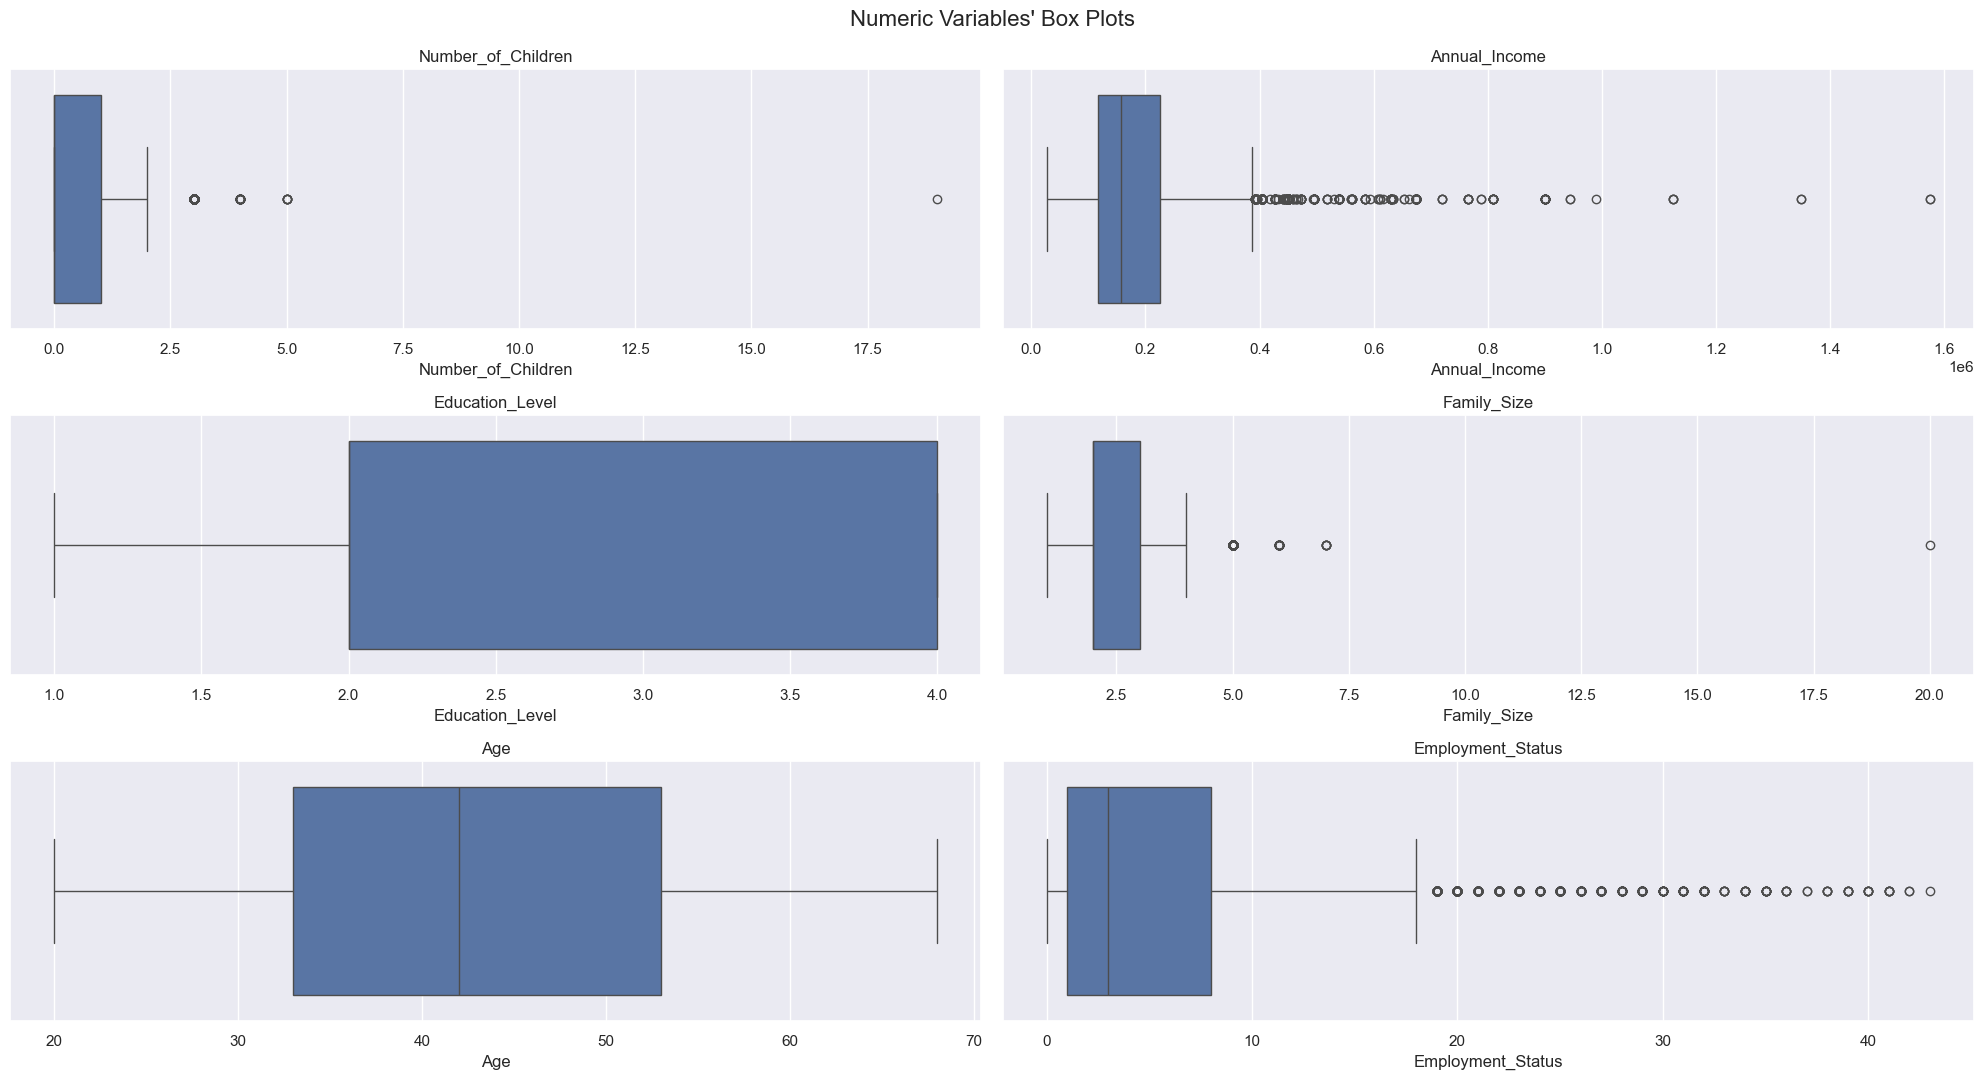

In [86]:
# Define metric and non-metric features
non_metric_features = ['Gender', 'Owns_Car', 'Owns_Realty', 'Income_Type', 'Marital_Status',
                       'Housing_Type','Has_Work_Phone','Has_Personal_Phone','Has_Email', 'Occupation_Type','Credit_Status','Income_Bracket']
metric_features = df_clean.columns.drop(non_metric_features).to_list()

# Check if metric_features is not empty
if len(metric_features) > 0:
    # All Numeric Variables' Box Plots in one figure
    sns.set()

    # Determine the number of rows and columns for the subplots
    num_plots = len(metric_features)
    num_cols = 2
    num_rows = math.ceil(num_plots / num_cols)

    # Prepare figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 11))

    # Plot data
    # Flatten the axes array and plot each feature
    for ax, feat in zip(axes.flatten(), metric_features):
        sns.boxplot(x=df_clean[feat], ax=ax)
        ax.set_title(feat)  # Set the title for each subplot

    # Remove any empty subplots
    for ax in axes.flatten()[num_plots:]:
        fig.delaxes(ax)

    # Layout
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to leave space for the title
    plt.suptitle("Numeric Variables' Box Plots", fontsize=16)

    # Save the figure
    if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
        # If the exp_analysis directory is not present, create it
        os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))

    plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'numeric_variables_boxplots.png'), dpi=200)
    plt.show()

else:
    print("No metric features to plot.")

In [87]:
df_clean['Number_of_Children'].value_counts()

Number_of_Children
0     9260
1     2586
2     1151
3      176
4       24
5        5
19       1
Name: count, dtype: int64

In [88]:
# Remove rows where the number of children is greater than or equal to a threshold
df_clean = df_clean[df_clean['Number_of_Children'] < 6]

# Check the result
print(df_clean['Number_of_Children'].value_counts())

Number_of_Children
0    9260
1    2586
2    1151
3     176
4      24
5       5
Name: count, dtype: int64


In [89]:
# Remove rows where the number of children is greater than or equal to a threshold
df_cleaned = df_clean[df_clean['Annual_Income'] > 800000]

# Check the result
print(df_cleaned['Annual_Income'].value_counts())

Annual_Income
900000     15
810000      8
1125000     3
1350000     2
945000      2
1575000     2
990000      1
Name: count, dtype: int64


In [90]:
df_clean['Family_Size'].value_counts()

Family_Size
2    7310
3    2363
1    2205
4    1125
5     170
6      24
7       5
Name: count, dtype: int64

In [91]:
# Remove rows where family size is greater than a threshold
df_clean = df_clean[df_clean['Family_Size'] <= 7]  # Keeping only rows with family size 7 or less

# Check the result
print(df_clean['Family_Size'].value_counts())

Family_Size
2    7310
3    2363
1    2205
4    1125
5     170
6      24
7       5
Name: count, dtype: int64


In [92]:
# Get the number of rows in the original and cleaned DataFrames
original_rows = len(df_original)
cleaned_rows = len(df_clean)

# Calculate how many rows were removed
removed_rows = original_rows - cleaned_rows

# Print the results
print(f"Original number of rows: {original_rows}")
print(f"Cleaned number of rows: {cleaned_rows}")
print(f"Number of rows removed: {removed_rows}")

Original number of rows: 24672
Cleaned number of rows: 13202
Number of rows removed: 11470


In [93]:
# Using Robust Scaler on numerical variables
# Robust to outliers and all
from sklearn.preprocessing import RobustScaler
numerical_cols = df_clean.select_dtypes(include ='number').columns
print(numerical_cols)
encoder_robust_sclr = RobustScaler().fit(df_clean[numerical_cols])
encoded_df= encoder_robust_sclr.transform(df_clean[numerical_cols])
encoded_df = pd.DataFrame(encoded_df, columns= numerical_cols).set_index(df_clean.index)
# Joining to original df
df_scaled = pd.concat([encoded_df, df_clean.drop(numerical_cols, axis =1)], axis =1)

Index(['Owns_Car', 'Owns_Realty', 'Number_of_Children', 'Annual_Income',
       'Education_Level', 'Has_Work_Phone', 'Has_Personal_Phone', 'Has_Email',
       'Family_Size', 'Credit_Status', 'Age', 'Employment_Status'],
      dtype='object')


## **Correlation between variables**


In [95]:
df_corr = df_scaled.copy()

In [96]:
corr = df_corr.corr(numeric_only=True)

In [97]:
corr.corr()

Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Owns_Car            1.000000    -0.146986            0.127950       0.308779   
Owns_Realty        -0.146986     1.000000           -0.139370      -0.070167   
Number_of_Children  0.127950    -0.139370            1.000000      -0.072860   
Annual_Income       0.308779    -0.070167           -0.072860       1.000000   
Education_Level     0.125525    -0.131856           -0.004391       0.367762   
Has_Work_Phone     -0.063619    -0.529859            0.020515      -0.202553   
Has_Personal_Phone -0.181695    -0.303911           -0.233535      -0.170495   
Has_Email          -0.055977     0.026324           -0.088543       0.069986   
Family_Size         0.149534    -0.149783            0.992978      -0.085173   
Credit_Status      -0.141336    -0.039424           -0.135838      -0.136502   
Age                -0.337276     0.254561           -0.631590      -0.194591   
Employment_Status  -0.116934    -0.174339           -0.055668      -0.029795   

                    Education_Level  Has_Work_Phone  Has_Personal_Phone  \
Owns_Car                   0.125525       -0.063619           -0.181695   
Owns_Realty               -0.131856       -0.529859           -0.303911   
Number_of_Children        -0.004391        0.020515           -0.233535   
Annual_Income              0.367762       -0.202553           -0.170495   
Education_Level            1.000000       -0.056683           -0.084719   
Has_Work_Phone            -0.056683        1.000000            0.482181   
Has_Personal_Phone        -0.084719        0.482181            1.000000   
Has_Email                  0.106564       -0.164452           -0.138998   
Family_Size               -0.022903        0.021842           -0.228516   
Credit_Status             -0.162042       -0.116348           -0.135501   
Age                       -0.358151       -0.331118            0.043397   
Employment_Status         -0.092948        0.137752           -0.008622   

                    Has_Email  Family_Size  Credit_Status       Age  \
Owns_Car            -0.055977     0.149534      -0.141336 -0.337276   
Owns_Realty          0.026324    -0.149783      -0.039424  0.254561   
Number_of_Children  -0.088543     0.992978      -0.135838 -0.631590   
Annual_Income        0.069986    -0.085173      -0.136502 -0.194591   
Education_Level      0.106564    -0.022903      -0.162042 -0.358151   
Has_Work_Phone      -0.164452     0.021842      -0.116348 -0.331118   
Has_Personal_Phone  -0.138998    -0.228516      -0.135501  0.043397   
Has_Email            1.000000    -0.110839      -0.079888 -0.203024   
Family_Size         -0.110839     1.000000      -0.150235 -0.606898   
Credit_Status       -0.079888    -0.150235       1.000000  0.034553   
Age                 -0.203024    -0.606898       0.034553  1.000000   
Employment_Status   -0.157587    -0.047359      -0.149791 -0.046019   

                    Employment_Status  
Owns_Car                    -0.116934  
Owns_Realty                 -0.174339  
Number_of_Children          -0.055668  
Annual_Income               -0.029795  
Education_Level             -0.092948  
Has_Work_Phone               0.137752  
Has_Personal_Phone          -0.008622  
Has_Email                   -0.157587  
Family_Size                 -0.047359  
Credit_Status               -0.149791  
Age                         -0.046019  
Employment_Status            1.000000

<Axes: >

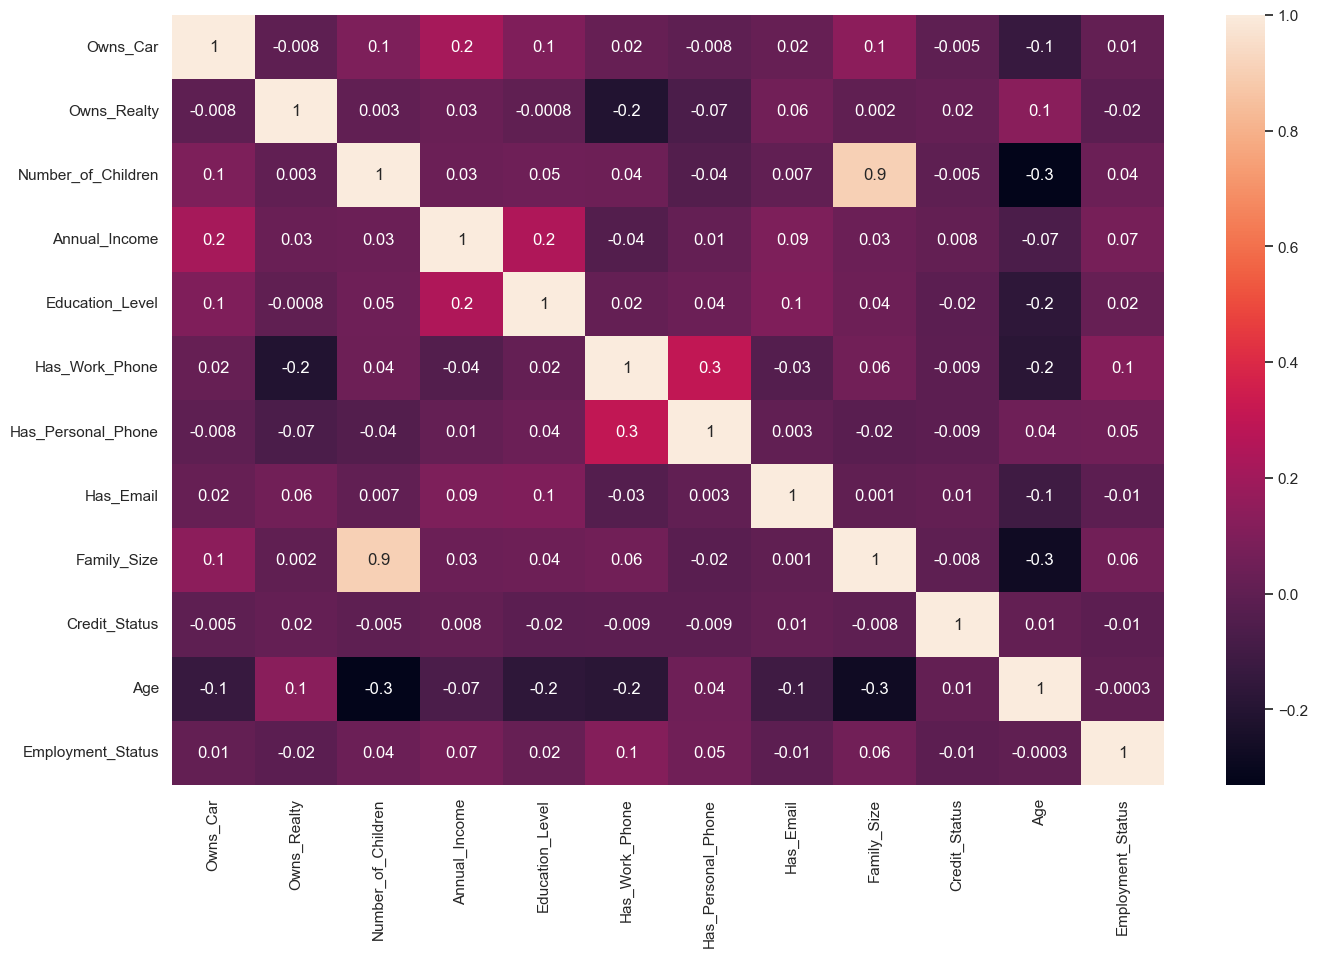

In [98]:
figure = plt.figure(figsize=(16,10))

sns.heatmap(data = corr, annot=True, fmt = '.1g')

In [99]:
df_scaled.drop('Number_of_Children', axis=1, inplace=True)

In [100]:
df_scaled.head()

Owns_Car  Owns_Realty  Annual_Income  Education_Level  \
Client_ID                                                          
5008804         1.0          0.0       2.500000              1.0   
5008806         1.0          0.0      -0.416667              0.0   
5008808         0.0          0.0       1.041667              0.0   
5008810         0.0          0.0       1.041667              0.0   
5008815         1.0          0.0       1.041667              1.0   

           Has_Work_Phone  Has_Personal_Phone  Has_Email  Family_Size  \
Client_ID                                                               
5008804               1.0                 0.0        0.0          0.0   
5008806               0.0                 0.0        0.0          0.0   
5008808               0.0                 1.0        1.0         -1.0   
5008810               0.0                 1.0        1.0         -1.0   
5008815               1.0                 1.0        1.0          0.0   

           Credit_Status  Age  Employment_Status Gender  \
Client_ID                                                 
5008804              0.0 -0.5           1.285714      M   
5008806              0.0  0.8           0.000000      M   
5008808              1.0  0.5           0.714286      F   
5008810              0.0  0.5           0.714286      F   
5008815              1.0  0.2          -0.142857      M   

                     Income_Type Marital_Status        Housing_Type  \
Client_ID                                                             
5008804    Private Sector Worker        Married    Rented Apartment   
5008806    Private Sector Worker        Married  House or Apartment   
5008808    Private Sector Worker         Single  House or Apartment   
5008810    Private Sector Worker         Single  House or Apartment   
5008815    Private Sector Worker        Married  House or Apartment   

              Occupation_Type Income_Bracket  
Client_ID                                     
5008804    Finance & Business           High  
5008806       Services Sector            Low  
5008808       Services Sector           High  
5008810       Services Sector           High  
5008815    Finance & Business           High

<br>
<br>
<center><h3 style="color:mediumseagreen; font-size:25px;">Modeling</h3></center>


## Economic Perspective
- Annual Income
- Credit Status
- Employment Status
- Income Bracket

## Demographic Perspective
- Age
- Family Size
- Gender
- Education Level

## Consumer Behavior Perspective
- Gender
- Owns_Realty
- Owns_Car
- Income_Bracket
- Education_Level
- Marital_Status
- Housing_Type
- Credit_Status
    


## **K-modes- Consumer Behaviour Perspect**

In [104]:
df_cons_behav = ['Gender', 'Owns_Realty', 'Owns_Car', 'Income_Bracket', 
                     'Education_Level', 'Marital_Status', 'Housing_Type', 'Credit_Status']

In [105]:
df_cons_behav

['Gender',
 'Owns_Realty',
 'Owns_Car',
 'Income_Bracket',
 'Education_Level',
 'Marital_Status',
 'Housing_Type',
 'Credit_Status']

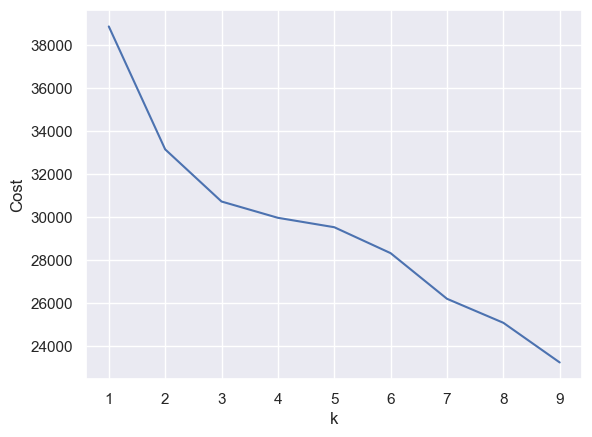

In [106]:
#Elbow graph
ks = range(1, 10)
costs = []

for k in ks:
    # Create a KModes instance with k clusters: model
    model = KModes(n_clusters=k, random_state=0)
    
    # Fit model to samples
    model.fit(df_scaled[df_cons_behav])
    
    # Append the cost to the list of costs
    costs.append(model.cost_)

# Plot ks vs costs
plt.plot(ks, costs)
plt.xlabel('k')
plt.ylabel('Cost')
plt.xticks(ks)
plt.show()

In [107]:
#K modes
kmodes = KModes(n_clusters=3, random_state=0)
kmodes.fit(df_scaled[df_cons_behav])

df_scaled['label_kmodes'] = kmodes.labels_

descr = df_scaled.groupby('label_kmodes').describe(include=['O'])
print(descr.reset_index(drop=True).T)

                                            0                      1  \
Gender          count                    9189                   2286   
                unique                      2                      2   
                top                         F                      M   
                freq                     7578                   1646   
Income_Type     count                    9189                   2286   
                unique                      3                      3   
                top     Private Sector Worker  Private Sector Worker   
                freq                     6541                   1929   
Marital_Status  count                    9189                   2286   
                unique                      3                      3   
                top                   Married                Married   
                freq                     7221                   1988   
Housing_Type    count                    9189                   

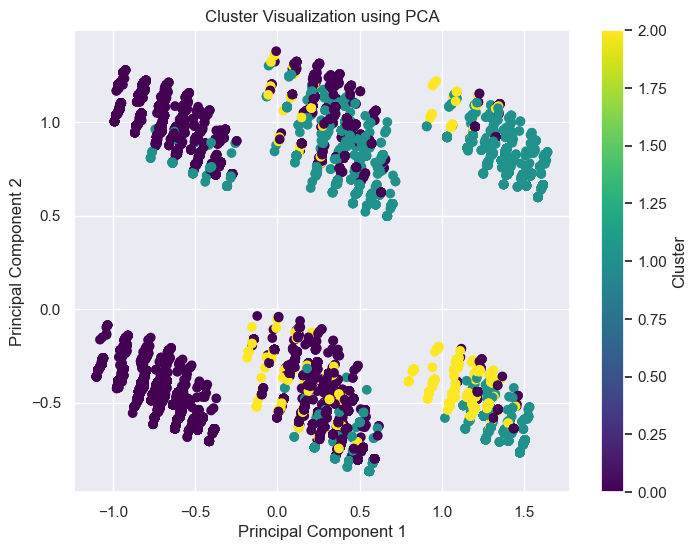

In [108]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical data (required for PCA)
encoder = OneHotEncoder(sparse_output=False)
encoded_data = encoder.fit_transform(df_scaled[df_cons_behav])

# Perform PCA to reduce dimensions to 2 for visualization
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_result = pca.fit_transform(encoded_data)

# Plot the PCA result with clusters colored by the labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_scaled['label_kmodes'], cmap='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()



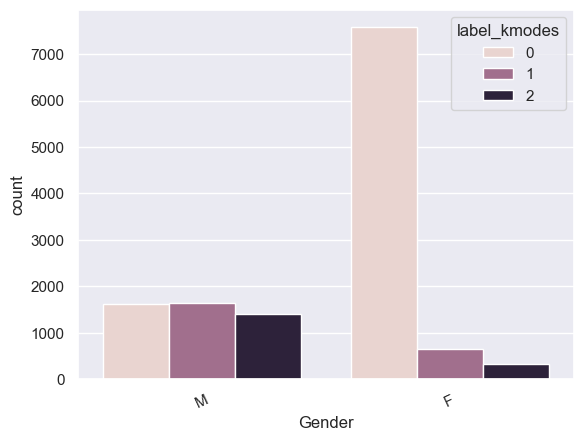

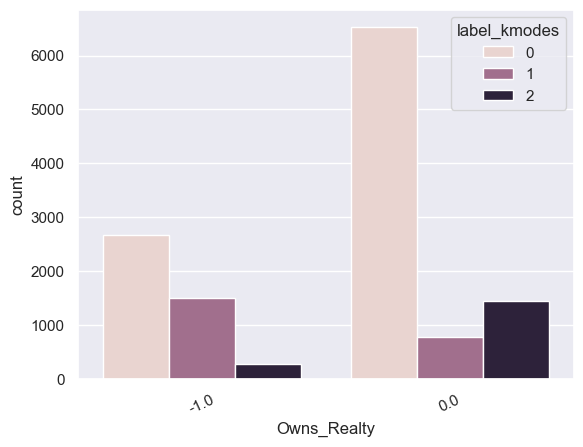

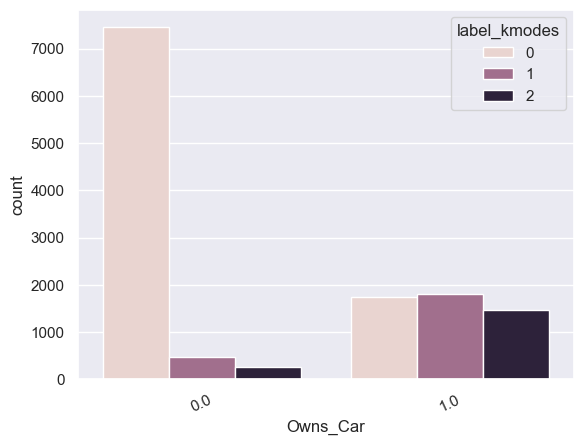

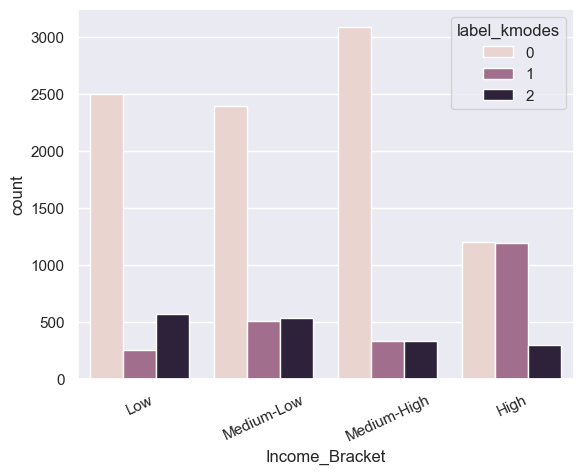

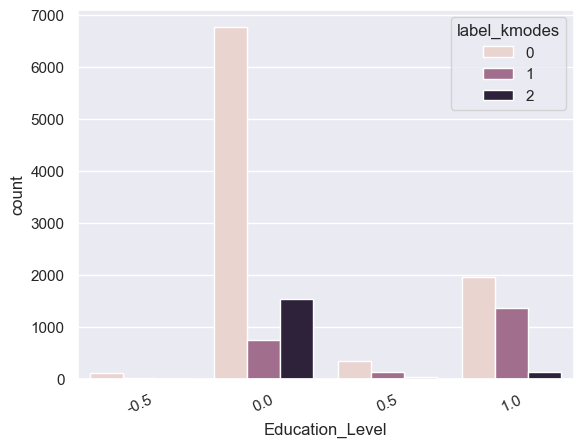

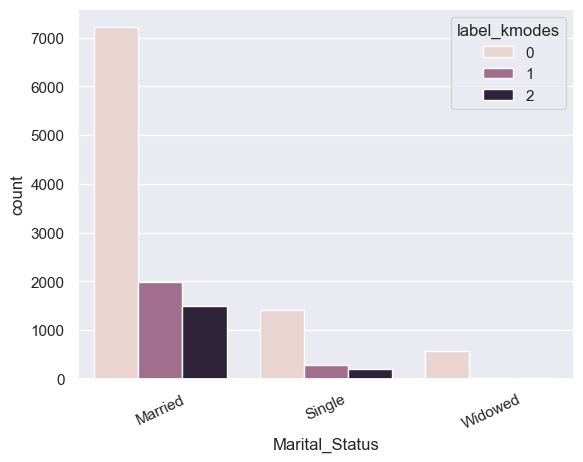

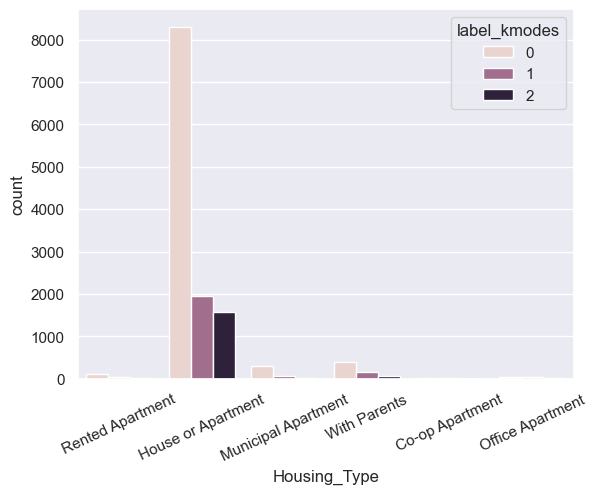

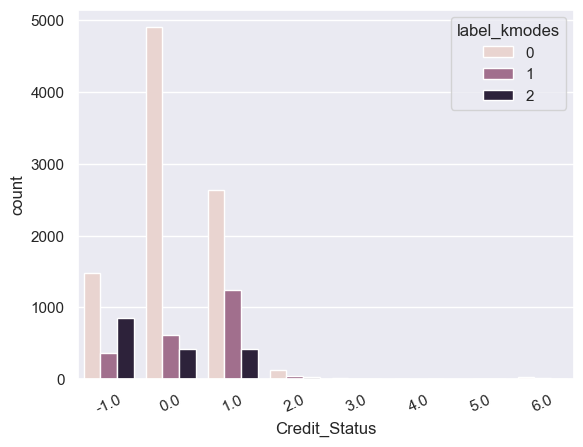

In [109]:
#plotting the kmodes result:
for col in df_cons_behav:
  sns.countplot(data=df_scaled, x=col, hue='label_kmodes')
  plt.xticks(rotation = 25)
  plt.show()

In [110]:
df_economic = df_clean[['Annual_Income','Credit_Status','Employment_Status', 'Owns_Realty']].copy()

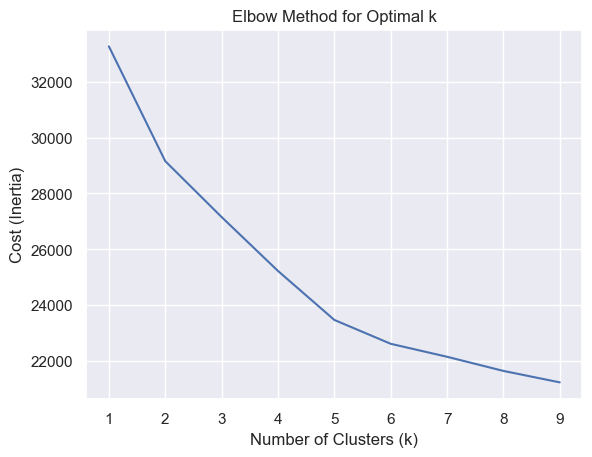

In [111]:
#Elbow graph
ks = range(1, 10)
costs = []

for k in ks:
    # Create a KModes instance with k clusters
    model = KModes(n_clusters=k, random_state=0)
    
    # Fit the model to the relevant columns of df_economic
    model.fit(df_economic)
    
    # Append the cost (inertia) to the list of costs
    costs.append(model.cost_)

# Plot k vs cost to visualize the elbow
plt.plot(ks, costs)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.xticks(ks)
plt.title('Elbow Method for Optimal k')
plt.show()

## **K-means- Economic Perspective**

In [113]:
df_clean.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0         427500   
5008806        M         1            1                   0         112500   
5008808        F         0            1                   0         270000   
5008810        F         0            1                   0         270000   
5008815        M         1            1                   0         270000   

                     Income_Type  Education_Level Marital_Status  \
Client_ID                                                          
5008804    Private Sector Worker                4        Married   
5008806    Private Sector Worker                2        Married   
5008808    Private Sector Worker                2         Single   
5008810    Private Sector Worker                2         Single   
5008815    Private Sector Worker                4        Married   

                 Housing_Type  Has_Work_Phone  Has_Personal_Phone  Has_Email  \
Client_ID                                                                      
5008804      Rented Apartment               1                   0          0   
5008806    House or Apartment               0                   0          0   
5008808    House or Apartment               0                   1          1   
5008810    House or Apartment               0                   1          1   
5008815    House or Apartment               1                   1          1   

              Occupation_Type  Family_Size  Credit_Status  Age  \
Client_ID                                                        
5008804    Finance & Business            2              1   32   
5008806       Services Sector            2              1   58   
5008808       Services Sector            1              2   52   
5008810       Services Sector            1              1   52   
5008815    Finance & Business            2              2   46   

           Employment_Status Income_Bracket  
Client_ID                                    
5008804                   12           High  
5008806                    3            Low  
5008808                    8           High  
5008810                    8           High  
5008815                    2           High

In [114]:
df_economic = df_scaled[['Annual_Income','Credit_Status','Employment_Status', 'Owns_Realty']].copy()

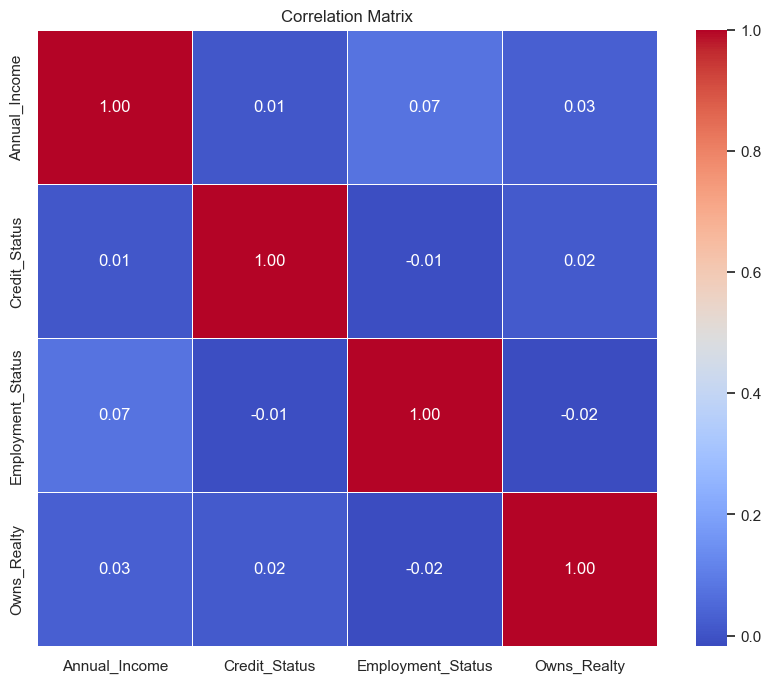

In [115]:
# correlation of the variables from the economic_data
# Calculate correlation matrix
correlation_matrix_kmeans = df_economic.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kmeans, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.6)
plt.title('Correlation Matrix')
plt.show()

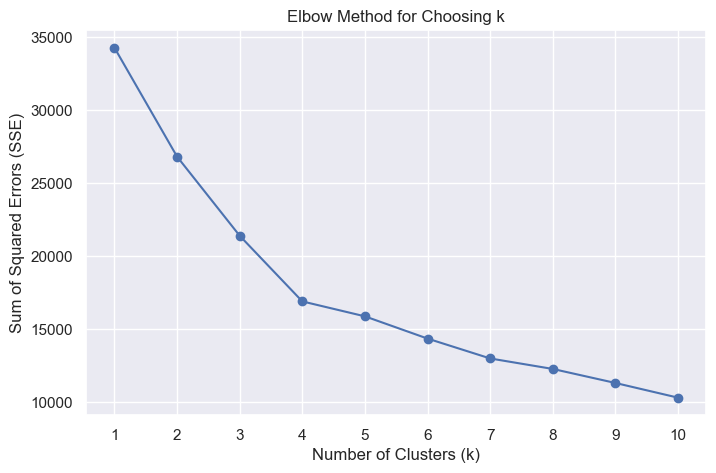

In [116]:
# Elbow Method 
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_economic)
    
    inertias.append(model.inertia_)

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Choosing k')
plt.xticks(ks)
plt.grid(True)
plt.show()

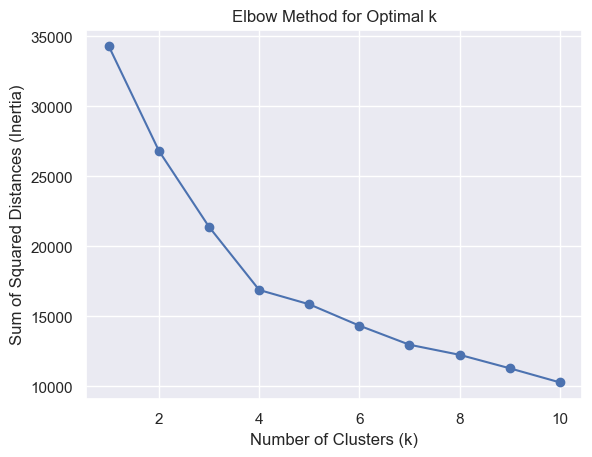

In [117]:
ks = range(1,11)  # Adjust the range based on your preferences
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit model to samples
    kmeans.fit(df_economic)

    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [118]:
# Number of clusters to test
k_values = [3, 4, 5]

# Results
silhouette_scores = {}

for k in k_values:
    # Create KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_economic)
    
    # Predict the clusters
    cluster_labels = kmeans.labels_
    
    # Calculate the Silhouette Score
    score = silhouette_score(df_economic, cluster_labels)
    silhouette_scores[k] = score

    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=3: 0.3153
Silhouette Score for k=4: 0.2883
Silhouette Score for k=5: 0.2860


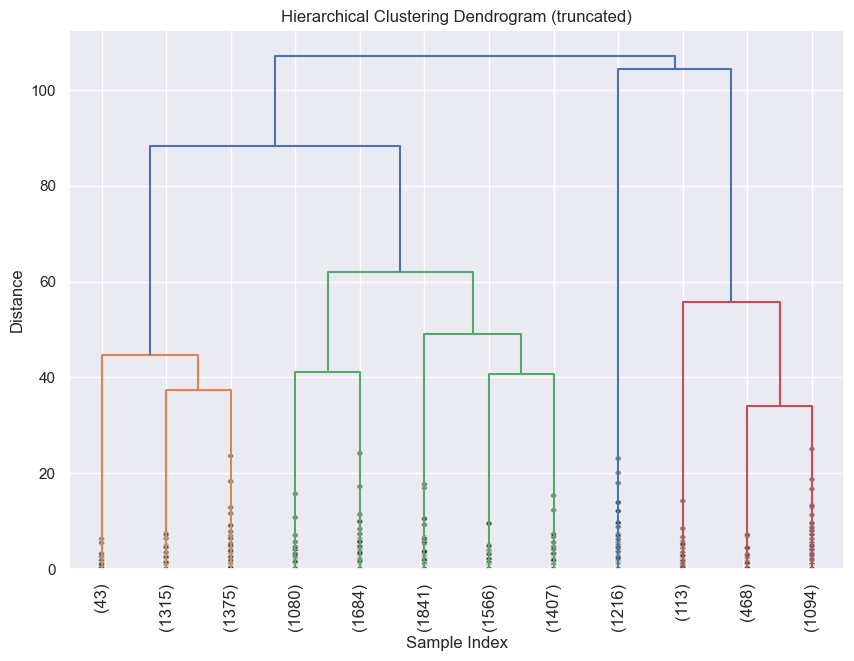

In [119]:
# Take a random sample
sample_df = df.sample(n=7000, random_state=42)

# Perform hierarchical clustering
hclustering = linkage(df_economic, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

dendrogram(
    hclustering,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

**We will first try with 3 clusters**

In [121]:
model_1 = KMeans(n_clusters=3)

In [122]:
model_1.fit(df_economic)

KMeans(n_clusters=3)

In [123]:
df_economic['label_kmeans_ec_3'] = model_1.labels_
df_economic

Annual_Income  Credit_Status  Employment_Status  Owns_Realty  \
Client_ID                                                                 
5008804         2.500000            0.0           1.285714          0.0   
5008806        -0.416667            0.0           0.000000          0.0   
5008808         1.041667            1.0           0.714286          0.0   
5008810         1.041667            0.0           0.714286          0.0   
5008815         1.041667            1.0          -0.142857          0.0   
...                  ...            ...                ...          ...   
5149190         2.708333            6.0          -0.285714         -1.0   
5149729        -0.625000            1.0           0.142857          0.0   
5149828         1.458333            6.0           0.428571          0.0   
5150049         1.166667            3.0          -0.285714          0.0   
5150337        -0.416667            1.0           0.000000          0.0   

           label_kmeans_ec_3  
Client_ID                     
5008804                    0  
5008806                    2  
5008808                    1  
5008810                    1  
5008815                    1  
...                      ...  
5149190                    1  
5149729                    1  
5149828                    1  
5150049                    1  
5150337                    1  

[13202 rows x 5 columns]

In [124]:
descr = df_economic.reset_index(drop=True).groupby('label_kmeans_ec_3').describe()
print(descr.T)

label_kmeans_ec_3                  0            1            2
Annual_Income     count  1954.000000  4716.000000  6532.000000
                  mean      0.360927     0.526741     0.018762
                  std       0.945984     1.196619     0.594459
                  min      -1.208333    -1.187500    -1.208333
                  25%      -0.208333    -0.208333    -0.416667
                  50%       0.208333     0.208333     0.000000
                  75%       0.625000     1.041667     0.416667
                  max       6.875000    13.125000     3.333333
Credit_Status     count  1954.000000  4716.000000  6532.000000
                  mean      0.118731     0.934054    -0.351500
                  std       0.708537     0.671885     0.477475
                  min      -1.000000    -1.000000    -1.000000
                  25%       0.000000     1.000000    -1.000000
                  50%       0.000000     1.000000     0.000000
                  75%       1.000000     1.000000     0

In [125]:
cluster0 = df_economic[df_economic.label_kmeans_ec_3==0]
cluster1 = df_economic[df_economic.label_kmeans_ec_3==1]
cluster2 = df_economic[df_economic.label_kmeans_ec_3==2]

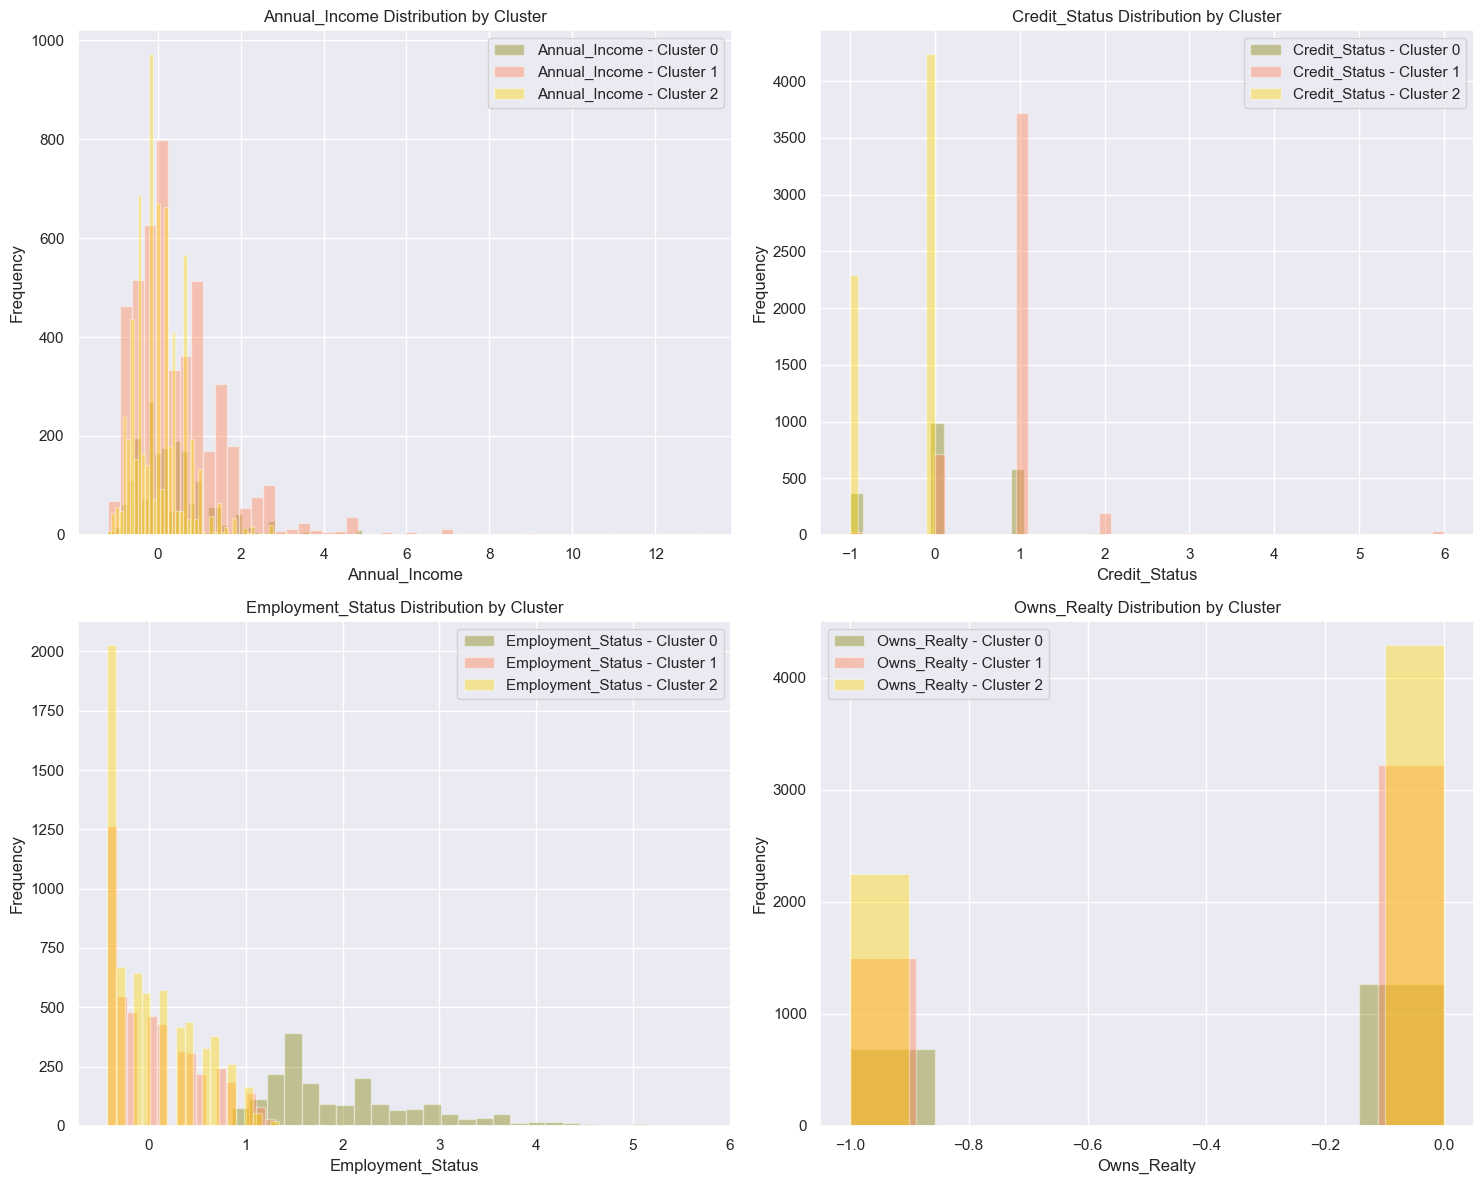

In [126]:
# Define the columns you want to plot
columns = ['Annual_Income', 'Credit_Status', 'Employment_Status', 'Owns_Realty']

# Define the colors for each cluster
cluster_colors = ['olive', 'coral', 'gold']

# Loop through each column and create a distribution plot for each cluster
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for cluster in range(3): 
        cluster_data = df_economic[df_economic['label_kmeans_ec_3'] == cluster]
        sns.distplot(cluster_data[column], color=cluster_colors[cluster], label=f'{column} - Cluster {cluster}', kde=False)
    
    plt.legend()
    plt.title(f'{column} Distribution by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [127]:
centroids_1 = model_1.cluster_centers_
centroids_1

array([[ 0.36062817,  0.11860941,  2.06682734, -0.35327198],
       [ 0.52851479,  0.93127511,  0.05440595, -0.31972933],
       [ 0.01644605, -0.3521559 ,  0.02746663, -0.34248888]])

In [128]:
# Get the centroids (cluster centers)
centroids = model_1.cluster_centers_

# Feature names
features = ['Annual_Income','Credit_Status','Employment_Status', 'Owns_Realty']

# Loop through the clusters and print the centroids for each feature
for i, centroid in enumerate(centroids):
    print(f"Centroid {i} - " + ", ".join([f"{features[j]}: {centroid[j]:.2f}" for j in range(len(features))]))

Centroid 0 - Annual_Income: 0.36, Credit_Status: 0.12, Employment_Status: 2.07, Owns_Realty: -0.35
Centroid 1 - Annual_Income: 0.53, Credit_Status: 0.93, Employment_Status: 0.05, Owns_Realty: -0.32
Centroid 2 - Annual_Income: 0.02, Credit_Status: -0.35, Employment_Status: 0.03, Owns_Realty: -0.34


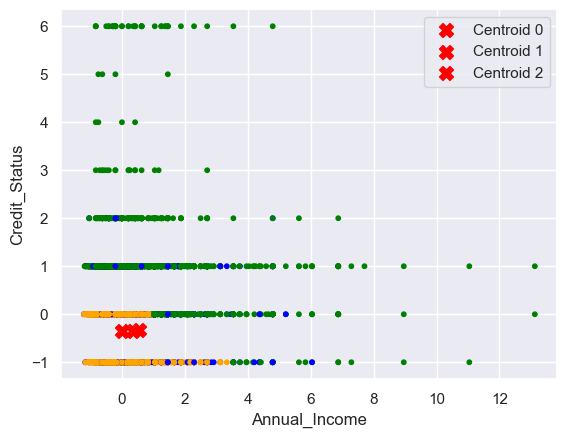

In [129]:
# Assuming df_kmeans is your DataFrame, and 'label' contains cluster assignments
plt.scatter(df_economic['Annual_Income'], df_economic['Credit_Status'], 
            c=df_economic['label_kmeans_ec_3'].map({0: 'blue', 1: 'green', 2: 'orange', 3: 'purple'}), s=10)

# Extracting centroids for Annual Income and Credit Status
centroids = model_1.cluster_centers_

# Plot centroids for each cluster
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 3], marker='X', color='red', s=100, label=f'Centroid {i}')

plt.xlabel('Annual_Income')
plt.ylabel('Credit_Status')
plt.legend()
plt.show()

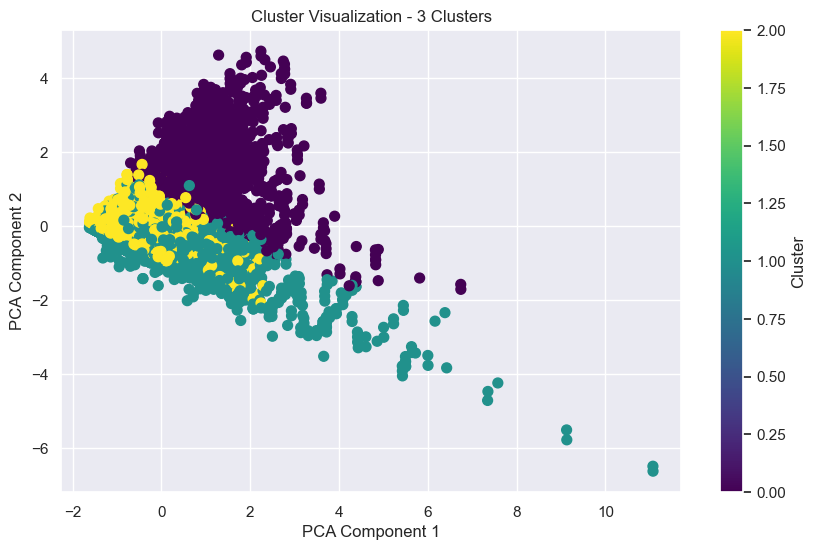

In [130]:
# Dimensionality reduction with PCA to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_economic.drop(columns=['label_kmeans_ec_3']))  # Remove the 'label' column to avoid interference in the reduction

# Visualize the clusters with different colors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_economic['label_kmeans_ec_3'], cmap='viridis', s=50)
plt.title('Cluster Visualization - 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

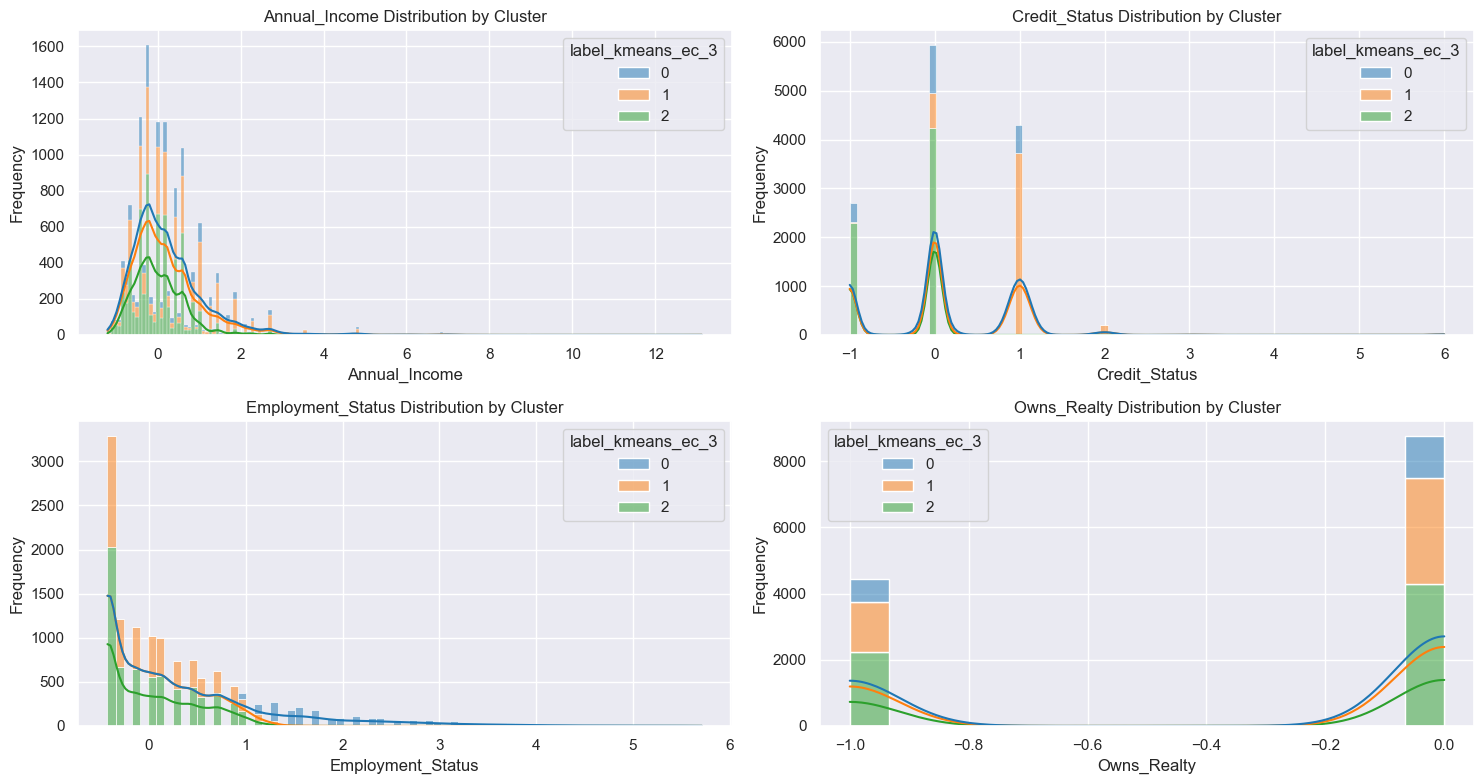

In [131]:
# Define the numerical columns
numerical_columns = ['Annual_Income', 'Credit_Status', 'Employment_Status', 'Owns_Realty']

# Plot the distributions of each feature by cluster with a custom color palette
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_economic, x=feature, hue='label_kmeans_ec_3', multiple='stack', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], kde=True)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**4 clusters**

In [133]:
model_2 = KMeans(n_clusters=4)

In [134]:
model_2.fit(df_economic)

KMeans(n_clusters=4)

In [135]:
df_economic['label_kmeans_ec_4'] = model_2.labels_
df_economic

Annual_Income  Credit_Status  Employment_Status  Owns_Realty  \
Client_ID                                                                 
5008804         2.500000            0.0           1.285714          0.0   
5008806        -0.416667            0.0           0.000000          0.0   
5008808         1.041667            1.0           0.714286          0.0   
5008810         1.041667            0.0           0.714286          0.0   
5008815         1.041667            1.0          -0.142857          0.0   
...                  ...            ...                ...          ...   
5149190         2.708333            6.0          -0.285714         -1.0   
5149729        -0.625000            1.0           0.142857          0.0   
5149828         1.458333            6.0           0.428571          0.0   
5150049         1.166667            3.0          -0.285714          0.0   
5150337        -0.416667            1.0           0.000000          0.0   

           label_kmeans_ec_3  label_kmeans_ec_4  
Client_ID                                        
5008804                    0                  2  
5008806                    2                  0  
5008808                    1                  3  
5008810                    1                  2  
5008815                    1                  3  
...                      ...                ...  
5149190                    1                  3  
5149729                    1                  3  
5149828                    1                  3  
5150049                    1                  3  
5150337                    1                  3  

[13202 rows x 6 columns]

In [136]:
descr = df_economic.reset_index(drop=True).groupby('label_kmeans_ec_4').describe()
print(descr.T)

label_kmeans_ec_4                  0            1            2            3
Annual_Income     count  6400.000000  1814.000000  1437.000000  3551.000000
                  mean     -0.023982     0.184836     2.123341     0.022210
                  std       0.515986     0.656676     1.262366     0.544441
                  min      -1.208333    -1.208333     0.958333    -1.187500
                  25%      -0.416667    -0.291667     1.458333    -0.416667
                  50%      -0.041667     0.125000     1.875000     0.000000
                  75%       0.311799     0.625000     2.500000     0.416667
                  max       1.562500     2.708333    13.125000     2.708333
Credit_Status     count  6400.000000  1814.000000  1437.000000  3551.000000
                  mean     -0.338125     0.137266     0.193459     1.120248
                  std       0.473108     0.708790     0.702274     0.586144
                  min      -1.000000    -1.000000    -1.000000     1.000000
            

In [137]:
cluster0 = df_economic[df_economic.label_kmeans_ec_4==0]
cluster1 = df_economic[df_economic.label_kmeans_ec_4==1]
cluster2 = df_economic[df_economic.label_kmeans_ec_4==2]
cluster3 = df_economic[df_economic.label_kmeans_ec_4==3]

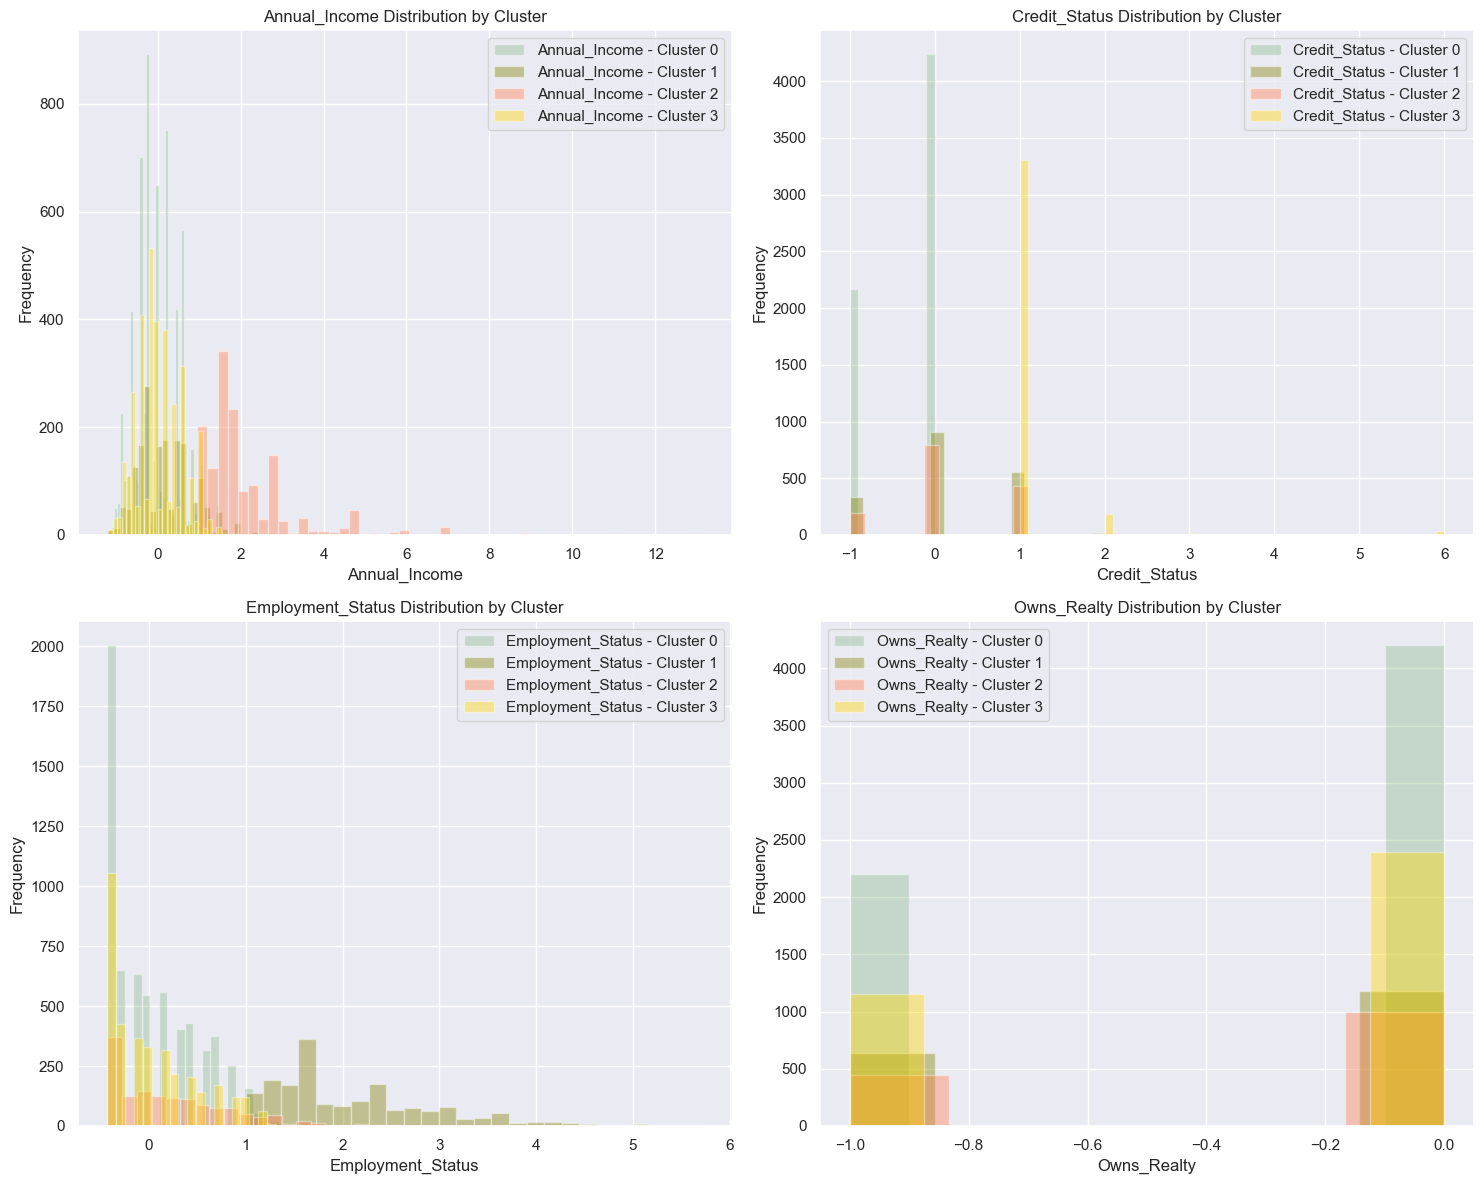

In [138]:
# Define the columns you want to plot
columns = ['Annual_Income', 'Credit_Status', 'Employment_Status', 'Owns_Realty']

# Define the colors for each cluster
cluster_colors = ['darkseagreen', 'olive', 'coral', 'gold']

# Loop through each column and create a distribution plot for each cluster
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for cluster in range(4): 
        cluster_data = df_economic[df_economic['label_kmeans_ec_4'] == cluster]
        sns.distplot(cluster_data[column], color=cluster_colors[cluster], label=f'{column} - Cluster {cluster}', kde=False)
    
    plt.legend()
    plt.title(f'{column} Distribution by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [139]:
centroids_2 = model_2.cluster_centers_
centroids_2

array([[-2.39824667e-02, -3.38125000e-01,  2.43750000e-02,
        -3.43750000e-01,  2.00000000e+00],
       [ 1.84836202e-01,  1.37265711e-01,  2.11616003e+00,
        -3.51157663e-01, -8.88178420e-16],
       [ 2.12334145e+00,  1.93458594e-01,  2.69609305e-01,
        -3.07585247e-01,  9.94432846e-01],
       [ 2.22098757e-02,  1.12024782e+00,  2.72760188e-02,
        -3.25542101e-01,  1.00000000e+00]])

In [140]:
# Get the centroids (cluster centers)
centroids = model_2.cluster_centers_

# Feature names
features = ['Annual_Income','Credit_Status','Employment_Status', 'Owns_Realty']

# Loop through the clusters and print the centroids for each feature
for i, centroid in enumerate(centroids):
    print(f"Centroid {i} - " + ", ".join([f"{features[j]}: {centroid[j]:.2f}" for j in range(len(features))]))

Centroid 0 - Annual_Income: -0.02, Credit_Status: -0.34, Employment_Status: 0.02, Owns_Realty: -0.34
Centroid 1 - Annual_Income: 0.18, Credit_Status: 0.14, Employment_Status: 2.12, Owns_Realty: -0.35
Centroid 2 - Annual_Income: 2.12, Credit_Status: 0.19, Employment_Status: 0.27, Owns_Realty: -0.31
Centroid 3 - Annual_Income: 0.02, Credit_Status: 1.12, Employment_Status: 0.03, Owns_Realty: -0.33


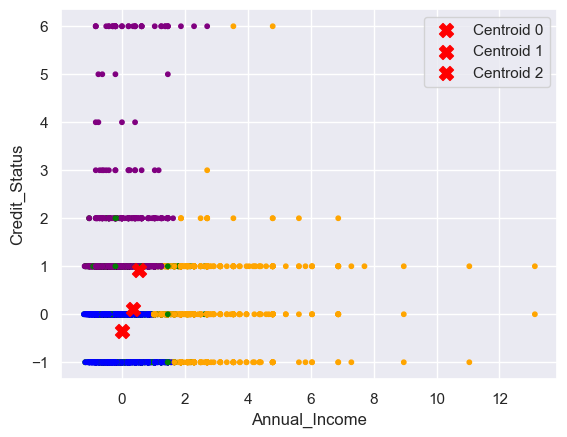

In [141]:
# Assuming df_economic is your DataFrame, and 'label_1' contains cluster assignments
plt.scatter(df_economic['Annual_Income'], df_economic['Credit_Status'], 
            c=df_economic['label_kmeans_ec_4'].map({0: 'blue', 1: 'green', 2: 'orange', 3: 'purple'}), s=10)

# Extracting centroids for Annual Income and Credit Status
centroids = model_1.cluster_centers_

# Plot centroids for each cluster
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='X', color='red', s=100, label=f'Centroid {i}')

plt.xlabel('Annual_Income')
plt.ylabel('Credit_Status')
plt.legend()
plt.show()


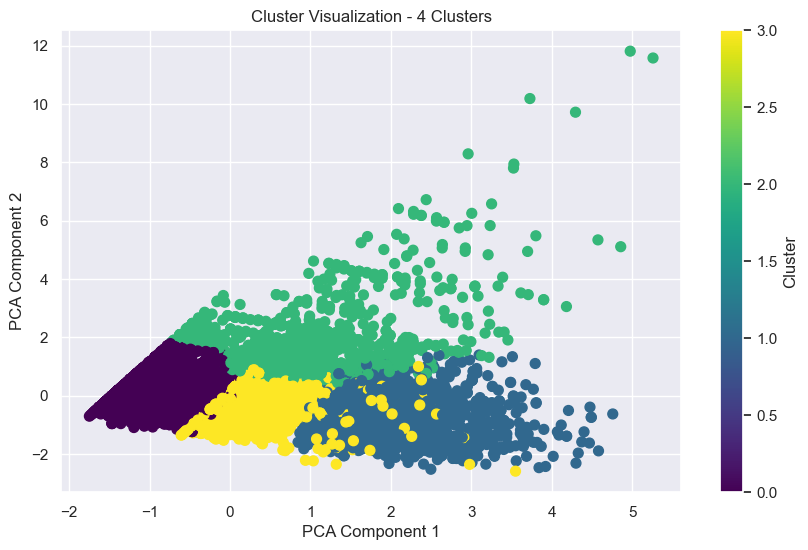

In [142]:
# Dimensionality reduction with PCA to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_economic.drop(columns=['label_kmeans_ec_4']))  # Remove the 'label' column to avoid interference in the reduction

# Visualize the clusters with different colors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_economic['label_kmeans_ec_4'], cmap='viridis', s=50)
plt.title('Cluster Visualization - 4 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

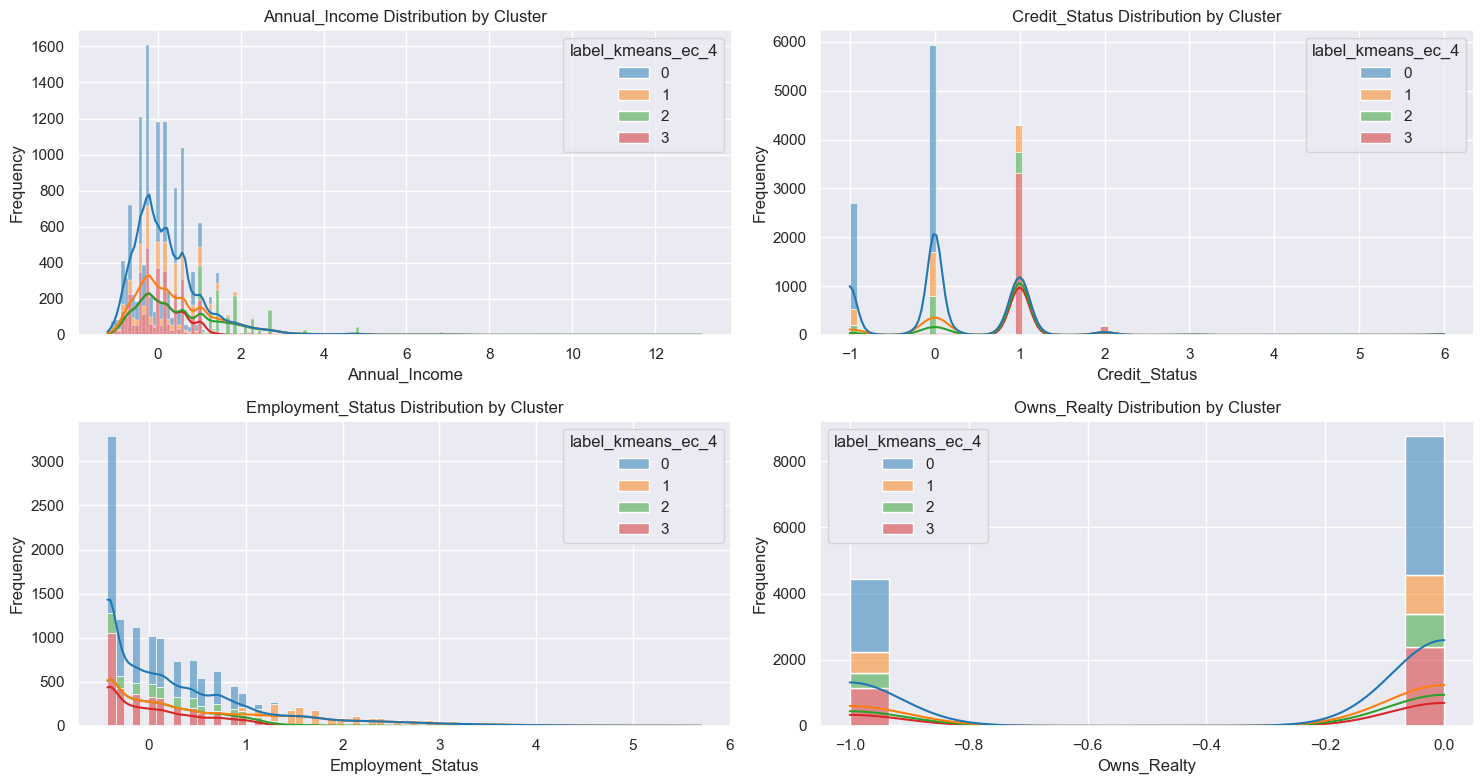

In [143]:
# Define the numerical columns
numerical_columns = ['Annual_Income', 'Credit_Status', 'Employment_Status', 'Owns_Realty']

# Plot the distributions of each feature by cluster with a custom color palette
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_economic, x=feature, hue='label_kmeans_ec_4', multiple='stack', palette=['#1f77b4', '#ff7f0e', '#2ca02c','#d62728'], kde=True)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## **K-means- Demographic Perspective**

In [145]:
df_demographic = df_scaled[['Age','Education_Level','Gender', 'Family_Size']].copy()

In [146]:
df_scaled.value_counts('Gender')

Gender
F    8537
M    4665
Name: count, dtype: int64

In [147]:
# Convert Gender to binary (F -> 0, M -> 1)
df_demographic['Gender_Binary'] = df_demographic['Gender'].map({'F': 0, 'M': 1})

# Check the result
df_demographic['Gender_Binary'].value_counts()

Gender_Binary
0    8537
1    4665
Name: count, dtype: int64

In [148]:
df_demographic.head()

Age  Education_Level Gender  Family_Size  Gender_Binary
Client_ID                                                         
5008804   -0.5              1.0      M          0.0              1
5008806    0.8              0.0      M          0.0              1
5008808    0.5              0.0      F         -1.0              0
5008810    0.5              0.0      F         -1.0              0
5008815    0.2              1.0      M          0.0              1

In [149]:
# Delete the 'Gender' column
df_demographic = df_demographic.drop(columns=['Gender'])

# Check the result
df_demographic.head()


Age  Education_Level  Family_Size  Gender_Binary
Client_ID                                                  
5008804   -0.5              1.0          0.0              1
5008806    0.8              0.0          0.0              1
5008808    0.5              0.0         -1.0              0
5008810    0.5              0.0         -1.0              0
5008815    0.2              1.0          0.0              1

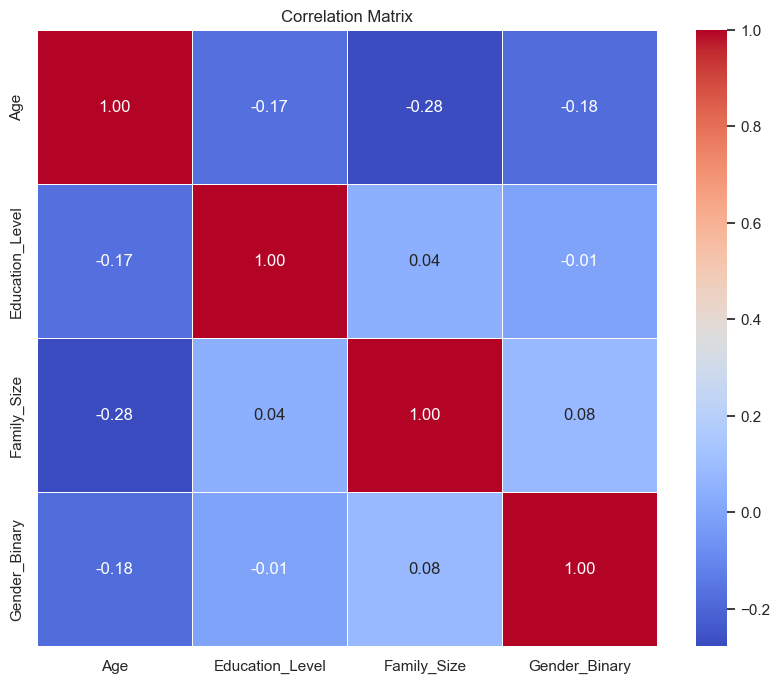

In [150]:
# correlation of the variables from the economic_data
# Calculate correlation matrix
correlation_matrix_kmeans = df_demographic.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kmeans, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.6)
plt.title('Correlation Matrix')
plt.show()

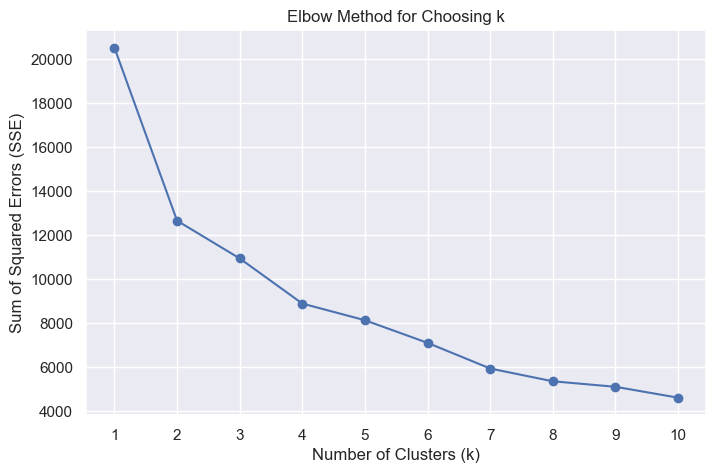

In [151]:
# Elbow Method 
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(df_demographic)
    
    inertias.append(model.inertia_)

# Elbow Method Plot
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Choosing k')
plt.xticks(ks)
plt.grid(True)
plt.show()

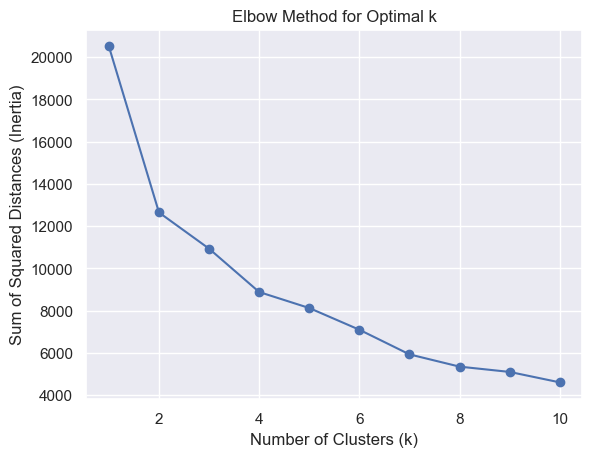

In [152]:
ks = range(1,11)  # Adjust the range based on your preferences
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k, random_state=42)

    # Fit model to samples
    kmeans.fit(df_demographic)

    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(ks, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [153]:
# Number of clusters to test
k_values = [3, 4, 5]

# Results
silhouette_scores = {}

for k in k_values:
    # Create KMeans model with k clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_demographic)
    
    # Predict the clusters
    cluster_labels = kmeans.labels_
    
    # Calculate the Silhouette Score
    score = silhouette_score(df_demographic, cluster_labels)
    silhouette_scores[k] = score

    print(f"Silhouette Score for k={k}: {score:.4f}")

Silhouette Score for k=3: 0.2950
Silhouette Score for k=4: 0.3002
Silhouette Score for k=5: 0.2957


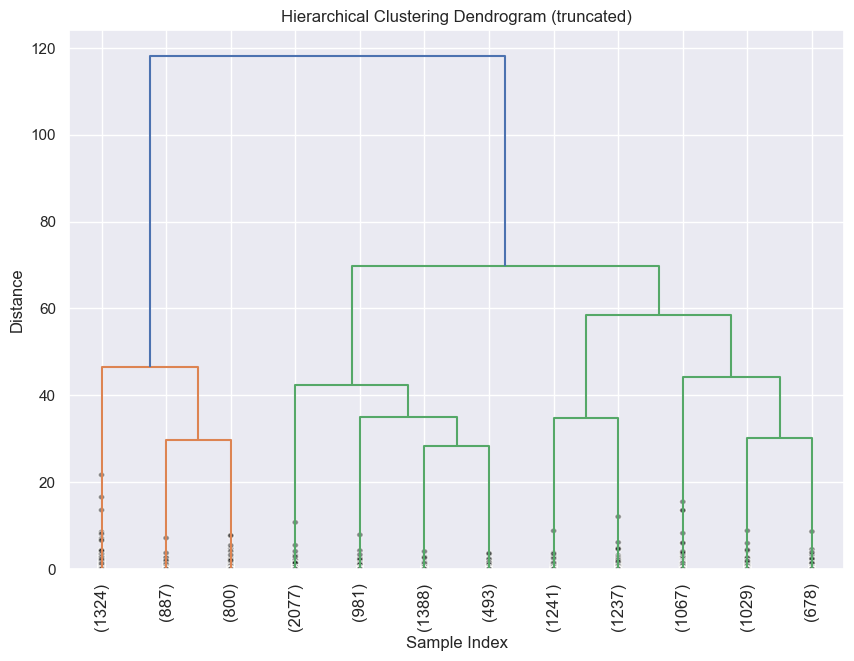

In [154]:
# Take a random sample
sample_df = df.sample(n=7000, random_state=42)

# Perform hierarchical clustering
hclustering = linkage(df_demographic, method='ward')

# Create dendrogram
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

dendrogram(
    hclustering,
    truncate_mode='lastp',
    p=12,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

**We will try with 3 and 4 clusters. First try with 3 clusters**

In [156]:
dem_1 = KMeans(n_clusters=3)

In [157]:
dem_1.fit(df_demographic)

KMeans(n_clusters=3)

In [158]:
df_demographic['label_kmeans_dem_3'] = dem_1.labels_
df_demographic

Age  Education_Level  Family_Size  Gender_Binary  \
Client_ID                                                      
5008804   -0.50              1.0          0.0              1   
5008806    0.80              0.0          0.0              1   
5008808    0.50              0.0         -1.0              0   
5008810    0.50              0.0         -1.0              0   
5008815    0.20              1.0          0.0              1   
...         ...              ...          ...            ...   
5149190   -0.80              1.0          1.0              1   
5149729    0.50              0.0          0.0              1   
5149828    0.25              0.0          0.0              1   
5150049    0.35              0.0          0.0              0   
5150337   -0.85              0.0         -1.0              1   

           label_kmeans_dem_3  
Client_ID                      
5008804                     2  
5008806                     0  
5008808                     0  
5008810                     0  
5008815                     2  
...                       ...  
5149190                     1  
5149729                     0  
5149828                     0  
5150049                     0  
5150337                     2  

[13202 rows x 5 columns]

In [159]:
descr = df_demographic.reset_index(drop=True).groupby('label_kmeans_dem_3').describe()
print(descr.T)

label_kmeans_dem_3               0            1            2
Age             count  5557.000000  3680.000000  3965.000000
                mean      0.617123    -0.276861    -0.412446
                std       0.323355     0.346291     0.322653
                min      -0.100000    -1.050000    -1.100000
                25%       0.350000    -0.550000    -0.700000
                50%       0.650000    -0.300000    -0.450000
                75%       0.850000    -0.050000    -0.150000
                max       1.300000     1.200000     0.400000
Education_Level count  5557.000000  3680.000000  3965.000000
                mean      0.164027     0.316033     0.401135
                std       0.381053     0.458662     0.477877
                min      -0.500000    -0.500000    -0.500000
                25%       0.000000     0.000000     0.000000
                50%       0.000000     0.000000     0.000000
                75%       0.000000     1.000000     1.000000
                max     

In [160]:
cluster0 = df_demographic[df_demographic.label_kmeans_dem_3==0]
cluster1 = df_demographic[df_demographic.label_kmeans_dem_3==1]
cluster2 = df_demographic[df_demographic.label_kmeans_dem_3==2]

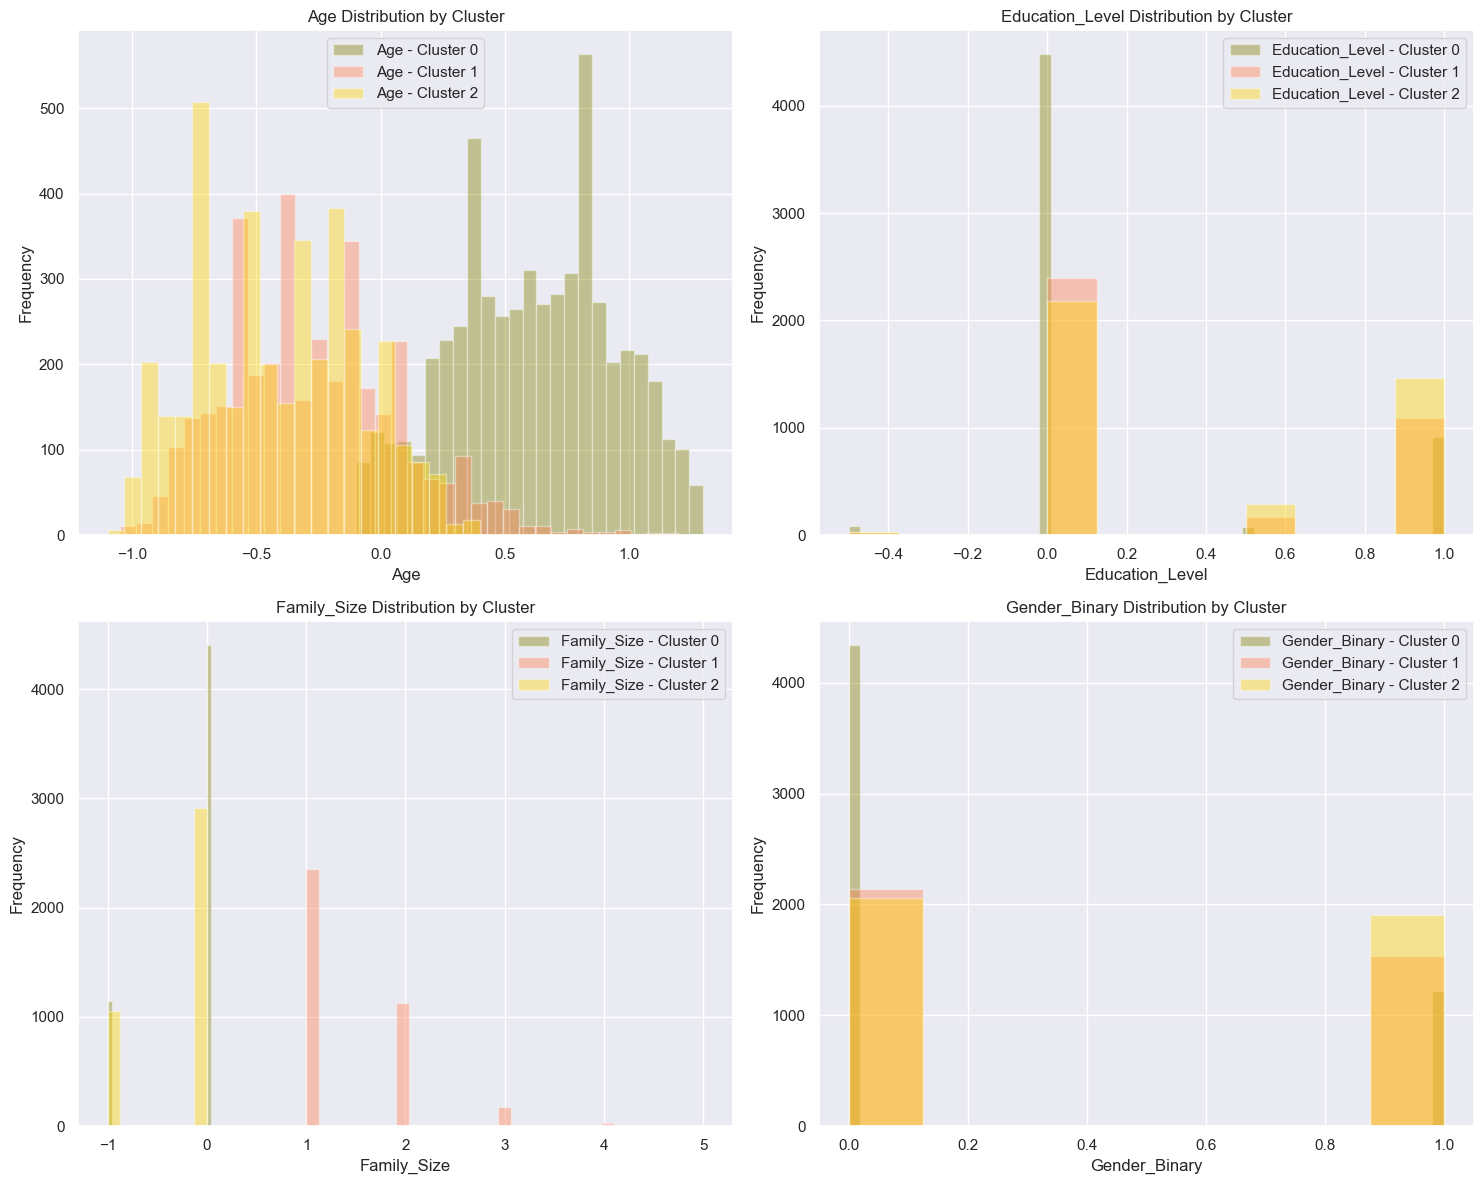

In [161]:
# Define the columns you want to plot
columns = ['Age', 'Education_Level', 'Family_Size', 'Gender_Binary']

# Define the colors for each cluster
cluster_colors = ['olive', 'coral', 'gold']

# Loop through each column and create a distribution plot for each cluster
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for cluster in range(3):  # Assuming you have 4 clusters
        cluster_data = df_demographic[df_demographic['label_kmeans_dem_3'] == cluster]
        sns.distplot(cluster_data[column], color=cluster_colors[cluster], label=f'{column} - Cluster {cluster}', kde=False)
    
    plt.legend()
    plt.title(f'{column} Distribution by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [162]:
centroids_1 = dem_1.cluster_centers_
centroids_1

array([[ 0.61712255,  0.16402735, -0.20550657,  0.21936297],
       [-0.27686141,  0.31603261,  1.42309783,  0.41766304],
       [-0.41244641,  0.40113493, -0.26633039,  0.4814628 ]])

In [163]:
# Get the centroids (cluster centers)
centroids = dem_1.cluster_centers_

# Feature names
features = ['Age', 'Education_Level', 'Family_Size', 'Gender_Binary']

# Loop through the clusters and print the centroids for each feature
for i, centroid in enumerate(centroids):
    print(f"Centroid {i} - " + ", ".join([f"{features[j]}: {centroid[j]:.2f}" for j in range(len(features))]))

Centroid 0 - Age: 0.62, Education_Level: 0.16, Family_Size: -0.21, Gender_Binary: 0.22
Centroid 1 - Age: -0.28, Education_Level: 0.32, Family_Size: 1.42, Gender_Binary: 0.42
Centroid 2 - Age: -0.41, Education_Level: 0.40, Family_Size: -0.27, Gender_Binary: 0.48


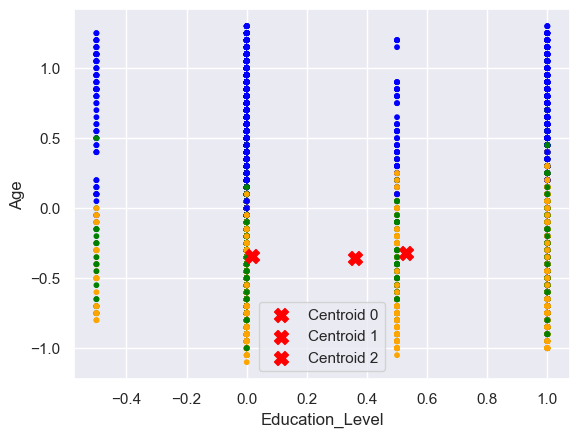

In [164]:
# Assuming df_kmeans is your DataFrame, and 'label' contains cluster assignments
plt.scatter(df_demographic['Education_Level'], df_demographic['Age'], 
            c=df_demographic['label_kmeans_dem_3'].map({0: 'blue', 1: 'green', 2: 'orange', 3: 'purple'}), s=10)

# Extracting centroids for Annual Income and Credit Status
centroids = model_1.cluster_centers_

# Plot centroids for each cluster
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 3], marker='X', color='red', s=100, label=f'Centroid {i}')

plt.xlabel('Education_Level')
plt.ylabel('Age')
plt.legend()
plt.show()

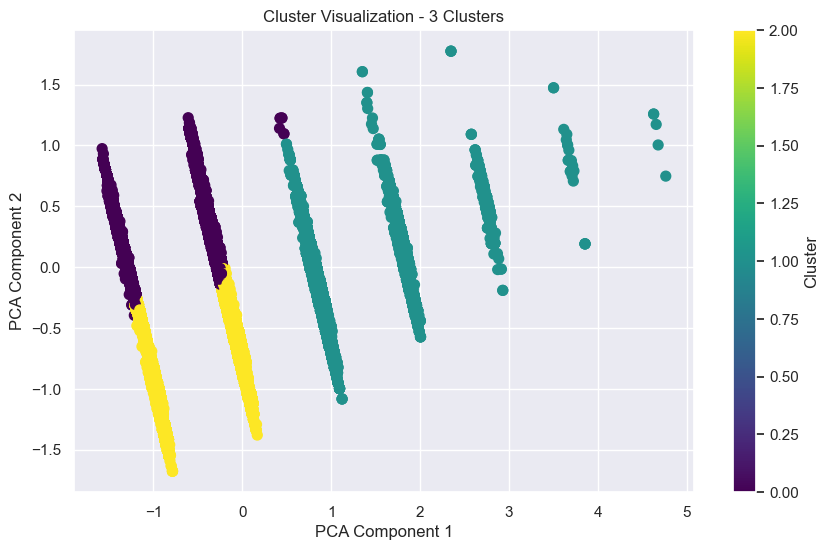

In [165]:
# Dimensionality reduction with PCA to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_demographic.drop(columns=['label_kmeans_dem_3']))  # Remove the 'label' column to avoid interference in the reduction

# Visualize the clusters with different colors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_demographic['label_kmeans_dem_3'], cmap='viridis', s=50)
plt.title('Cluster Visualization - 3 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

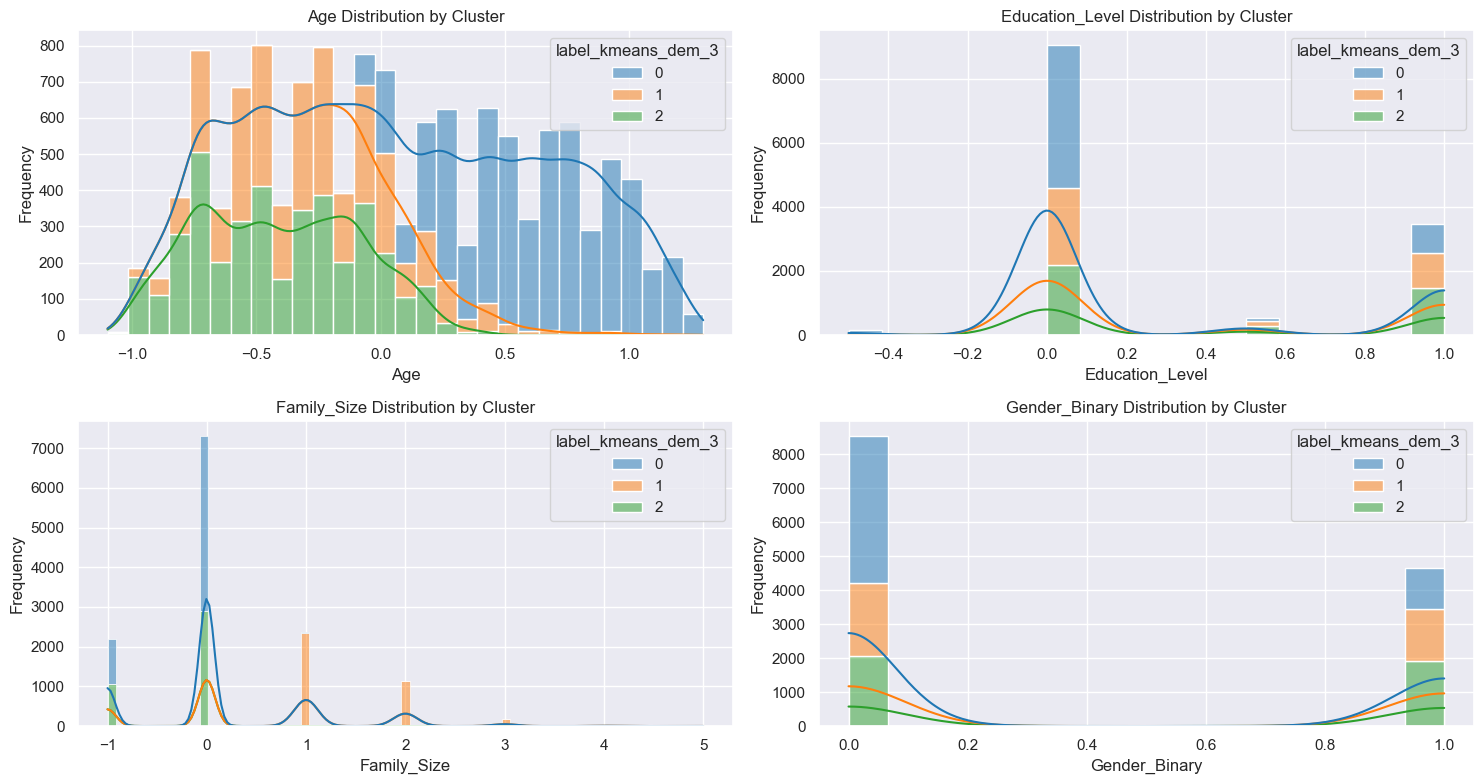

In [166]:
# Define the numerical columns
numerical_columns = ['Age', 'Education_Level', 'Family_Size', 'Gender_Binary']

# Plot the distributions of each feature by cluster with a custom color palette
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_demographic, x=feature, hue='label_kmeans_dem_3', multiple='stack', palette=['#1f77b4', '#ff7f0e', '#2ca02c'], kde=True)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**4 clusters**

In [168]:
dem_2 = KMeans(n_clusters=4)

In [169]:
dem_2.fit(df_demographic)

KMeans(n_clusters=4)

In [170]:
df_demographic['label_kmeans_dem_4'] = dem_2.labels_
df_demographic

Age  Education_Level  Family_Size  Gender_Binary  \
Client_ID                                                      
5008804   -0.50              1.0          0.0              1   
5008806    0.80              0.0          0.0              1   
5008808    0.50              0.0         -1.0              0   
5008810    0.50              0.0         -1.0              0   
5008815    0.20              1.0          0.0              1   
...         ...              ...          ...            ...   
5149190   -0.80              1.0          1.0              1   
5149729    0.50              0.0          0.0              1   
5149828    0.25              0.0          0.0              1   
5150049    0.35              0.0          0.0              0   
5150337   -0.85              0.0         -1.0              1   

           label_kmeans_dem_3  label_kmeans_dem_4  
Client_ID                                          
5008804                     2                   0  
5008806                     0                   1  
5008808                     0                   1  
5008810                     0                   1  
5008815                     2                   0  
...                       ...                 ...  
5149190                     1                   2  
5149729                     0                   1  
5149828                     0                   1  
5150049                     0                   1  
5150337                     2                   0  

[13202 rows x 6 columns]

In [171]:
descr = df_demographic.reset_index(drop=True).groupby('label_kmeans_dem_4').describe()
print(descr.T)

label_kmeans_dem_4                  0            1            2            3
Age                count  3965.000000  5557.000000  2356.000000  1324.000000
                   mean     -0.412446     0.617123    -0.272241    -0.285083
                   std       0.322653     0.323355     0.366923     0.306120
                   min      -1.100000    -0.100000    -1.050000    -0.950000
                   25%      -0.700000     0.350000    -0.550000    -0.500000
                   50%      -0.450000     0.650000    -0.300000    -0.300000
                   75%      -0.150000     0.850000     0.000000    -0.100000
                   max       0.400000     1.300000     0.850000     1.200000
Education_Level    count  3965.000000  5557.000000  2356.000000  1324.000000
                   mean      0.401135     0.164027     0.313455     0.320619
                   std       0.477877     0.381053     0.458125     0.459754
                   min      -0.500000    -0.500000    -0.500000    -0.500000

In [172]:
cluster0 = df_demographic[df_demographic.label_kmeans_dem_4==0]
cluster1 = df_demographic[df_demographic.label_kmeans_dem_4==1]
cluster2 = df_demographic[df_demographic.label_kmeans_dem_4==2]
cluster3 = df_demographic[df_demographic.label_kmeans_dem_4==3]

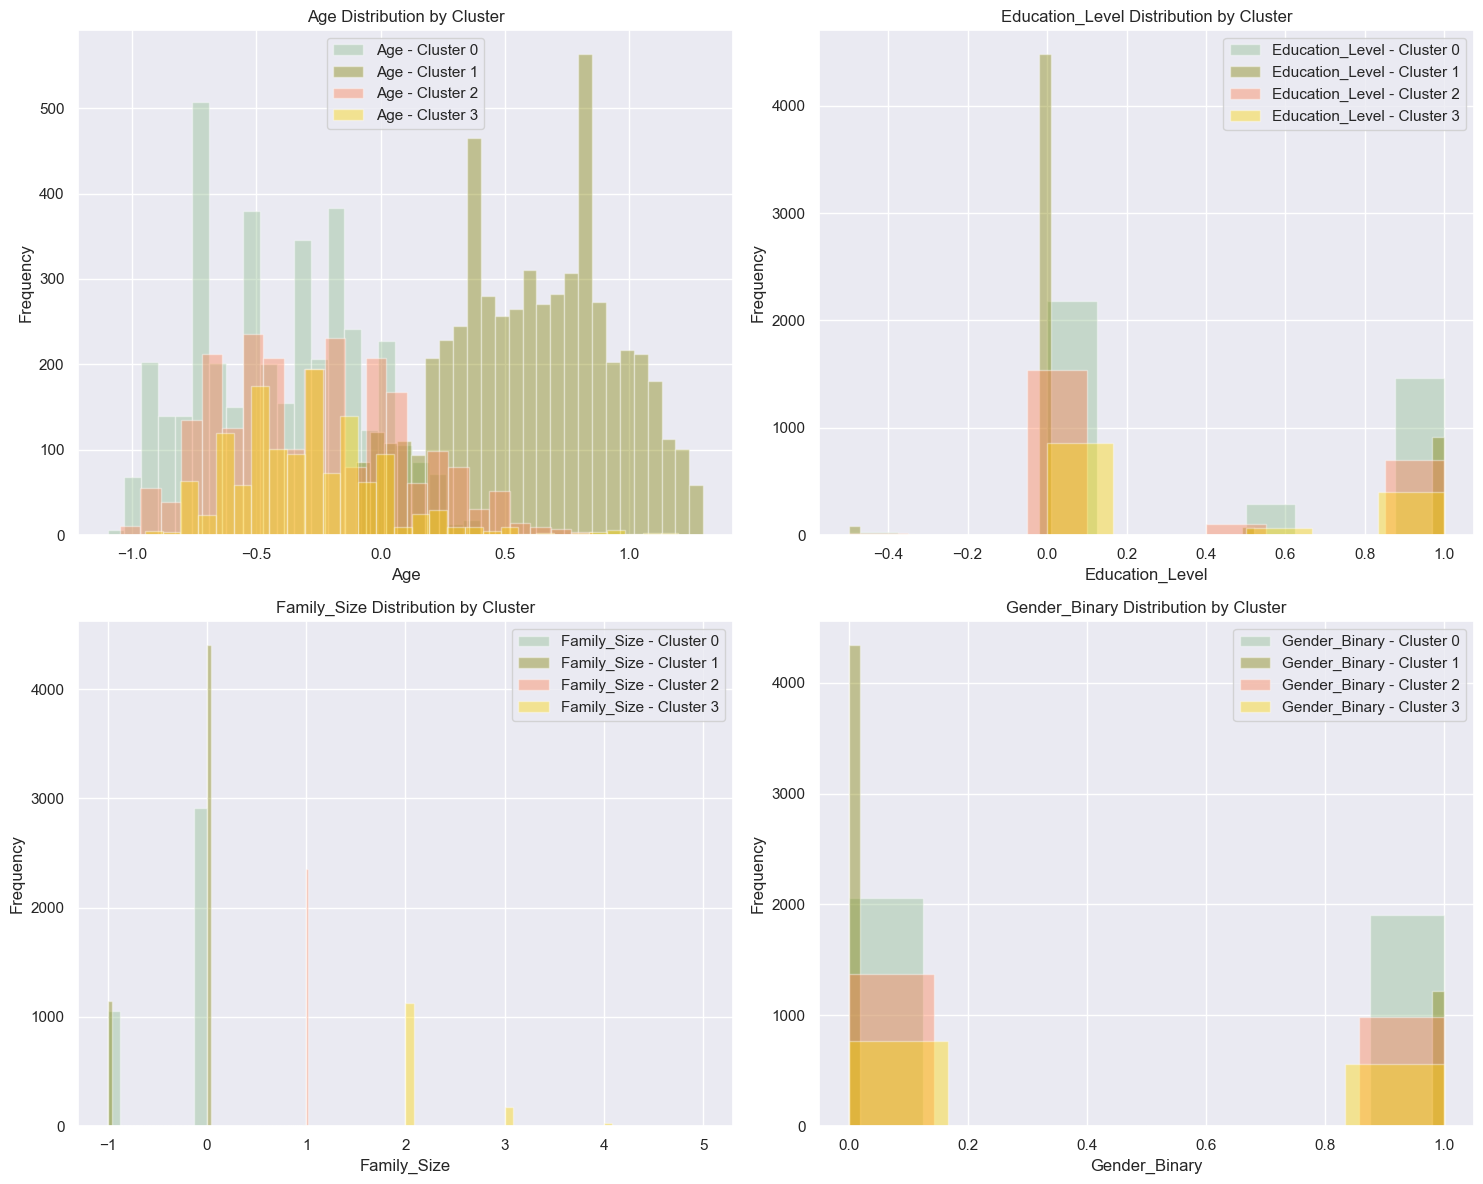

In [173]:
# Define the columns you want to plot
columns = ['Age', 'Education_Level', 'Family_Size', 'Gender_Binary']

# Define the colors for each cluster
cluster_colors = ['darkseagreen', 'olive', 'coral', 'gold']

# Loop through each column and create a distribution plot for each cluster
plt.figure(figsize=(15, 12))

for i, column in enumerate(columns):
    plt.subplot(2, 2, i+1)
    for cluster in range(4):  # Assuming you have 4 clusters
        cluster_data = df_demographic[df_demographic['label_kmeans_dem_4'] == cluster]
        sns.distplot(cluster_data[column], color=cluster_colors[cluster], label=f'{column} - Cluster {cluster}', kde=False)
    
    plt.legend()
    plt.title(f'{column} Distribution by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [174]:
centroids_2 = dem_2.cluster_centers_
centroids_2

array([[-4.12446406e-01,  4.01134931e-01, -2.66330391e-01,
         4.81462799e-01,  2.00000000e+00],
       [ 6.17122548e-01,  1.64027353e-01, -2.05506568e-01,
         2.19362966e-01, -2.66453526e-15],
       [-2.72241087e-01,  3.13455008e-01,  1.00000000e+00,
         4.15959253e-01,  1.00000000e+00],
       [-2.85083082e-01,  3.20619335e-01,  2.17598187e+00,
         4.20694864e-01,  1.00000000e+00]])

In [175]:
# Get the centroids (cluster centers)
centroids = dem_2.cluster_centers_

# Feature names
features = ['Age', 'Education_Level', 'Family_Size', 'Gender_Binary']

# Loop through the clusters and print the centroids for each feature
for i, centroid in enumerate(centroids):
    print(f"Centroid {i} - " + ", ".join([f"{features[j]}: {centroid[j]:.2f}" for j in range(len(features))]))

Centroid 0 - Age: -0.41, Education_Level: 0.40, Family_Size: -0.27, Gender_Binary: 0.48
Centroid 1 - Age: 0.62, Education_Level: 0.16, Family_Size: -0.21, Gender_Binary: 0.22
Centroid 2 - Age: -0.27, Education_Level: 0.31, Family_Size: 1.00, Gender_Binary: 0.42
Centroid 3 - Age: -0.29, Education_Level: 0.32, Family_Size: 2.18, Gender_Binary: 0.42


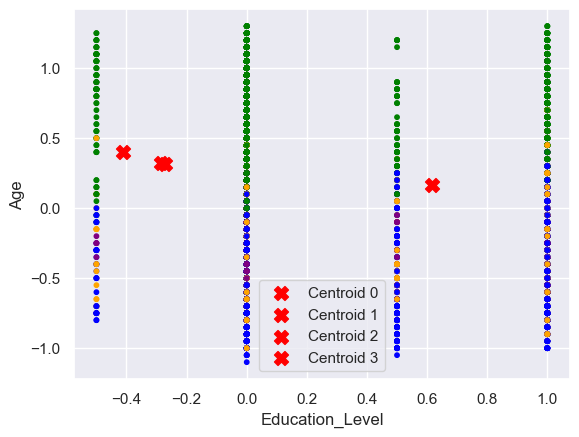

In [176]:
# Assuming df_kmeans is your DataFrame, and 'label_2' contains cluster assignments
plt.scatter(df_demographic['Education_Level'], df_demographic['Age'], 
            c=df_demographic['label_kmeans_dem_4'].map({0: 'blue', 1: 'green', 2: 'orange', 3: 'purple'}), s=10)

# Extracting centroids for Education_Level and Age
centroids = dem_2.cluster_centers_

# Plot centroids for each cluster
for i in range(len(centroids)):
    plt.scatter(centroids[i, 0], centroids[i, 1], marker='X', color='red', s=100, label=f'Centroid {i}')  # Correct indices for Education_Level and Age

plt.xlabel('Education_Level')
plt.ylabel('Age')
plt.legend()
plt.show()


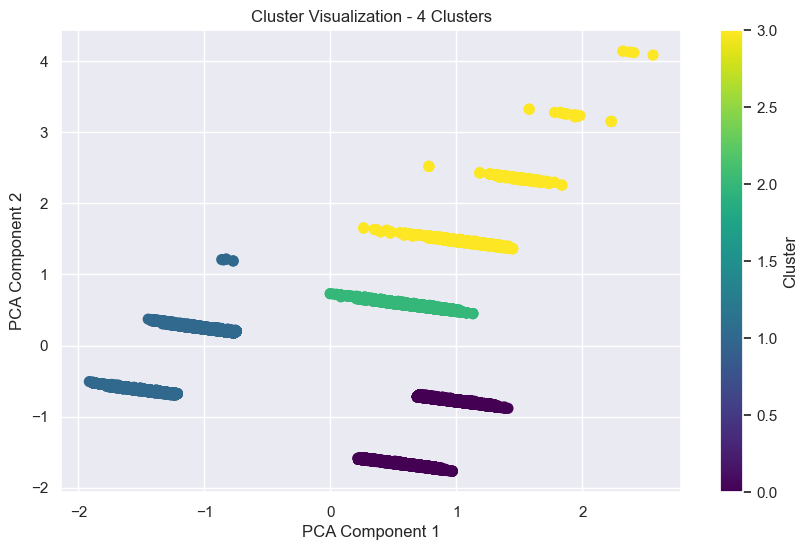

In [177]:
# Dimensionality reduction with PCA to 2 components
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_demographic.drop(columns=['label_kmeans_dem_4']))  # Remove the 'label' column to avoid interference in the reduction

# Visualize the clusters with different colors
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_demographic['label_kmeans_dem_4'], cmap='viridis', s=50)
plt.title('Cluster Visualization - 4 Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

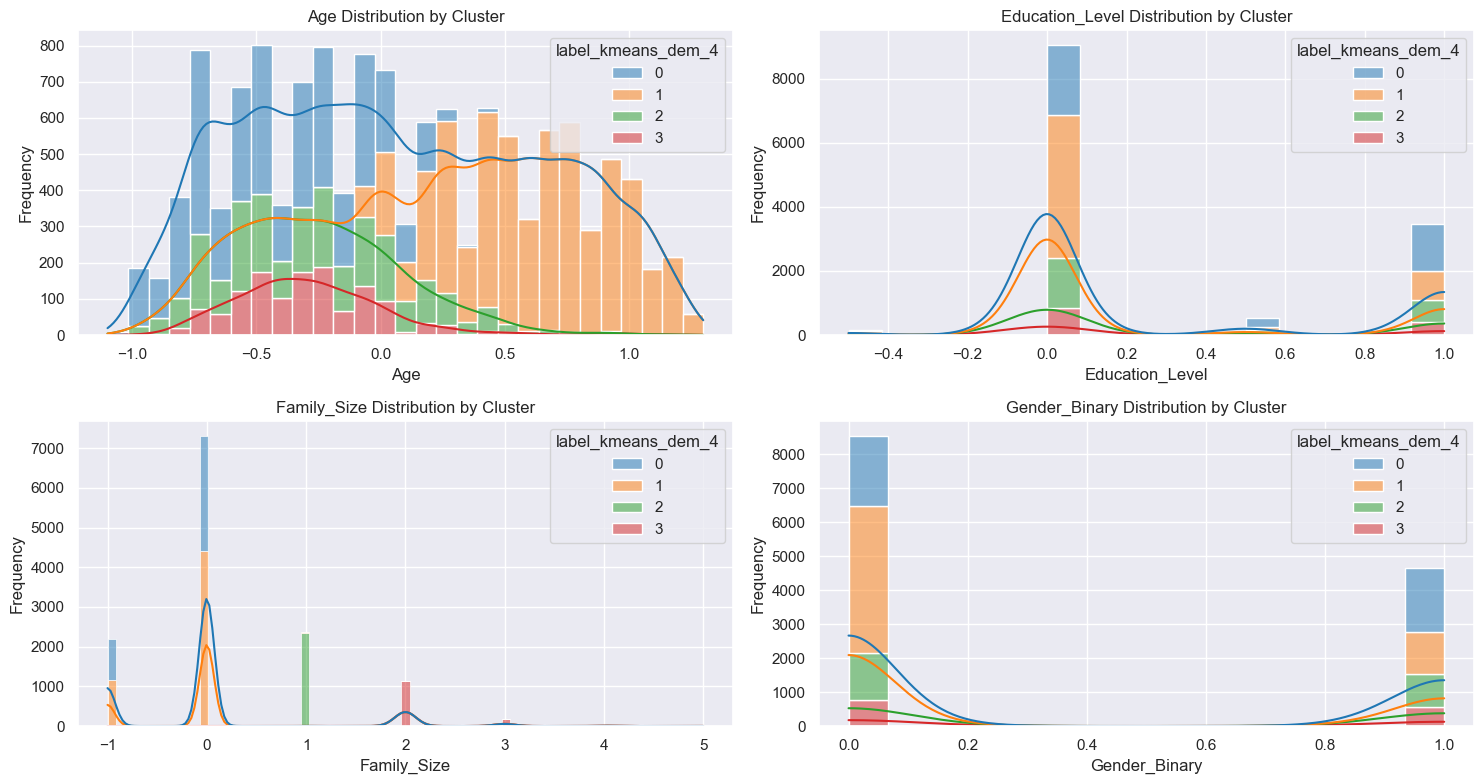

In [178]:
# Define the numerical columns
numerical_columns = ['Age', 'Education_Level', 'Family_Size', 'Gender_Binary']

# Plot the distributions of each feature by cluster with a custom color palette
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data=df_demographic, x=feature, hue='label_kmeans_dem_4', multiple='stack', palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], kde=True)
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## **DBSCAN- Economic Perspective**

In [180]:
#trying to see the 'best' value for eps

##num_clusters = []

#for eps in eps_values:
#    dbclust = DBSCAN(eps=eps, min_samples=60).fit(df_economic)
#    num_clusters.append(len(set(dbclust.labels_)) - (1 if -1 in dbclust.labels_ else 0))

#plt.plot(eps_values, num_clusters, marker='o')
#plt.xlabel('eps')
#plt.ylabel('Number of Clusters')
#plt.title('Elbow Method for DBSCAN')
#plt.show()


In [181]:
#We are now going to define an instance of `DBSCAN` with the radius set to 0.55
#and the minimum number of neighbours set to 60
#dbclust = DBSCAN(eps = 0.55, min_samples = 60).fit(df_economic)

In [182]:
#We can get the labels of the clusters by using the `labels_` method
#dbclust.labels_

In [183]:
#Check how many clusters DBSCAN has created by turning the labels array into a set (to delete duplicates) and check its length.
#len(set(dbclust.labels_))

In [184]:
# Count the number of outliers (rótulo = -1)
#
#print(f"Number of outliers: {n_outliers}")


In [185]:
#df_ec = df_economic.copy()
#df_ec['label_db'] = dbclust.labels_

In [186]:
#descr_bk = df_ec.reset_index(drop=True).groupby(['label_db']).describe()
#print(descr_bk.T)

In [187]:
# Define the values for eps and min_samples for test
#eps_values = np.linspace(0.3, 1, 10)  # Test 5 vakyues between 0.5 e 1.5
#min_samples_values = [50, 80, 100, 130]     # Test values for min_samples


results = []

# Test every combination of eps and min_samples
#for eps in eps_values:
    #for min_samples in min_samples_values:
        #dbclust = DBSCAN(eps=eps, min_samples=min_samples).fit(df_economic)
        #n_clusters = len(set(dbclust.labels_)) - (1 if -1 in dbclust.labels_ else 0)  # Exclui outliers
        #n_outliers = list(dbclust.labels_).count(-1)  # Conta outliers
        #results.append((eps, min_samples, n_clusters, n_outliers))

#Results
#print("eps\tmin_samples\tn_clusters\tn_outliers")
#for res in results:
#    print(f"{res[0]:.2f}\t{res[1]}\t\t{res[2]}\t\t{res[3]}")


DBSCAN was not ideal for our dataset due to its sensitivity to parameters like eps and min_samples. It generated either too many small clusters or a high number of outliers, making the results difficult to interpret. Additionally, the dataset lacks the dense, well-separated clusters that DBSCAN handles best. To achieve more meaningful and stable segmentation, we decided to explore alternative clustering methods better suited to our data structure.

## **SOM- Economic Perspective**

In [190]:
import sompy
from sompy.sompy import SOMFactory

In [191]:
som_econ_data = df_economic.drop(columns=['label_kmeans_ec_3', 'label_kmeans_ec_4'], inplace=True)

In [192]:
som_econ_data = df_economic

In [193]:
som_econ_data.head()

Annual_Income  Credit_Status  Employment_Status  Owns_Realty
Client_ID                                                              
5008804         2.500000            0.0           1.285714          0.0
5008806        -0.416667            0.0           0.000000          0.0
5008808         1.041667            1.0           0.714286          0.0
5008810         1.041667            0.0           0.714286          0.0
5008815         1.041667            1.0          -0.142857          0.0

In [194]:
som_economic = som_econ_data.values.astype(float)

In [195]:
# define the size of the SOM grid
rows = 25
cols = 25
mapsize = [rows, cols]

In [196]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som_econ_perspective = SOMFactory().build(som_economic, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='random', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [197]:
# For more information about the trainig: verbose='info'
som_econ_perspective.train(n_job=1, verbose='debug', train_rough_len=3, train_finetune_len=5)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 13202 and data dimension is 4
      > map size is 25,25
      > array size in log10 scale is 7.518579737087604
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 9.000000 , radius_final: 1.500000, trainlen: 3

 find_bmu took: 0.178000 seconds
 update_codebook_voronoi took: 0.005000 seconds
 epoch: 1 ---> elapsed time:  0.192000, quantization error: 1.011720

 find_bmu took: 0.165000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 2 ---> elapsed time:  0.175000, quantization error: 1.654764

 find_bmu took: 0.142000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 3 ---> elapsed time:  0.152000, quantization error: 1.152382

 find_bmu took: 0.165000 seconds
 Finetune training...
 radius_ini: 2.083333 , radius_final: 1.000000

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=8.0.
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='i

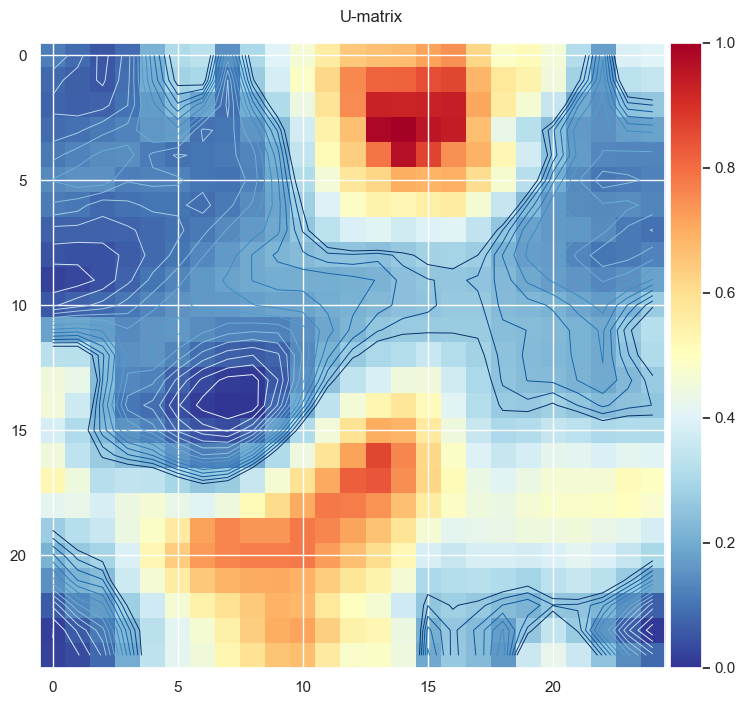

In [198]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_econ_perspective, distance=1, row_normalized=False)


#Here you have Umatrix plus its render
#_, umat = u.show(som_econ_perspective, distance=4, row_normalized=True, contour=True, blob=False)


# Plot U-matrix with contours
_, umat = u.show(som_econ_perspective, distance=25, row_normalized=True, contour=True, blob=False)

top of Axes not in the figure, so title not moved


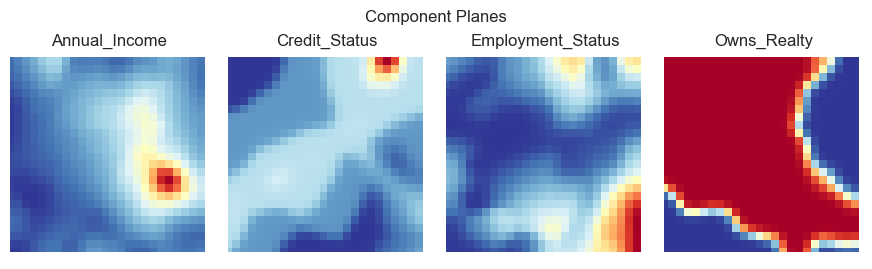

In [199]:
som_econ_perspective.component_names = som_econ_data.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes\n', text_size=8)  
comp_planes.show(som_econ_perspective, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [200]:
# By using the function .project_data() you can get the Best Matching Units of each observation. 
bmus_econ = som_econ_perspective.project_data(som_economic)
bmus_econ

array([446, 277, 115, ...,  20,  44, 431])

In [201]:
# Get the .codebook.matrix attribute from som to observe the values of the weights each neuron has.
som_econ_perspective.codebook.matrix

array([[-0.522887, -1.415581, -0.048002,  0.711248],
       [-0.333134, -1.415581, -0.132553,  0.711248],
       [-0.064466, -1.415581, -0.253314,  0.711248],
       ...,
       [-0.453669, -0.451326,  2.427762, -1.246378],
       [-0.424129, -0.275657,  3.14814 , -1.21064 ],
       [-0.379051, -0.091276,  3.638382, -1.235325]])

### Clusters with SOM- Economic Perspective

In the following steps you are going to apply k-means over the SOM to get clusters.

In [203]:
#first you can do clustering. Currently only K-means on top of the trained som
cl_econ_som = som_econ_perspective.cluster(n_clusters=3) 

In [204]:
labels_econ_som = getattr(som_econ_perspective, 'cluster_labels')
labels_econ_som

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,

findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=7.0.
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='i

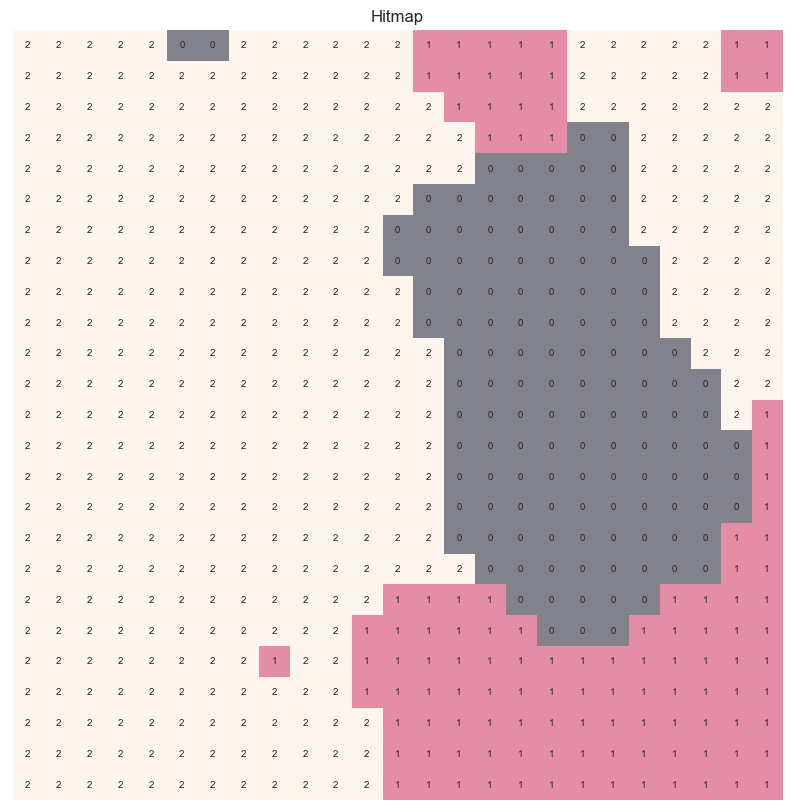

In [205]:
h_econ_som = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h_econ_som.show(som_econ_perspective)

In [206]:
# get the BMU of each observation
bmu_econ_som = som_econ_perspective.project_data(som_economic)

econ_assessment_data = df_economic.copy()
econ_assessment_data['bmu_econ_som'] = bmu_econ_som

In [207]:
# assign to each observation the correspondent cluster label
econ_assessment_data['label'] = labels_econ_som[econ_assessment_data['bmu_econ_som']]
econ_assessment_data

Annual_Income  Credit_Status  Employment_Status  Owns_Realty  \
Client_ID                                                                 
5008804         2.500000            0.0           1.285714          0.0   
5008806        -0.416667            0.0           0.000000          0.0   
5008808         1.041667            1.0           0.714286          0.0   
5008810         1.041667            0.0           0.714286          0.0   
5008815         1.041667            1.0          -0.142857          0.0   
...                  ...            ...                ...          ...   
5149190         2.708333            6.0          -0.285714         -1.0   
5149729        -0.625000            1.0           0.142857          0.0   
5149828         1.458333            6.0           0.428571          0.0   
5150049         1.166667            3.0          -0.285714          0.0   
5150337        -0.416667            1.0           0.000000          0.0   

           bmu_econ_som  label  
Client_ID                       
5008804             446      0  
5008806             277      2  
5008808             115      0  
5008810             440      0  
5008815             238      0  
...                 ...    ...  
5149190              20      2  
5149729             377      2  
5149828              20      2  
5150049              44      2  
5150337             431      2  

[13202 rows x 6 columns]

In [208]:
#create a new dataset with the original data and add to it the label column to save the clusters information

dataset_econ_som_final = econ_assessment_data.copy(deep=True)
dataset_econ_som_final = dataset_econ_som_final.drop(columns=['bmu_econ_som'])


dataset_econ_som_final.rename(columns={'label': 'label_cust'}, inplace=True)
dataset_econ_som_final.head()

Annual_Income  Credit_Status  Employment_Status  Owns_Realty  \
Client_ID                                                                 
5008804         2.500000            0.0           1.285714          0.0   
5008806        -0.416667            0.0           0.000000          0.0   
5008808         1.041667            1.0           0.714286          0.0   
5008810         1.041667            0.0           0.714286          0.0   
5008815         1.041667            1.0          -0.142857          0.0   

           label_cust  
Client_ID              
5008804             0  
5008806             2  
5008808             0  
5008810             0  
5008815             0

locator: <matplotlib.ticker.AutoLocator object at 0x15745b830>


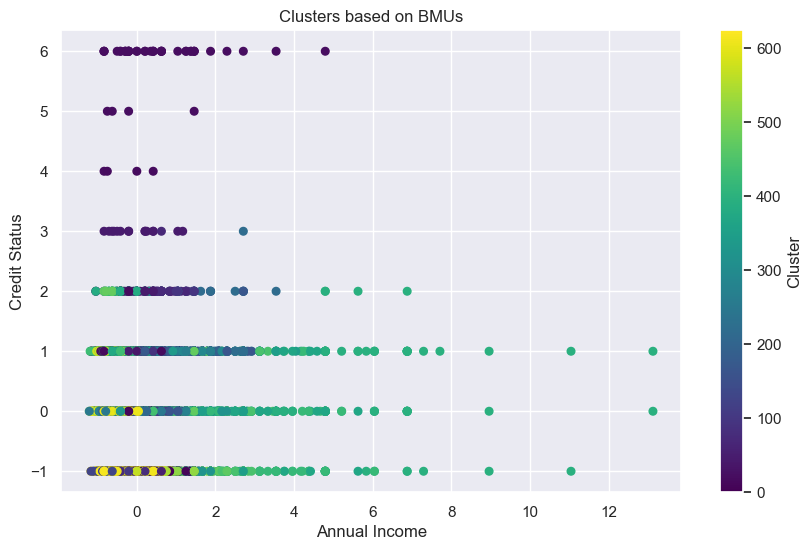

In [209]:
# Scatter plot of Annual_Income vs Credit_Status, colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(econ_assessment_data['Annual_Income'], econ_assessment_data['Credit_Status'],
            c=econ_assessment_data['bmu_econ_som'], cmap='viridis', s=30)
plt.title('Clusters based on BMUs')
plt.xlabel('Annual Income')
plt.ylabel('Credit Status')
plt.colorbar(label='Cluster')
plt.show()


## **SOM- Demographic Perspective**

In [211]:
som_demo_data = df_demographic.drop(columns=['label_kmeans_dem_3', 'label_kmeans_dem_4'])

In [212]:
som_demographic = som_demo_data.values.astype(float)

In [213]:
# define the size of the SOM grid
rows = 25
cols = 25
mapsize = [rows, cols]

In [214]:
# this will use the default parameters, but you can change the initialization and neighborhood methods
som_dem_perspective = SOMFactory().build(som_demographic, mapsize, mask=None, 
                         mapshape='planar', # 2Dimensions
                         lattice='rect', # topology: 'rect' or 'hexa'
                         normalization='var', # standardize the variables
                         initialization='random', # initialization of the weights: 'pca' or 'random'
                         neighborhood='gaussian', # neighborhood function: 'gaussian' or 'bubble'
                         training='batch') # training mode: 'seq' or 'batch'

In [215]:
# For more information about the trainig: verbose='info'
som_dem_perspective.train(n_job=1, verbose='debug', train_rough_len=3, train_finetune_len=5)

 Training...
--------------------------------------------------------------
 details: 
      > data len is 13202 and data dimension is 4
      > map size is 25,25
      > array size in log10 scale is 7.518579737087604
      > number of jobs in parallel: 1
 -------------------------------------------------------------

 random_initialization took: 0.001000 seconds
 Rough training...
 radius_ini: 9.000000 , radius_final: 1.500000, trainlen: 3

 find_bmu took: 0.106000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 1 ---> elapsed time:  0.113000, quantization error: 0.573591

 find_bmu took: 0.115000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 2 ---> elapsed time:  0.122000, quantization error: 1.740196

 find_bmu took: 0.118000 seconds
 update_codebook_voronoi took: 0.002000 seconds
 epoch: 3 ---> elapsed time:  0.124000, quantization error: 0.978858

 find_bmu took: 0.118000 seconds
 Finetune training...
 radius_ini: 2.083333 , radius_final: 1.000000

colorbar update normal <matplotlib.colors.Normalize object at 0x156adb020> <matplotlib.colors.Normalize object at 0x156adb020>
colorbar update normal <matplotlib.colors.Normalize object at 0x156adb020> <matplotlib.colors.Normalize object at 0x156adb020>
locator: <matplotlib.ticker.AutoLocator object at 0x13cf58b90>
locator: <matplotlib.ticker.AutoLocator object at 0x13cf58b90>
locator: <matplotlib.ticker.AutoLocator object at 0x15651a420>


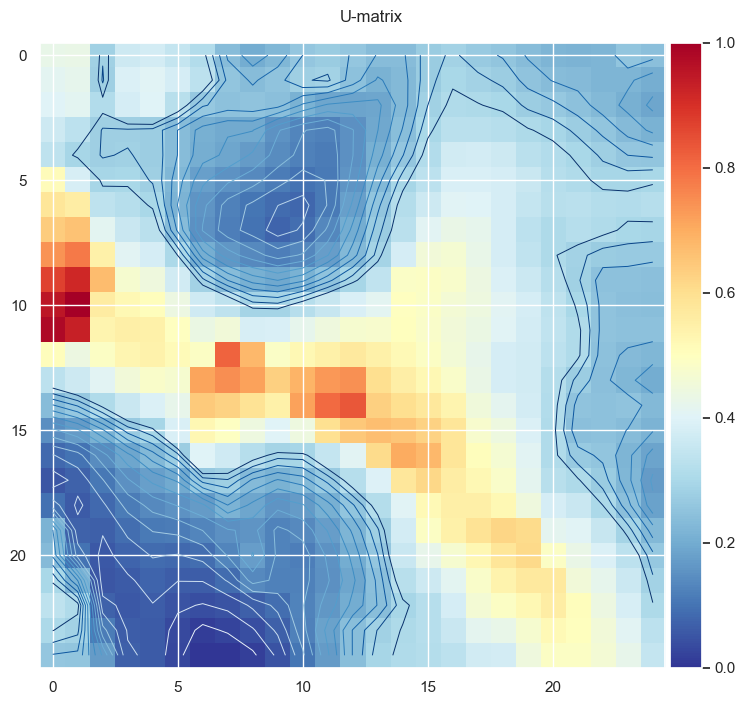

In [216]:
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som_dem_perspective, distance=1, row_normalized=False)


#Here you have Umatrix plus its render
#_, umat = u.show(som_econ_perspective, distance=4, row_normalized=True, contour=True, blob=False)


# Plot U-matrix with contours
_, umat = u.show(som_dem_perspective, distance=25, row_normalized=True, contour=True, blob=False)

top of Axes not in the figure, so title not moved


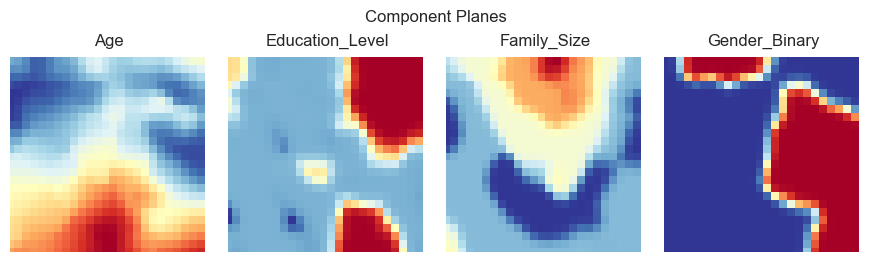

In [217]:
som_dem_perspective.component_names = som_demo_data.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes\n', text_size=8)  
comp_planes.show(som_dem_perspective, what='codebook', which_dim='all', col_sz=10) #which_dim='all' default

In [218]:
# By using the function .project_data() you can get the Best Matching Units of each observation. 
bmus_dem = som_dem_perspective.project_data(som_demographic)
bmus_dem

array([247, 598, 410, ..., 499, 478, 324])

In [219]:
# Get the .codebook.matrix attribute from som to observe the values of the weights each neuron has.
som_dem_perspective.codebook.matrix

array([[-0.901966,  0.49821 ,  0.229167, -0.738096],
       [-0.954846,  0.479972,  0.507232, -0.704313],
       [-1.109855,  0.15455 ,  0.749196, -0.0996  ],
       ...,
       [ 1.375081,  0.223881, -0.274106,  1.352771],
       [ 1.474472, -0.596381, -0.279525,  1.352779],
       [ 1.538769, -0.670475, -0.283795,  1.352779]])

### Clusters with SOM- Demographic Perspective

In the following steps you are going to apply k-means over the SOM to get clusters.

In [221]:
#first you can do clustering. Currently only K-means on top of the trained som
cl_dem_som = som_dem_perspective.cluster(n_clusters=3) 

In [222]:
labels_dem_som = getattr(som_dem_perspective, 'cluster_labels')
labels_dem_som

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2,

top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved


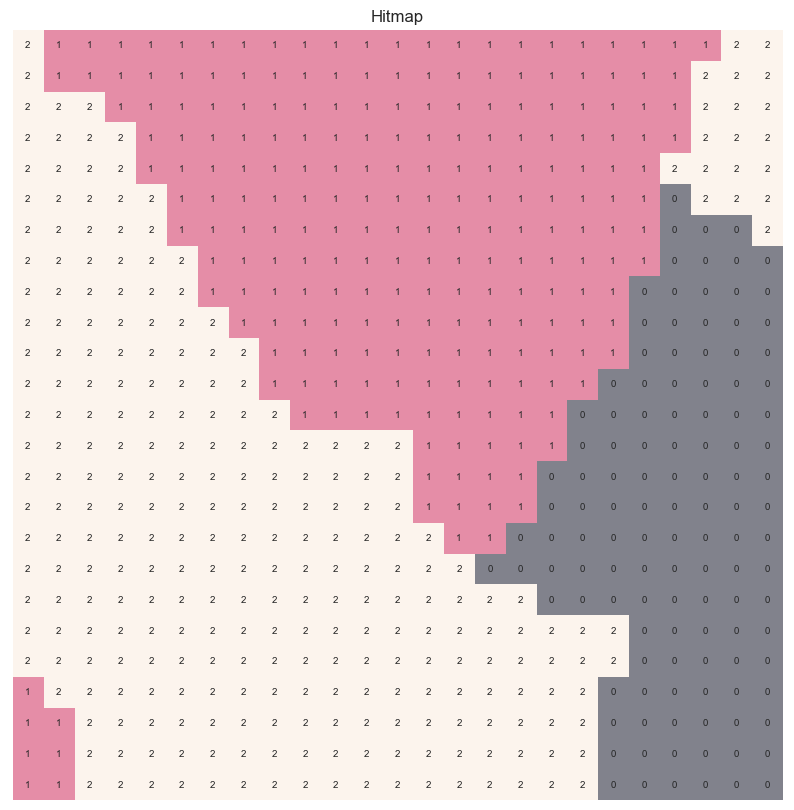

In [223]:
h_dem_som = sompy.hitmap.HitMapView(10, 10, 'Hitmap', text_size=8, show_text=True)
h_dem_som.show(som_dem_perspective)

In [224]:
# get the BMU of each observation
bmu_dem_som = som_dem_perspective.project_data(som_demographic)

dem_assessment_data = df_demographic.copy()
dem_assessment_data['bmu_dem_som'] = bmu_dem_som

In [225]:
# assign to each observation the correspondent cluster label
dem_assessment_data['label'] = labels_dem_som[dem_assessment_data['bmu_dem_som']]
dem_assessment_data

Age  Education_Level  Family_Size  Gender_Binary  \
Client_ID                                                      
5008804   -0.50              1.0          0.0              1   
5008806    0.80              0.0          0.0              1   
5008808    0.50              0.0         -1.0              0   
5008810    0.50              0.0         -1.0              0   
5008815    0.20              1.0          0.0              1   
...         ...              ...          ...            ...   
5149190   -0.80              1.0          1.0              1   
5149729    0.50              0.0          0.0              1   
5149828    0.25              0.0          0.0              1   
5150049    0.35              0.0          0.0              0   
5150337   -0.85              0.0         -1.0              1   

           label_kmeans_dem_3  label_kmeans_dem_4  bmu_dem_som  label  
Client_ID                                                              
5008804                     2                   0          247      0  
5008806                     0                   1          598      0  
5008808                     0                   1          410      2  
5008810                     0                   1          410      2  
5008815                     2                   0          570      0  
...                       ...                 ...          ...    ...  
5149190                     1                   2          244      1  
5149729                     0                   1          548      0  
5149828                     0                   1          499      0  
5150049                     0                   1          478      2  
5150337                     2                   0          324      0  

[13202 rows x 8 columns]

In [226]:
#create a new dataset with the original data and add to it the label column to save the clusters information

dataset_dem_som_final = dem_assessment_data.copy(deep=True)
dataset_dem_som_final = dataset_dem_som_final.drop(columns=['bmu_dem_som'])


dataset_dem_som_final.rename(columns={'label': 'label_cust'}, inplace=True)
dataset_dem_som_final.head()

Age  Education_Level  Family_Size  Gender_Binary  \
Client_ID                                                     
5008804   -0.5              1.0          0.0              1   
5008806    0.8              0.0          0.0              1   
5008808    0.5              0.0         -1.0              0   
5008810    0.5              0.0         -1.0              0   
5008815    0.2              1.0          0.0              1   

           label_kmeans_dem_3  label_kmeans_dem_4  label_cust  
Client_ID                                                      
5008804                     2                   0           0  
5008806                     0                   1           0  
5008808                     0                   1           2  
5008810                     0                   1           2  
5008815                     2                   0           0

locator: <matplotlib.ticker.AutoLocator object at 0x156c598b0>


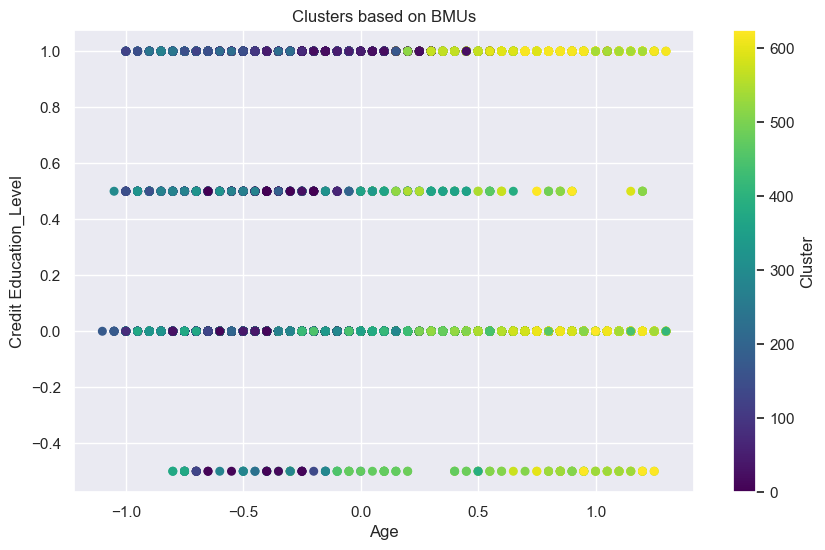

In [227]:
# Scatter plot of Annual_Income vs Credit_Status, colored by cluster labels
plt.figure(figsize=(10, 6))
plt.scatter(dem_assessment_data['Age'], dem_assessment_data['Education_Level'],
            c=dem_assessment_data['bmu_dem_som'], cmap='viridis', s=30)
plt.title('Clusters based on BMUs')
plt.xlabel('Age')
plt.ylabel('Credit Education_Level')
plt.colorbar(label='Cluster')
plt.show()

## **K-Prototypes**

In [229]:
df_scaled.head()

Owns_Car  Owns_Realty  Annual_Income  Education_Level  \
Client_ID                                                          
5008804         1.0          0.0       2.500000              1.0   
5008806         1.0          0.0      -0.416667              0.0   
5008808         0.0          0.0       1.041667              0.0   
5008810         0.0          0.0       1.041667              0.0   
5008815         1.0          0.0       1.041667              1.0   

           Has_Work_Phone  Has_Personal_Phone  Has_Email  Family_Size  \
Client_ID                                                               
5008804               1.0                 0.0        0.0          0.0   
5008806               0.0                 0.0        0.0          0.0   
5008808               0.0                 1.0        1.0         -1.0   
5008810               0.0                 1.0        1.0         -1.0   
5008815               1.0                 1.0        1.0          0.0   

           Credit_Status  Age  Employment_Status Gender  \
Client_ID                                                 
5008804              0.0 -0.5           1.285714      M   
5008806              0.0  0.8           0.000000      M   
5008808              1.0  0.5           0.714286      F   
5008810              0.0  0.5           0.714286      F   
5008815              1.0  0.2          -0.142857      M   

                     Income_Type Marital_Status        Housing_Type  \
Client_ID                                                             
5008804    Private Sector Worker        Married    Rented Apartment   
5008806    Private Sector Worker        Married  House or Apartment   
5008808    Private Sector Worker         Single  House or Apartment   
5008810    Private Sector Worker         Single  House or Apartment   
5008815    Private Sector Worker        Married  House or Apartment   

              Occupation_Type Income_Bracket  label_kmodes  
Client_ID                                                   
5008804    Finance & Business           High             1  
5008806       Services Sector            Low             2  
5008808       Services Sector           High             0  
5008810       Services Sector           High             0  
5008815    Finance & Business           High             1

In [230]:
# Numerical and categorical variables
categorical_columns = ['Education_Level', 'Income_Type', 'Occupation_Type', 'Marital_Status']
numerical_columns = ['Annual_Income', 'Age', 'Employment_Status']

# Separate the numerical and categorical variables
df_kprototypes = df_scaled[['Annual_Income', 'Education_Level', 'Employment_Status', 
                           'Income_Type', 'Occupation_Type', 'Marital_Status', 'Age']].copy()


# Convert the categorical into strings
for col in categorical_columns:
    df_kprototypes[col] = df_kprototypes[col].astype(str)


In [231]:
df_kprototypes.head()

Annual_Income Education_Level  Employment_Status  \
Client_ID                                                     
5008804         2.500000             1.0           1.285714   
5008806        -0.416667             0.0           0.000000   
5008808         1.041667             0.0           0.714286   
5008810         1.041667             0.0           0.714286   
5008815         1.041667             1.0          -0.142857   

                     Income_Type     Occupation_Type Marital_Status  Age  
Client_ID                                                                 
5008804    Private Sector Worker  Finance & Business        Married -0.5  
5008806    Private Sector Worker     Services Sector        Married  0.8  
5008808    Private Sector Worker     Services Sector         Single  0.5  
5008810    Private Sector Worker     Services Sector         Single  0.5  
5008815    Private Sector Worker  Finance & Business        Married  0.2

In [232]:
# costs = []

# Number of clusters we want to test 
# n_clusters_range = range(1, 10)


# for n_clusters in n_clusters_range:
#     # Initialize the k-prototype model
#     kproto = KPrototypes(n_clusters=n_clusters, init='Cao', random_state=42)
#     kproto.fit(df_kprototypes, categorical=[1,3,4,5])  # Índices das colunas categóricas
#     #Add the calculated intra-cluster cost to the cost vector
#     costs.append(kproto.cost_)

#Vizualize 
# plt.plot(n_clusters_range, costs, marker='o')
# plt.title('Custo Intra-cluster para K-Prototypes')
# plt.xlabel('Número de Clusters')
# plt.ylabel('Custo')
# plt.show()

#The best results were 4 and 5 clusters. The code is commented because it takes time to run.

In [233]:
# Fit the model with the optimal number of clusters (4 clusters)
kproto_4 = KPrototypes(n_clusters=4, init='Cao', random_state=42)
clusters_4 = kproto_4.fit_predict(df_kprototypes, categorical=[1, 3, 4, 5])

df_kprototypes['label_kproto_4'] = clusters_4
df_kprototypes['Model_4'] = 'KPrototypes_4_Clusters'


locator: <matplotlib.ticker.AutoLocator object at 0x1561256a0>


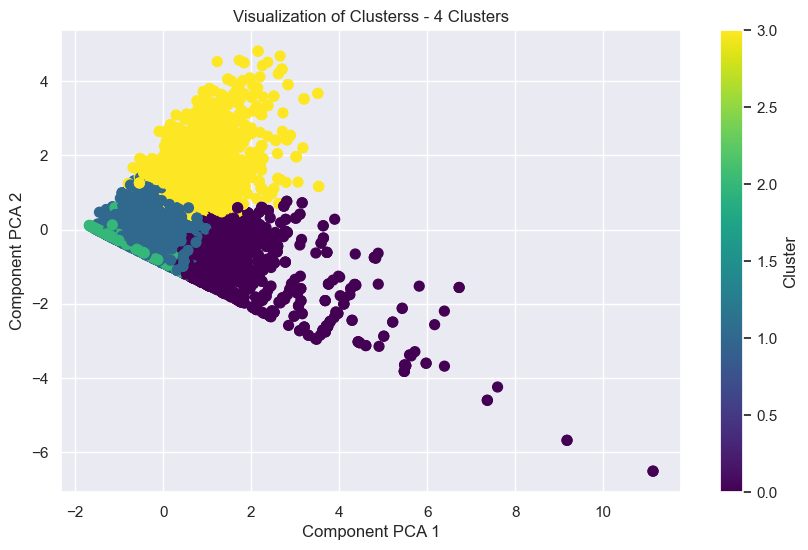

In [234]:
pca = PCA(n_components=2)
numerical_data = df_kprototypes[numerical_columns]
reduced_data = pca.fit_transform(numerical_data)

# Vizualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_kprototypes['label_kproto_4'], cmap='viridis', s=50)
plt.title('Visualization of Clusterss - 4 Clusters')
plt.xlabel('Component PCA 1')
plt.ylabel('Component PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [235]:
# Silhouette Score for the model with 4 clusters
silhouette_avg_4 = silhouette_score(numerical_data, clusters_4)
print(f'Silhouette Score para 4 clusters: {silhouette_avg_4}')

Silhouette Score para 4 clusters: 0.3210040833158492


In [236]:
#Now we are trying doing with 5 clusters
# Categorical and numerical variables
categorical_columns = ['Education_Level', 'Income_Type', 
                       'Occupation_Type', 'Marital_Status']
numerical_columns = ['Annual_Income', 'Age','Employment_Status']

# Separate the categorical and the numerivcal variables
df_kprototypes_5 = df_scaled[['Annual_Income', 'Education_Level', 'Employment_Status', 
                           'Income_Type', 'Occupation_Type', 'Marital_Status', 'Age']].copy()

    
# Convert the categorical into strings
for col in categorical_columns:
    df_kprototypes_5[col] = df_kprototypes_5[col].astype(str)
 

In [237]:
# Fit the model with the optimal number of clusters (5 clusters)
kproto_5 = KPrototypes(n_clusters=5, init='Cao', random_state=42)
clusters_5 = kproto_5.fit_predict(df_kprototypes_5, categorical=[1, 3, 4, 5])

# Adicionar os clusters e identificar o modelo
df_kprototypes_5['label_kproto_5'] = clusters_5
df_kprototypes_5['Model_5'] = 'KPrototypes_5_Clusters'

locator: <matplotlib.ticker.AutoLocator object at 0x1560dddf0>


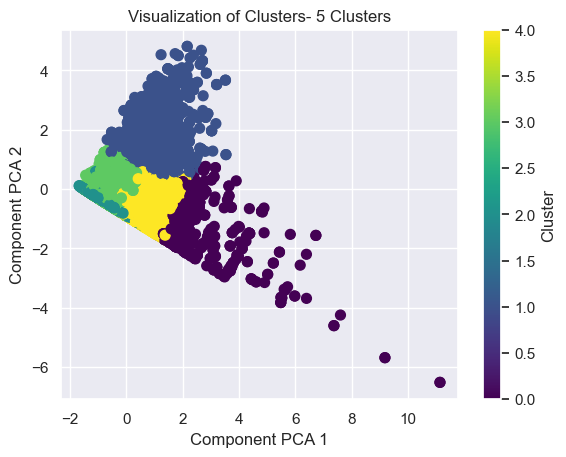

In [238]:
pca = PCA(n_components=2)
numerical_data_5 = df_kprototypes_5[numerical_columns]
reduced_data_5= pca.fit_transform(numerical_data_5)

# Vizualize the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df_kprototypes_5['label_kproto_5'], cmap='viridis', s=50)
plt.title('Visualization of Clusters- 5 Clusters')
plt.xlabel('Component PCA 1')
plt.ylabel('Component PCA 2')
plt.colorbar(label='Cluster')
plt.show()

In [239]:
# Adicionar o Silhouette Score
silhouette_avg = silhouette_score(numerical_data_5, clusters_5)

# Exibir o Silhouette Score
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.30702561696823977


Since 5 clusters have a better silhouette score, we will now visualize the clusters.

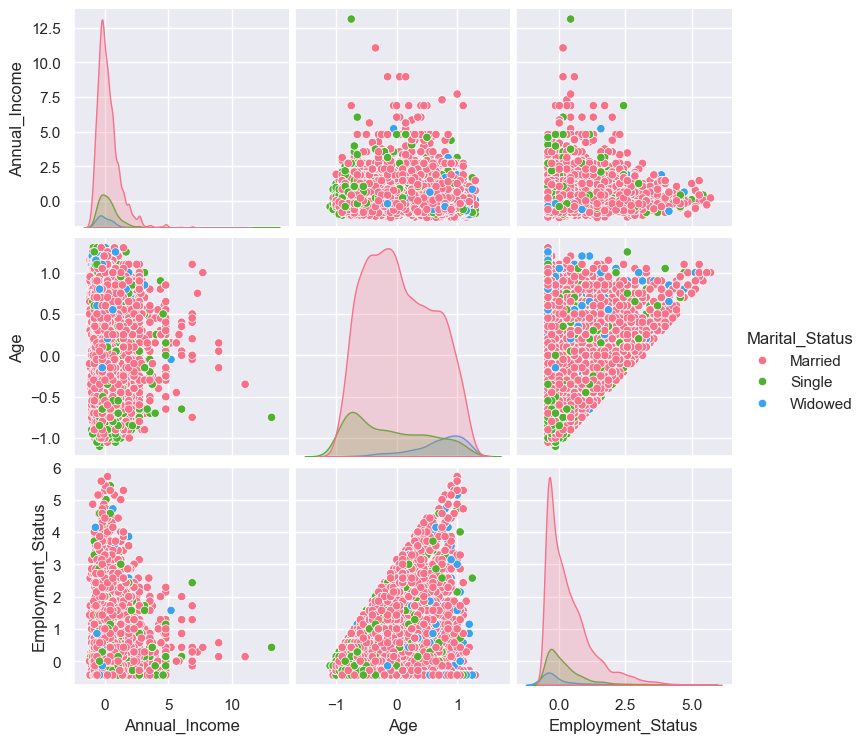

In [241]:
# Select only numerical columns for the pairplot
numerical_columns = ['Annual_Income', 'Age', 'Employment_Status']

# Add one categorical column to use as `hue` for coloring
hue_column = 'Marital_Status'  

pairplot_data = df_kprototypes_5[numerical_columns + [hue_column]].copy()

# Plot the pairplot
sns.pairplot(data=pairplot_data, hue=hue_column, diag_kind='kde', palette='husl')
plt.show()

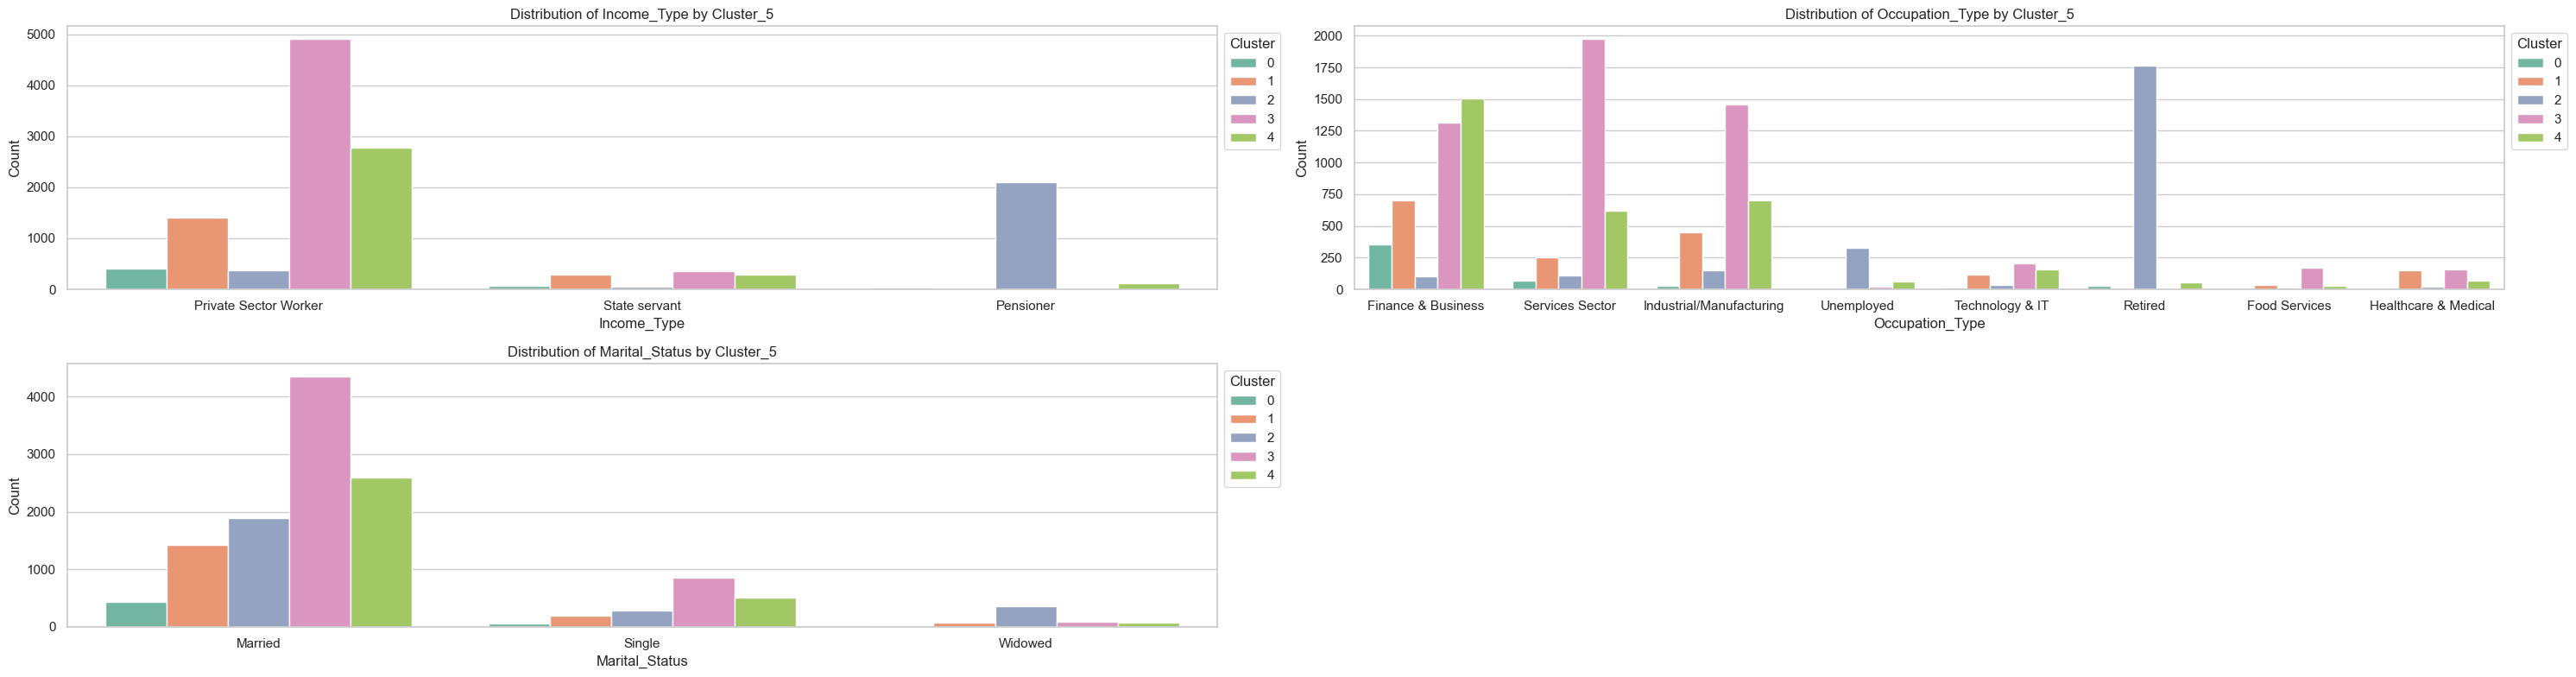

In [242]:
# Listing the categorical variables
categorical_columns = ['Income_Type', 'Occupation_Type', 'Marital_Status']

sns.set(style="whitegrid")
plt.figure(figsize=(30, 8))

# Iterating over the categorical variables and creating bar plots
for feature in categorical_columns:
    plt.subplot(2, 2, categorical_columns.index(feature) + 1)  # Define the subplot position
    sns.countplot(x=feature, hue='label_kproto_5', data=df_kprototypes_5, palette="Set2")  # Bar plot
    plt.title(f'Distribution of {feature} by Cluster_5')  # Title
    plt.xlabel(feature)  # X-axis label
    plt.ylabel('Count')  # Y-axis label
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

# Adjusting the layout to prevent overlapping between subplots
plt.tight_layout()
plt.show()



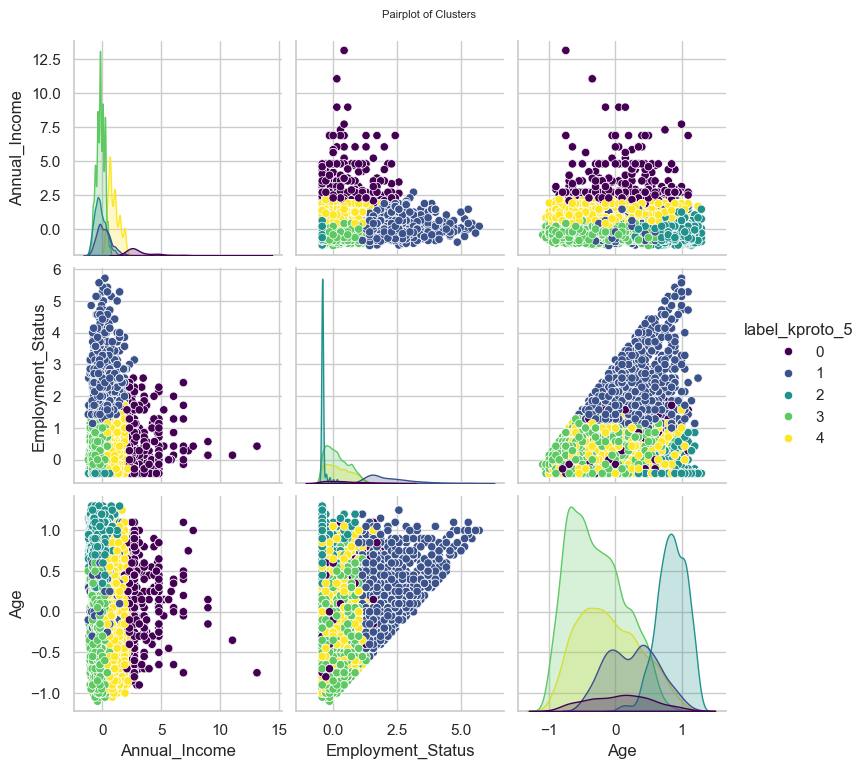

In [243]:
sns.pairplot(df_kprototypes_5, hue='label_kproto_5', palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot of Clusters", y=1.02)
plt.show()


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings 

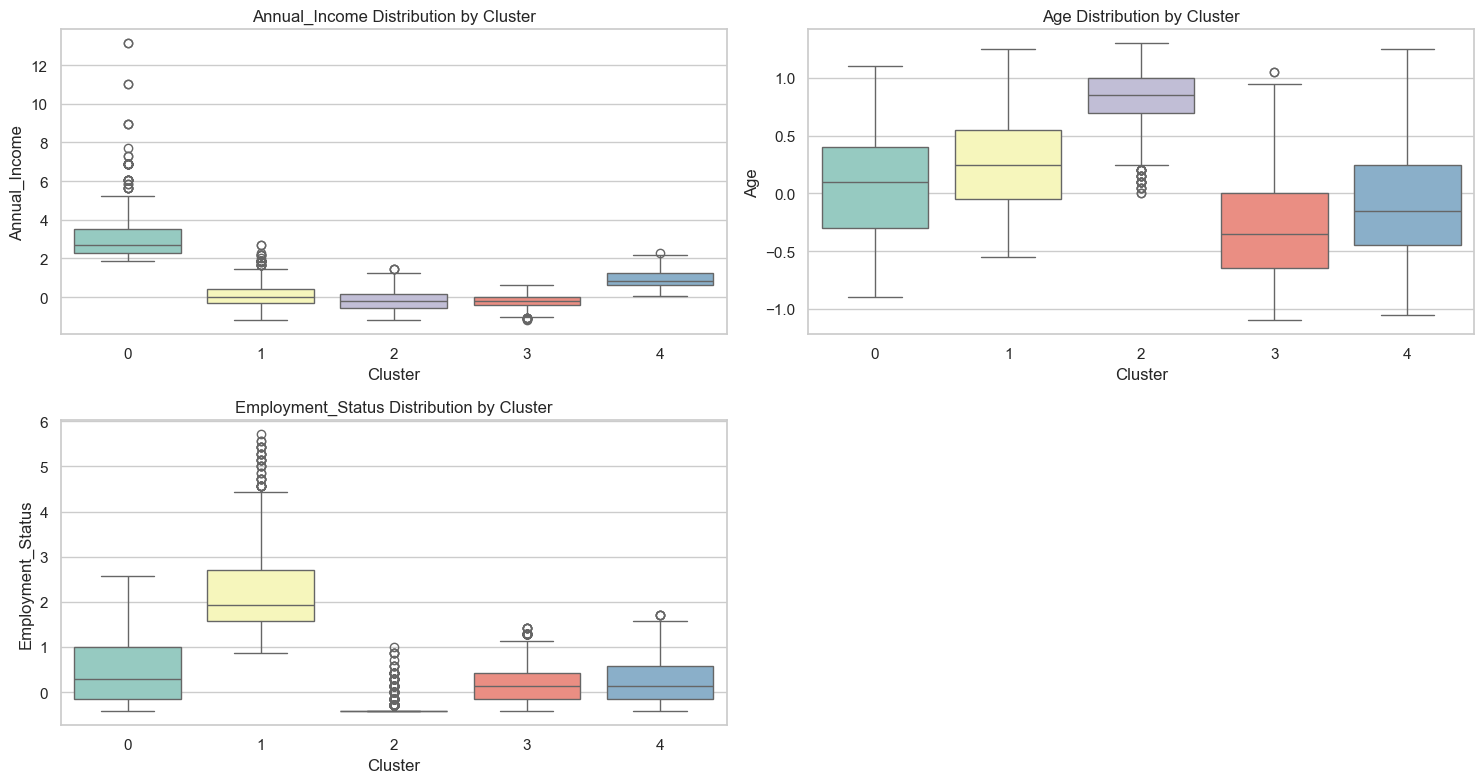

In [244]:
numerical_columns = ['Annual_Income', 'Age', 'Employment_Status']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='label_kproto_5', y=feature, data=df_kprototypes_5, palette='Set3')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()


locator: <matplotlib.ticker.AutoLocator object at 0x156e73ef0>


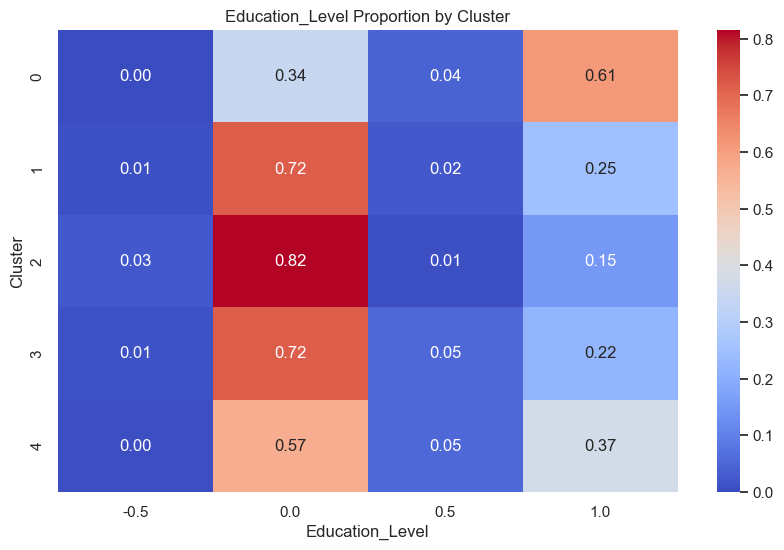

locator: <matplotlib.ticker.AutoLocator object at 0x156225b20>


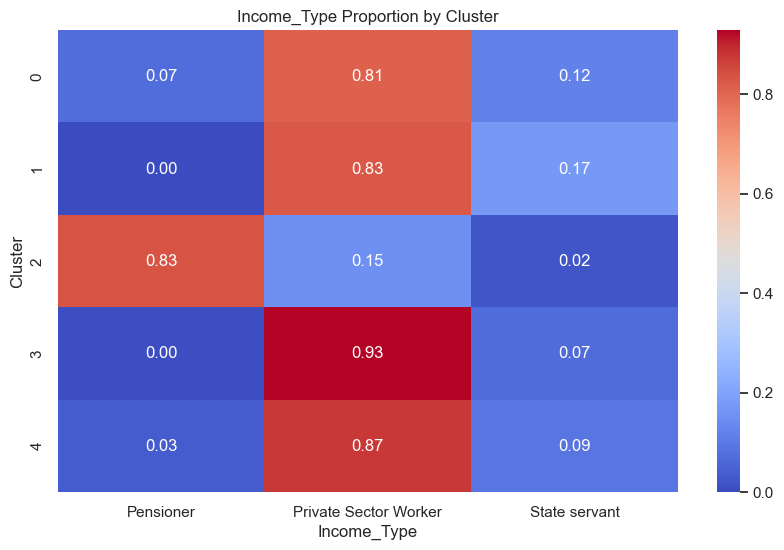

locator: <matplotlib.ticker.AutoLocator object at 0x13cc931d0>


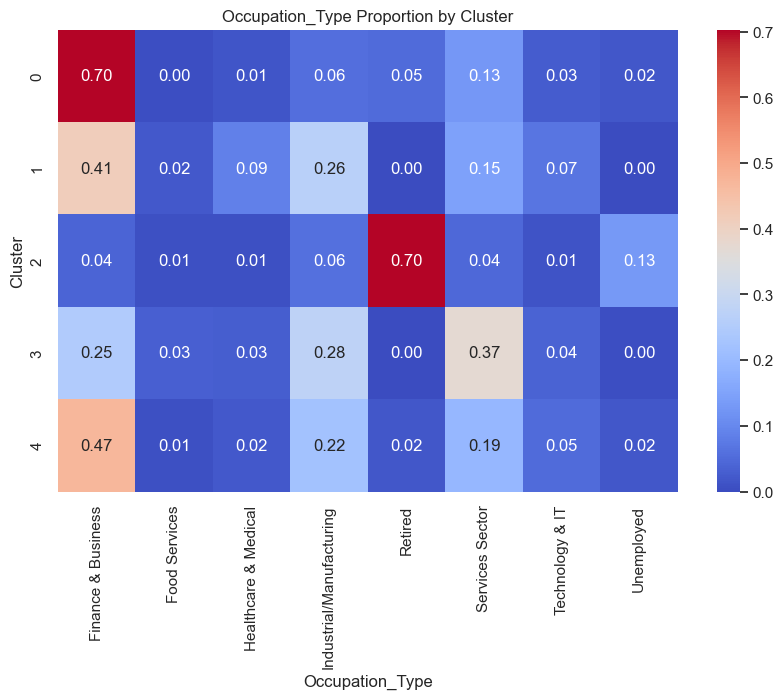

locator: <matplotlib.ticker.AutoLocator object at 0x13cb9f080>


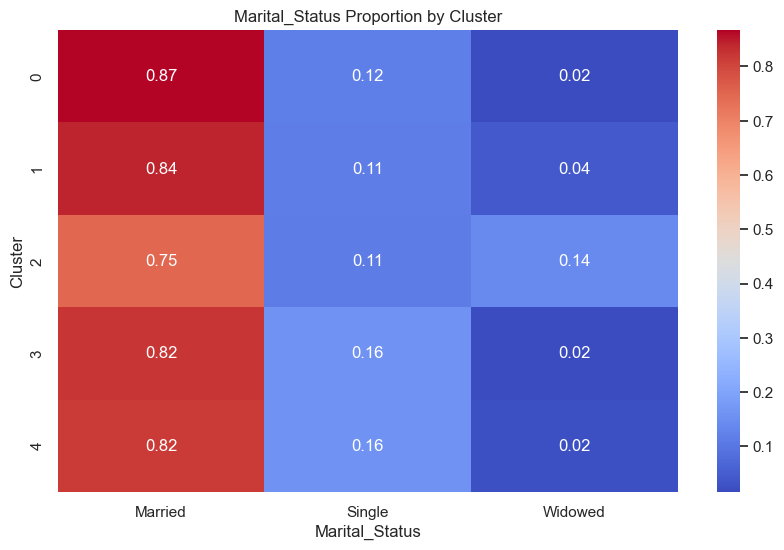

In [245]:
categorical_columns = ['Education_Level', 'Income_Type', 'Occupation_Type', 'Marital_Status']


for feature in categorical_columns:
    heatmap_data = pd.crosstab(df_kprototypes_5['label_kproto_5'], df_kprototypes_5[feature], normalize='index')
    
    # Visualize the heatmaps
    plt.figure(figsize=(10, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'{feature} Proportion by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Cluster')
    plt.show()


In [246]:
# Statistical analysis by cluster
df_kprototypes_5.groupby('label_kproto_5')[numerical_columns].describe()


Annual_Income                                          \
                       count      mean       std       min       25%   
label_kproto_5                                                         
0                      505.0  3.296312  1.495671  1.875000  2.291667   
1                     1700.0  0.132105  0.615721 -1.208333 -0.291667   
2                     2518.0 -0.201684  0.486912 -1.187500 -0.583333   
3                     5293.0 -0.202265  0.343740 -1.208333 -0.416667   
4                     3186.0  0.941973  0.474130  0.041667  0.625000   

                                                  Age            ...        \
                     50%       75%        max   count      mean  ...   75%   
label_kproto_5                                                   ...         
0               2.708333  3.541667  13.125000   505.0  0.065446  ...  0.40   
1               0.000000  0.416667   2.708333  1700.0  0.251029  ...  0.55   
2              -0.208333  0.166667   1.458333  2518.0  0.849921  ...  1.00   
3              -0.208333  0.000000   0.625000  5293.0 -0.285726  ...  0.00   
4               0.833333  1.250000   2.291667  3186.0 -0.098054  ...  0.25   

                     Employment_Status                                \
                 max             count      mean       std       min   
label_kproto_5                                                         
0               1.10             505.0  0.469873  0.758917 -0.428571   
1               1.25            1700.0  2.171597  0.872389  0.857143   
2               1.30            2518.0 -0.380290  0.159291 -0.428571   
3               1.05            5293.0  0.152681  0.438116 -0.428571   
4               1.25            3186.0  0.219532  0.488146 -0.428571   

                                                        
                     25%       50%       75%       max  
label_kproto_5                                          
0              -0.142857  0.285714  1.000000  2.571429  
1               1.571429  1.928571  2.714286  5.714286  
2              -0.428571 -0.428571 -0.428571  1.000000  
3              -0.142857  0.142857  0.428571  1.428571  
4              -0.142857  0.142857  0.571429  1.714286  

[5 rows x 24 columns]

In [247]:
# Assuming model_1 is your fitted KMeans or another model that assigns labels
df_economic['label_kmeans_ec_3'] = model_1.labels_  # Add labels from model_1 to df_economic
df_economic['label_kmeans_ec_3'] = model_2.labels_
df_economic['label_kmeans_ec_4'] = model_2.labels_

In [248]:
# Correct references to df_kprototypes_5
label_kmodes = df_scaled['label_kmodes']  # Column from df_cons_behav
labels_kmeans_ec_3 = df_economic['label_kmeans_ec_3']  # Column from df_economic
labels_kmeans_ec_4 = df_economic['label_kmeans_ec_4']  # Column from df_economic
labels_kmeans_dem_3 = df_demographic['label_kmeans_dem_3']  # Column from df_demographic
labels_kmeans_dem_4 = df_demographic['label_kmeans_dem_4']  # Column from df_demographic
label_kproto_4 = df_kprototypes['label_kproto_4']  # Column from df_kprototypes
label_kproto_5 = df_kprototypes_5['label_kproto_5']  # Correct column from df_kprototypes_5

# Assuming you want to keep existing columns in df_cleaned
# We can use pd.concat to add the new columns while keeping the existing ones intact.

# Concatenate the new columns (make sure the index aligns correctly)
df_clean = pd.concat([df_clean, label_kmodes, labels_kmeans_ec_3, labels_kmeans_ec_4, 
                       labels_kmeans_dem_3, labels_kmeans_dem_4, label_kproto_4, label_kproto_5], 
                       axis=1)




In [249]:
df_clean.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0         427500   
5008806        M         1            1                   0         112500   
5008808        F         0            1                   0         270000   
5008810        F         0            1                   0         270000   
5008815        M         1            1                   0         270000   

                     Income_Type  Education_Level Marital_Status  \
Client_ID                                                          
5008804    Private Sector Worker                4        Married   
5008806    Private Sector Worker                2        Married   
5008808    Private Sector Worker                2         Single   
5008810    Private Sector Worker                2         Single   
5008815    Private Sector Worker                4        Married   

                 Housing_Type  Has_Work_Phone  ...  Age  Employment_Status  \
Client_ID                                      ...                           
5008804      Rented Apartment               1  ...   32                 12   
5008806    House or Apartment               0  ...   58                  3   
5008808    House or Apartment               0  ...   52                  8   
5008810    House or Apartment               0  ...   52                  8   
5008815    House or Apartment               1  ...   46                  2   

          Income_Bracket  label_kmodes  label_kmeans_ec_3  label_kmeans_ec_4  \
Client_ID                                                                      
5008804             High             1                  2                  2   
5008806              Low             2                  0                  0   
5008808             High             0                  3                  3   
5008810             High             0                  2                  2   
5008815             High             1                  3                  3   

           label_kmeans_dem_3 label_kmeans_dem_4  label_kproto_4  \
Client_ID                                                          
5008804                     2                  0               0   
5008806                     0                  1               2   
5008808                     0                  1               1   
5008810                     0                  1               1   
5008815                     2                  0               0   

           label_kproto_5  
Client_ID                  
5008804                 0  
5008806                 2  
5008808                 4  
5008810                 4  
5008815                 4  

[5 rows x 25 columns]

<br>
<br>
<center><h3 style="color:mediumseagreen; font-size:25px;">Data Vizualization- Without the data scaled</h3></center>

findfont: Matching sans\-serif:style=normal:variant=normal:weight=bold:stretch=normal:size=25.0.
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizOneSymBol.ttf', name='STIXSizeOneSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.05
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerifDisplay.ttf', name='DejaVu Serif Display', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.335
findfont: score(FontEntry(fname='/opt/anaconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='ita

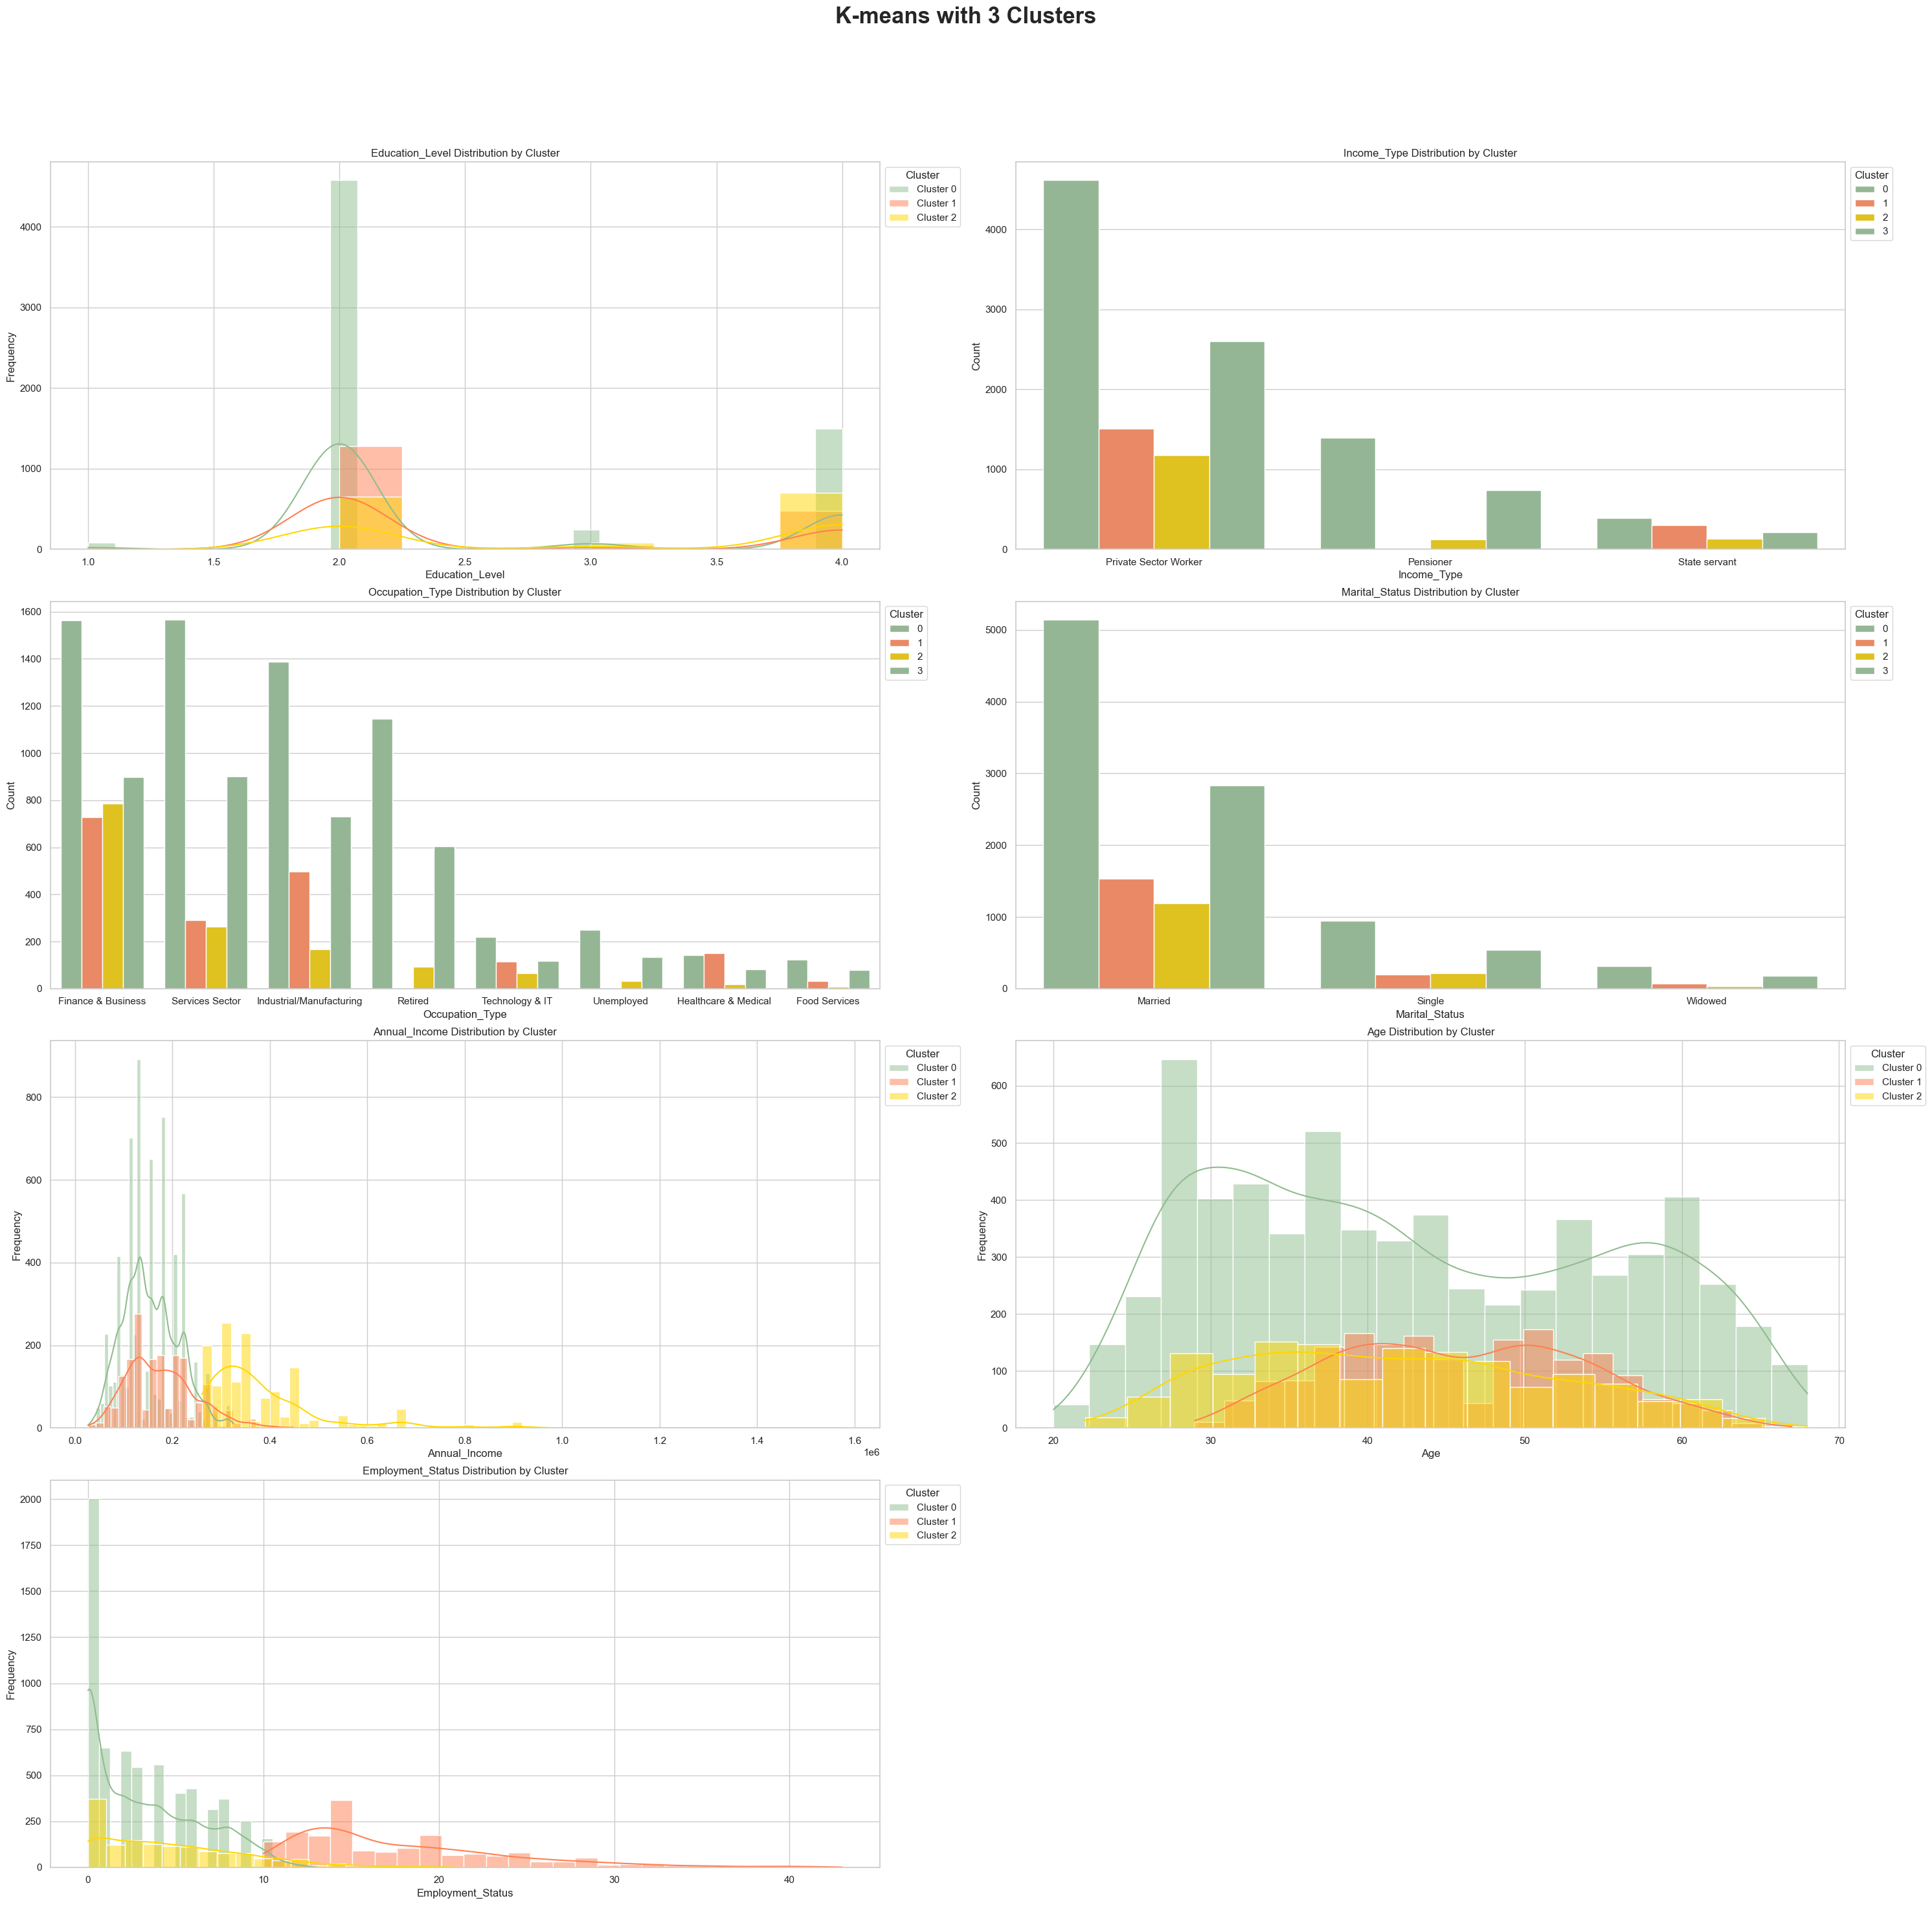

In [251]:
# Define the columns you want to plot
columns_clusters = ['Education_Level', 'Income_Type', 'Occupation_Type', 'Marital_Status','Annual_Income', 'Age', 'Employment_Status']

# Define the colors for each cluster (assuming 3 clusters in this case)
cluster_colors = ['darkseagreen', 'coral', 'gold']

# Create the figure and subplots
plt.figure(figsize=(30, 30))

# Number of columns to plot
num_columns = len(columns_clusters)

# Adjust the subplot grid based on the number of columns
rows = (num_columns // 2) + (num_columns % 2)  # Calculate the number of rows dynamically

for i, column in enumerate(columns_clusters):
    plt.subplot(rows, 2, i+1) 
    
    if df_clean[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Numeric columns - histograms
        for cluster in range(3):  # Assuming you have 3 clusters
            cluster_data = df_clean[df_clean['label_kmeans_ec_3'] == cluster]
            sns.histplot(cluster_data[column], color=cluster_colors[cluster], label=f'Cluster {cluster}', kde=True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution by Cluster')
    
    else:  # Categorical columns - countplot
        # Categorical columns - bar plots with custom color palette
        sns.countplot(x=column, data=df_clean, hue='label_kmeans_ec_3', palette=cluster_colors, order=df_clean[column].value_counts().index)
        
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by Cluster')

    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

# Add the overall title
plt.suptitle('K-means with 3 Clusters', fontsize=25, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the suptitle
plt.show()

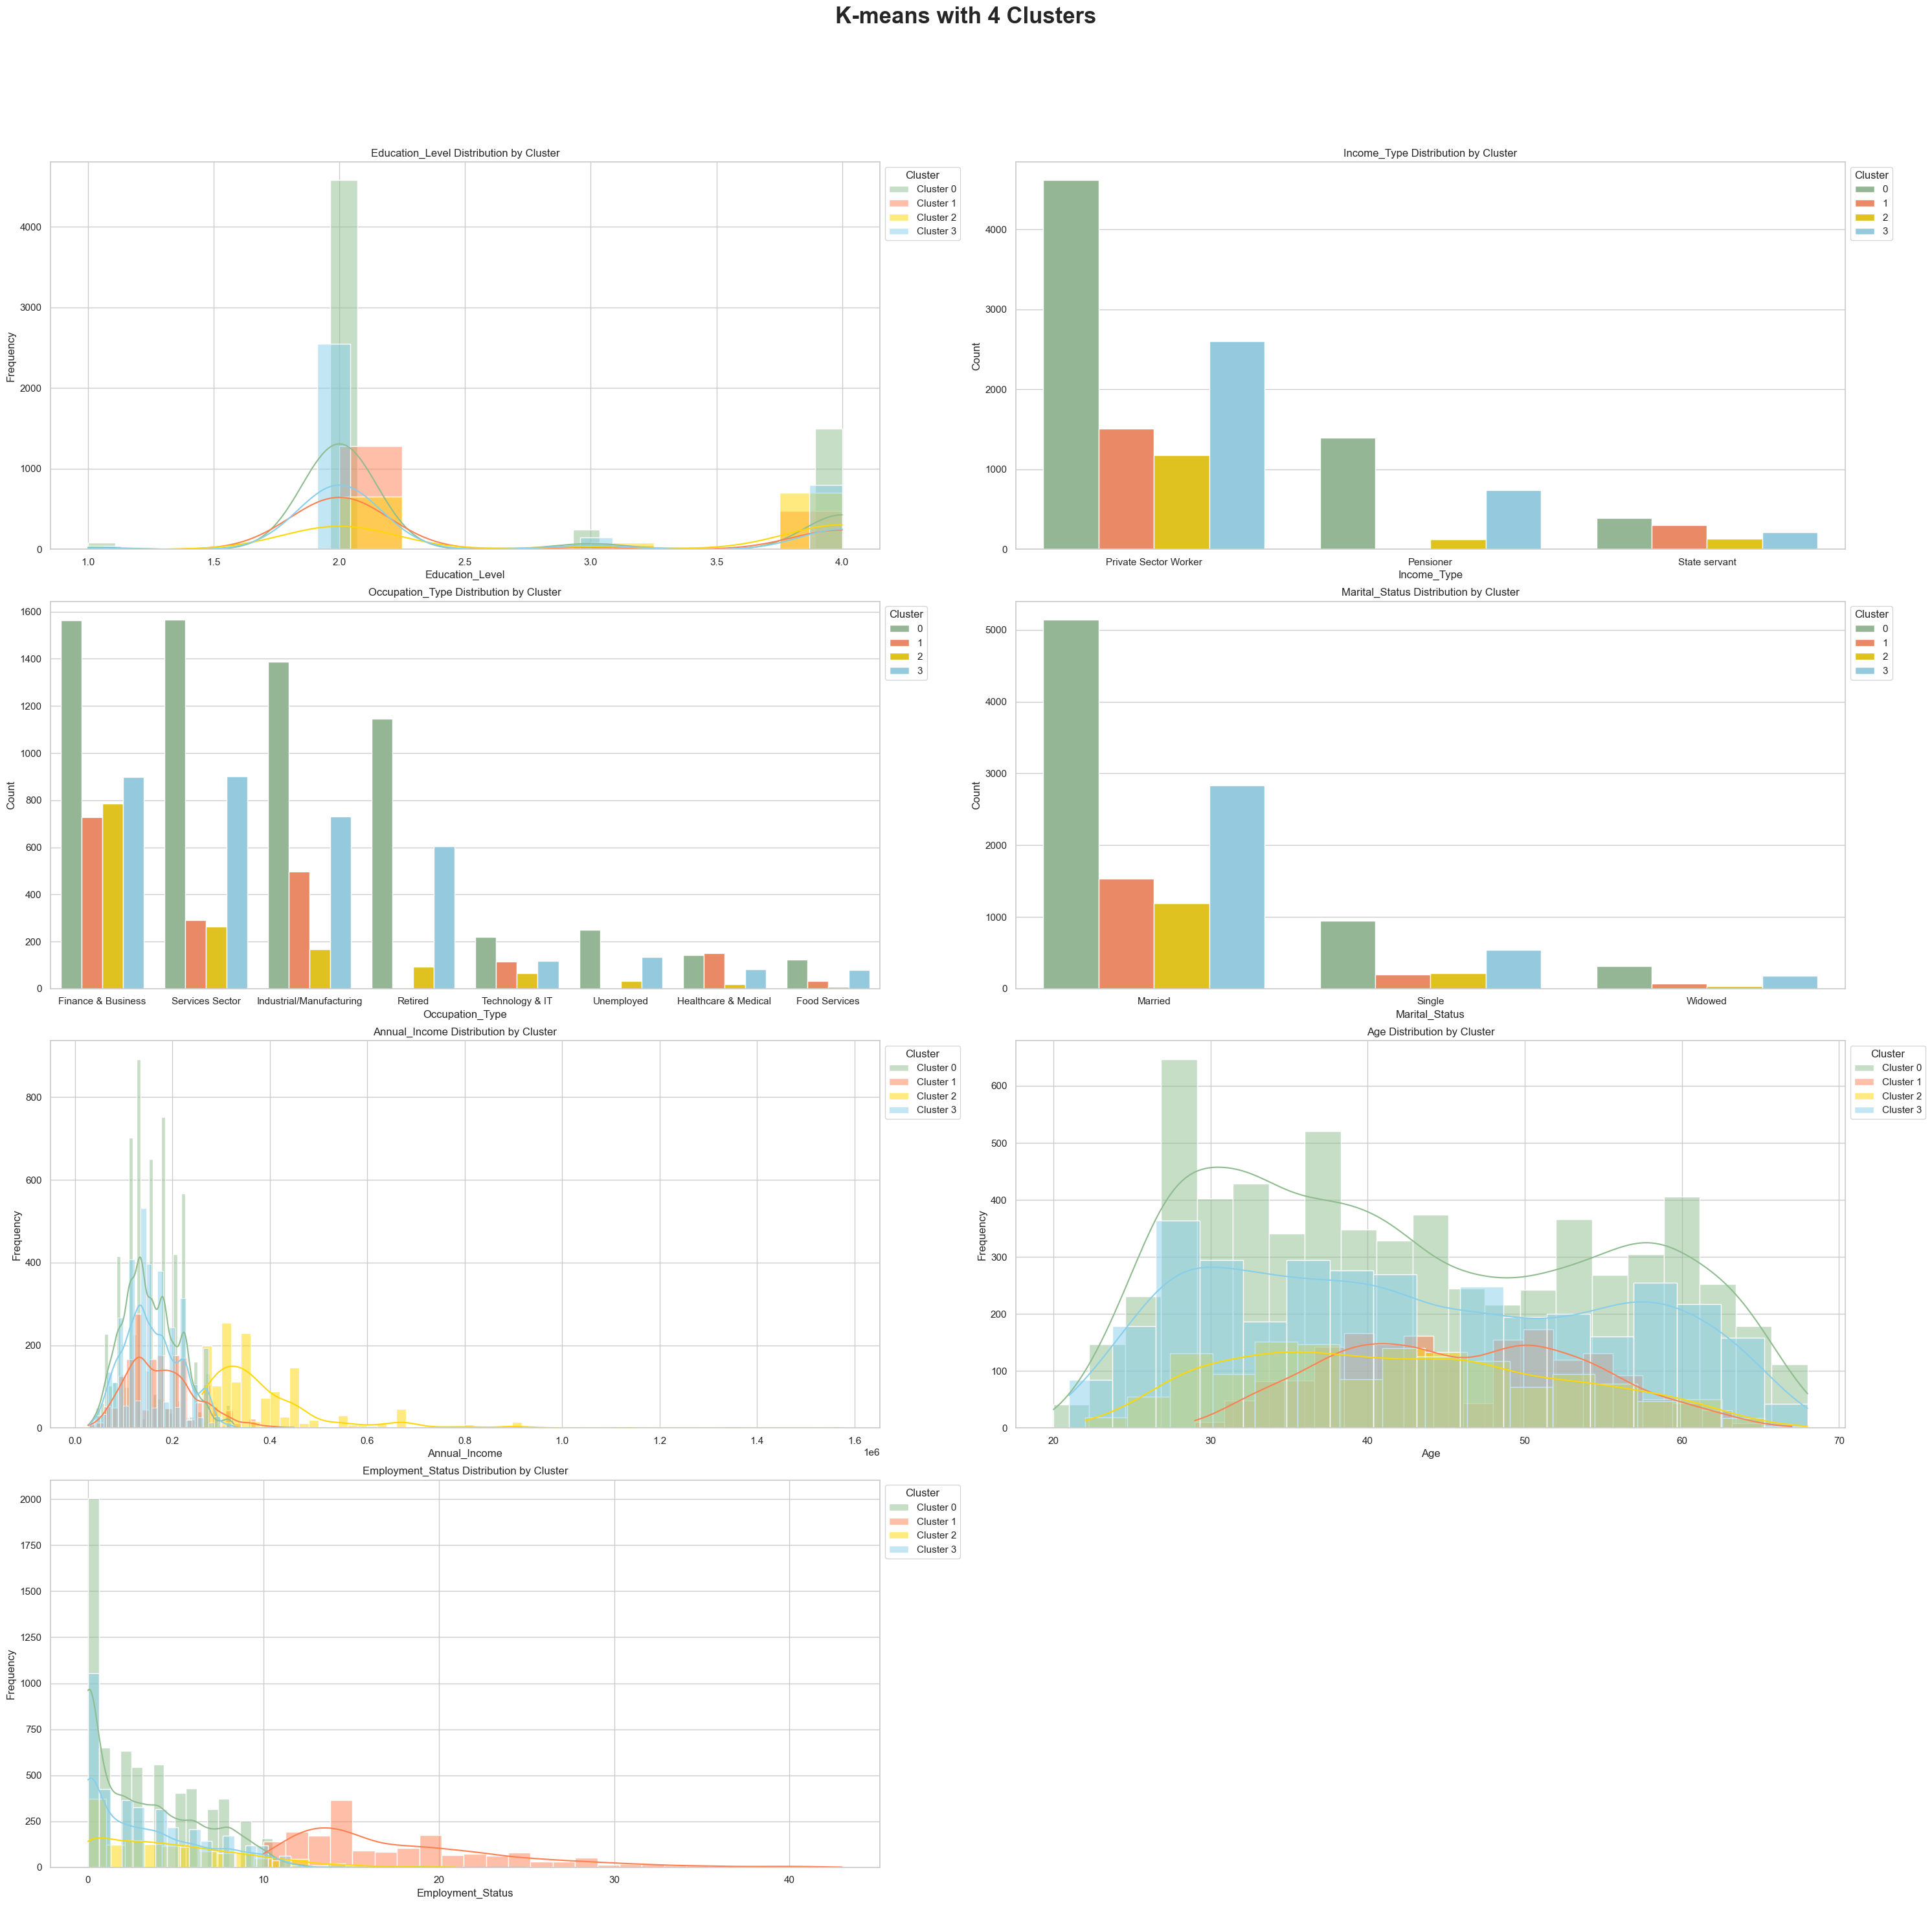

In [252]:
# Define the colors for each cluster (assuming 3 clusters in this case)
cluster_colors = ['darkseagreen', 'coral', 'gold', 'skyblue']

# Create the figure and subplots
plt.figure(figsize=(30, 30))

# Number of columns to plot
num_columns = len(columns_clusters)

# Adjust the subplot grid based on the number of columns
rows = (num_columns // 2) + (num_columns % 2)  # Calculate the number of rows dynamically

for i, column in enumerate(columns_clusters):
    plt.subplot(rows, 2, i+1)  # Adjust the row and column placement dynamically
    
    if df_clean[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Numeric columns - histograms
        for cluster in range(4): 
            cluster_data = df_clean[df_clean['label_kmeans_ec_4'] == cluster]
            sns.histplot(cluster_data[column], color=cluster_colors[cluster], label=f'Cluster {cluster}', kde=True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution by Cluster')
    
    else:  # Categorical columns - countplot
        # Categorical columns - bar plots with custom color palette
        sns.countplot(x=column, data=df_clean, hue='label_kmeans_ec_4', palette=cluster_colors, order=df_clean[column].value_counts().index)
        
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by Cluster')

    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

# Add the overall title
plt.suptitle('K-means with 4 Clusters', fontsize=25, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the suptitle
plt.show()

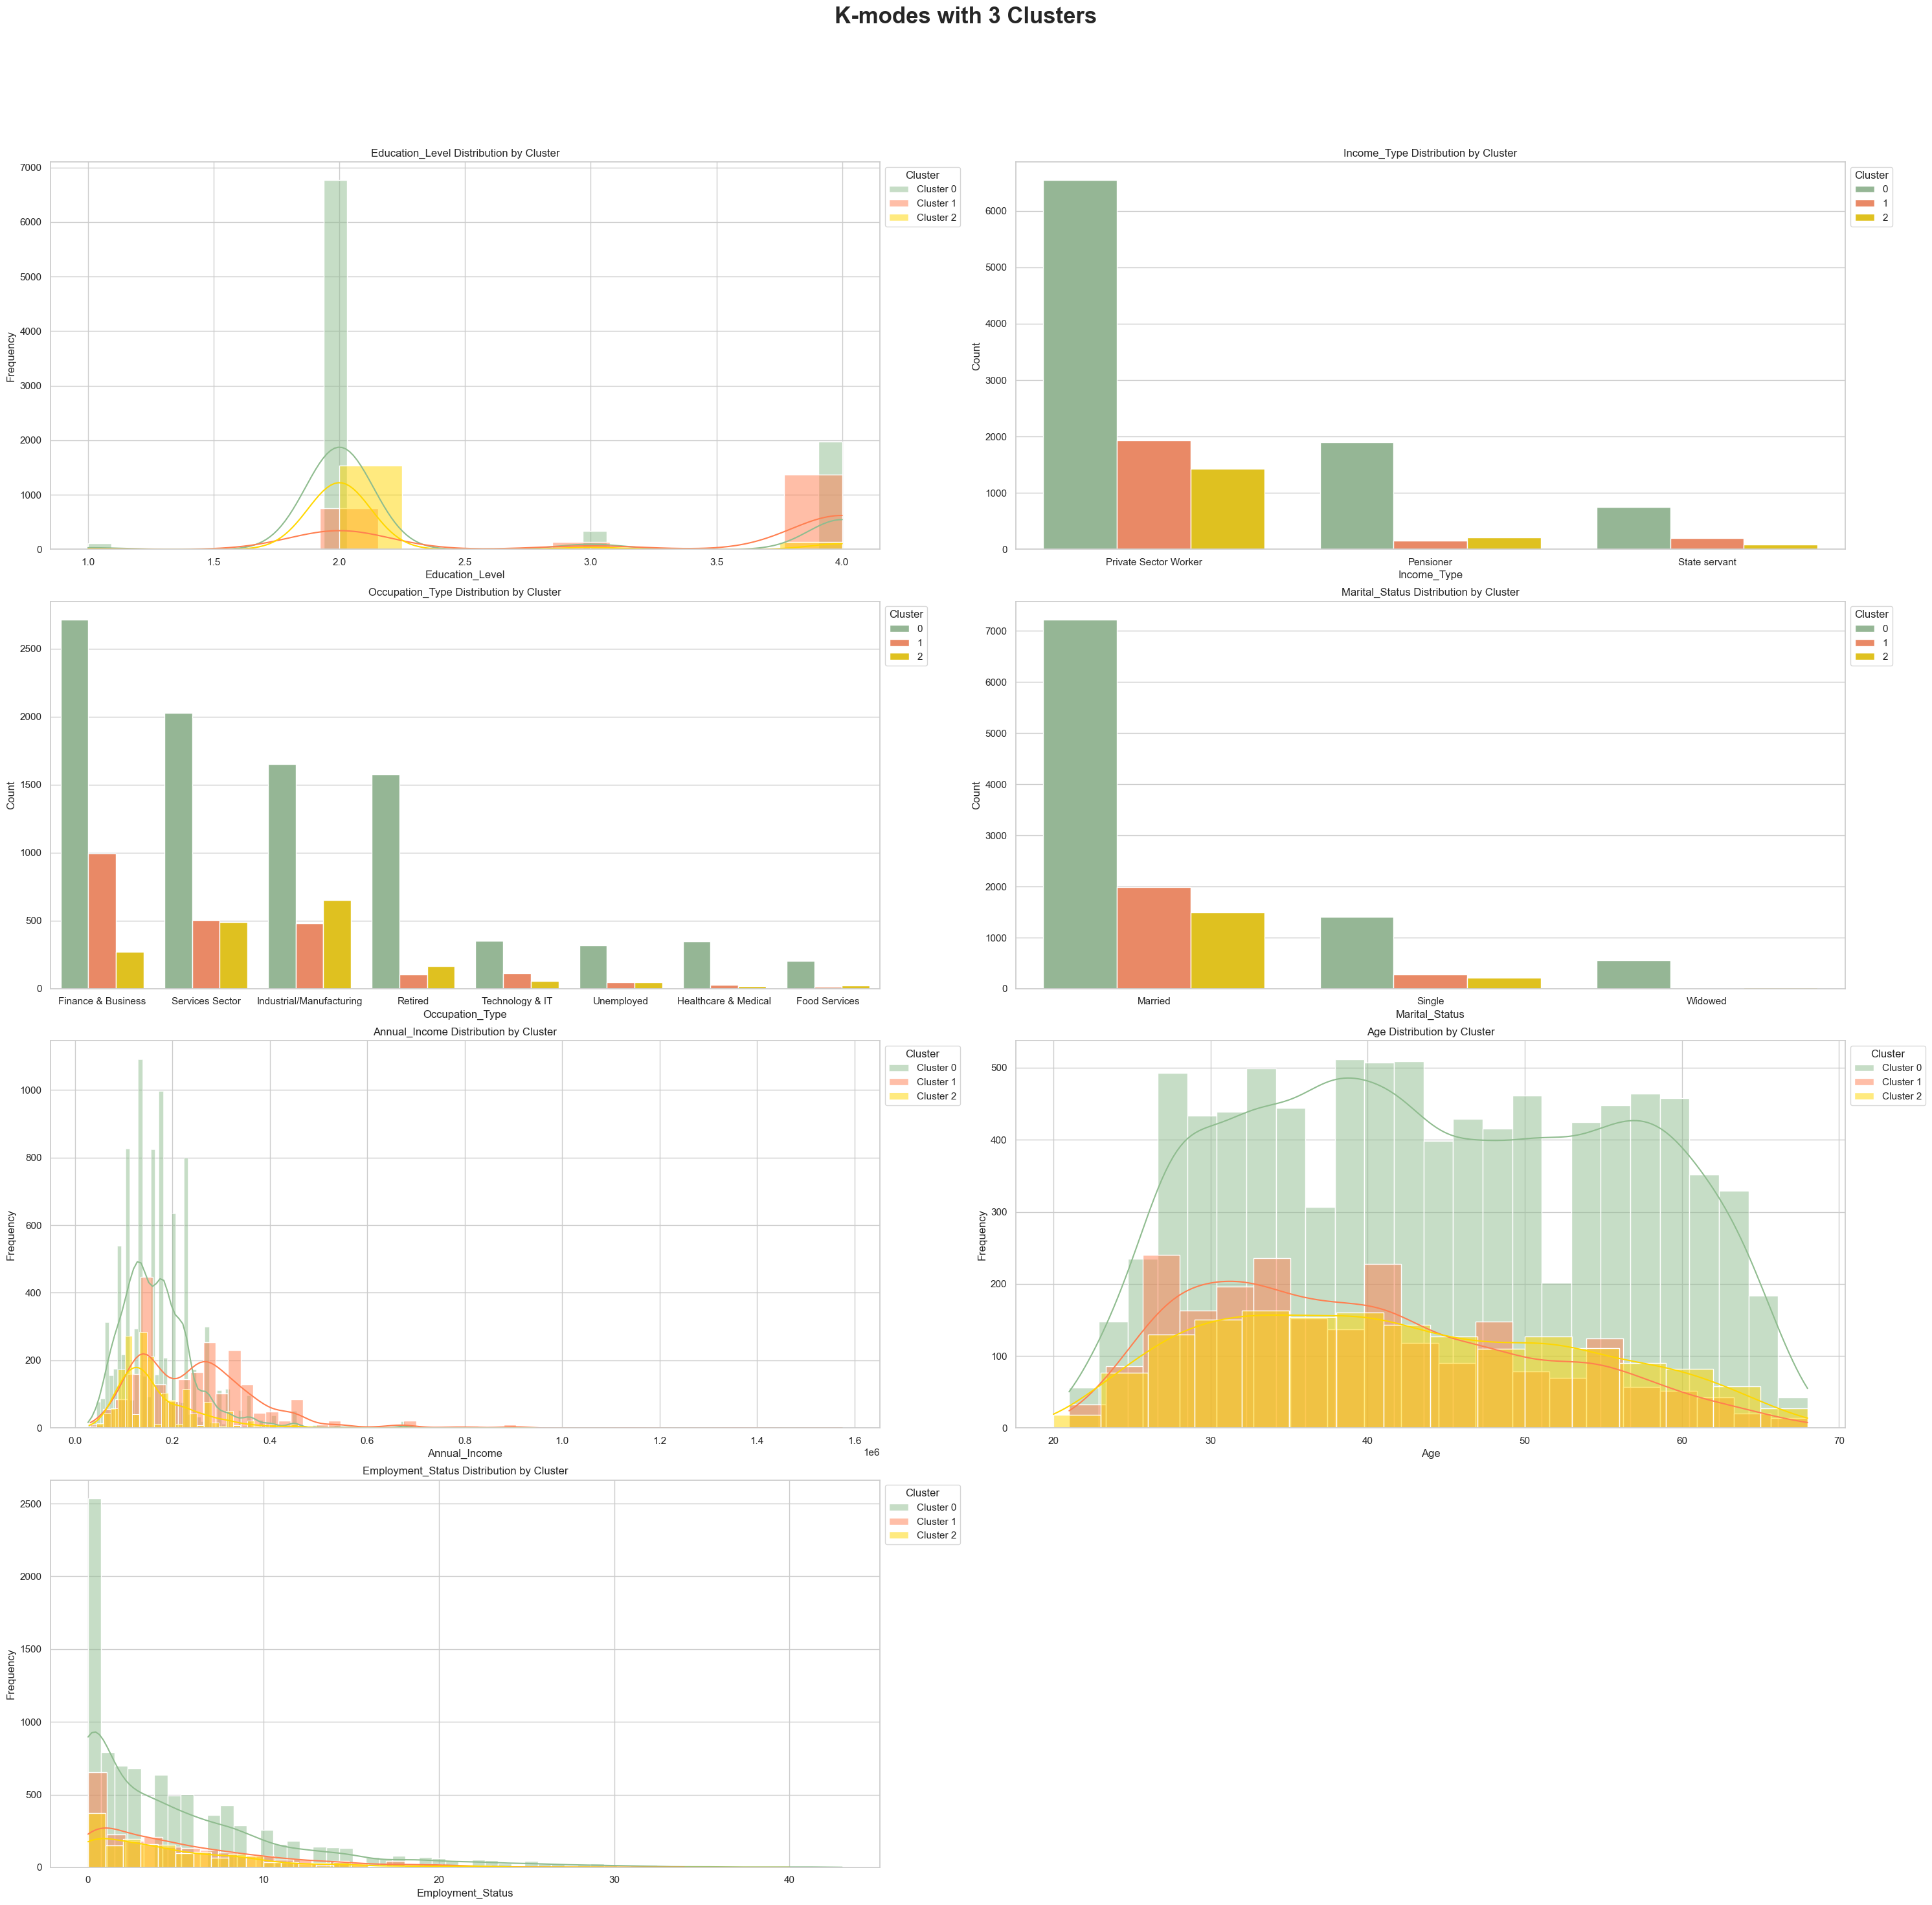

In [253]:
# Define the colors for each cluster 
cluster_colors = ['darkseagreen', 'coral', 'gold']

# Create the figure and subplots (adjusted for more columns)
plt.figure(figsize=(30, 30))  # Increase the figure size for more subplots

# Number of columns to plot
num_columns = len(columns_clusters)

# Adjust the subplot grid based on the number of columns
rows = (num_columns // 2) + (num_columns % 2)  # Calculate the number of rows dynamically

for i, column in enumerate(columns_clusters):
    plt.subplot(rows, 2, i+1)  # Adjust the row and column placement dynamically
    
    if df_clean[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Numeric columns - histograms
        for cluster in range(3):  
            cluster_data = df_clean[df_clean['label_kmodes'] == cluster]
            sns.histplot(cluster_data[column], color=cluster_colors[cluster], label=f'Cluster {cluster}', kde=True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution by Cluster')
    
    else:  # Categorical columns - countplot
        # Categorical columns - bar plots with custom color palette
        sns.countplot(x=column, data=df_clean, hue='label_kmodes', palette=cluster_colors, order=df_clean[column].value_counts().index)
        
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by Cluster')

    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1, 1))  # Move the legend outside

# Add the overall title
plt.suptitle('K-modes with 3 Clusters', fontsize=25, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Adjust the top to make room for the suptitle
plt.show()


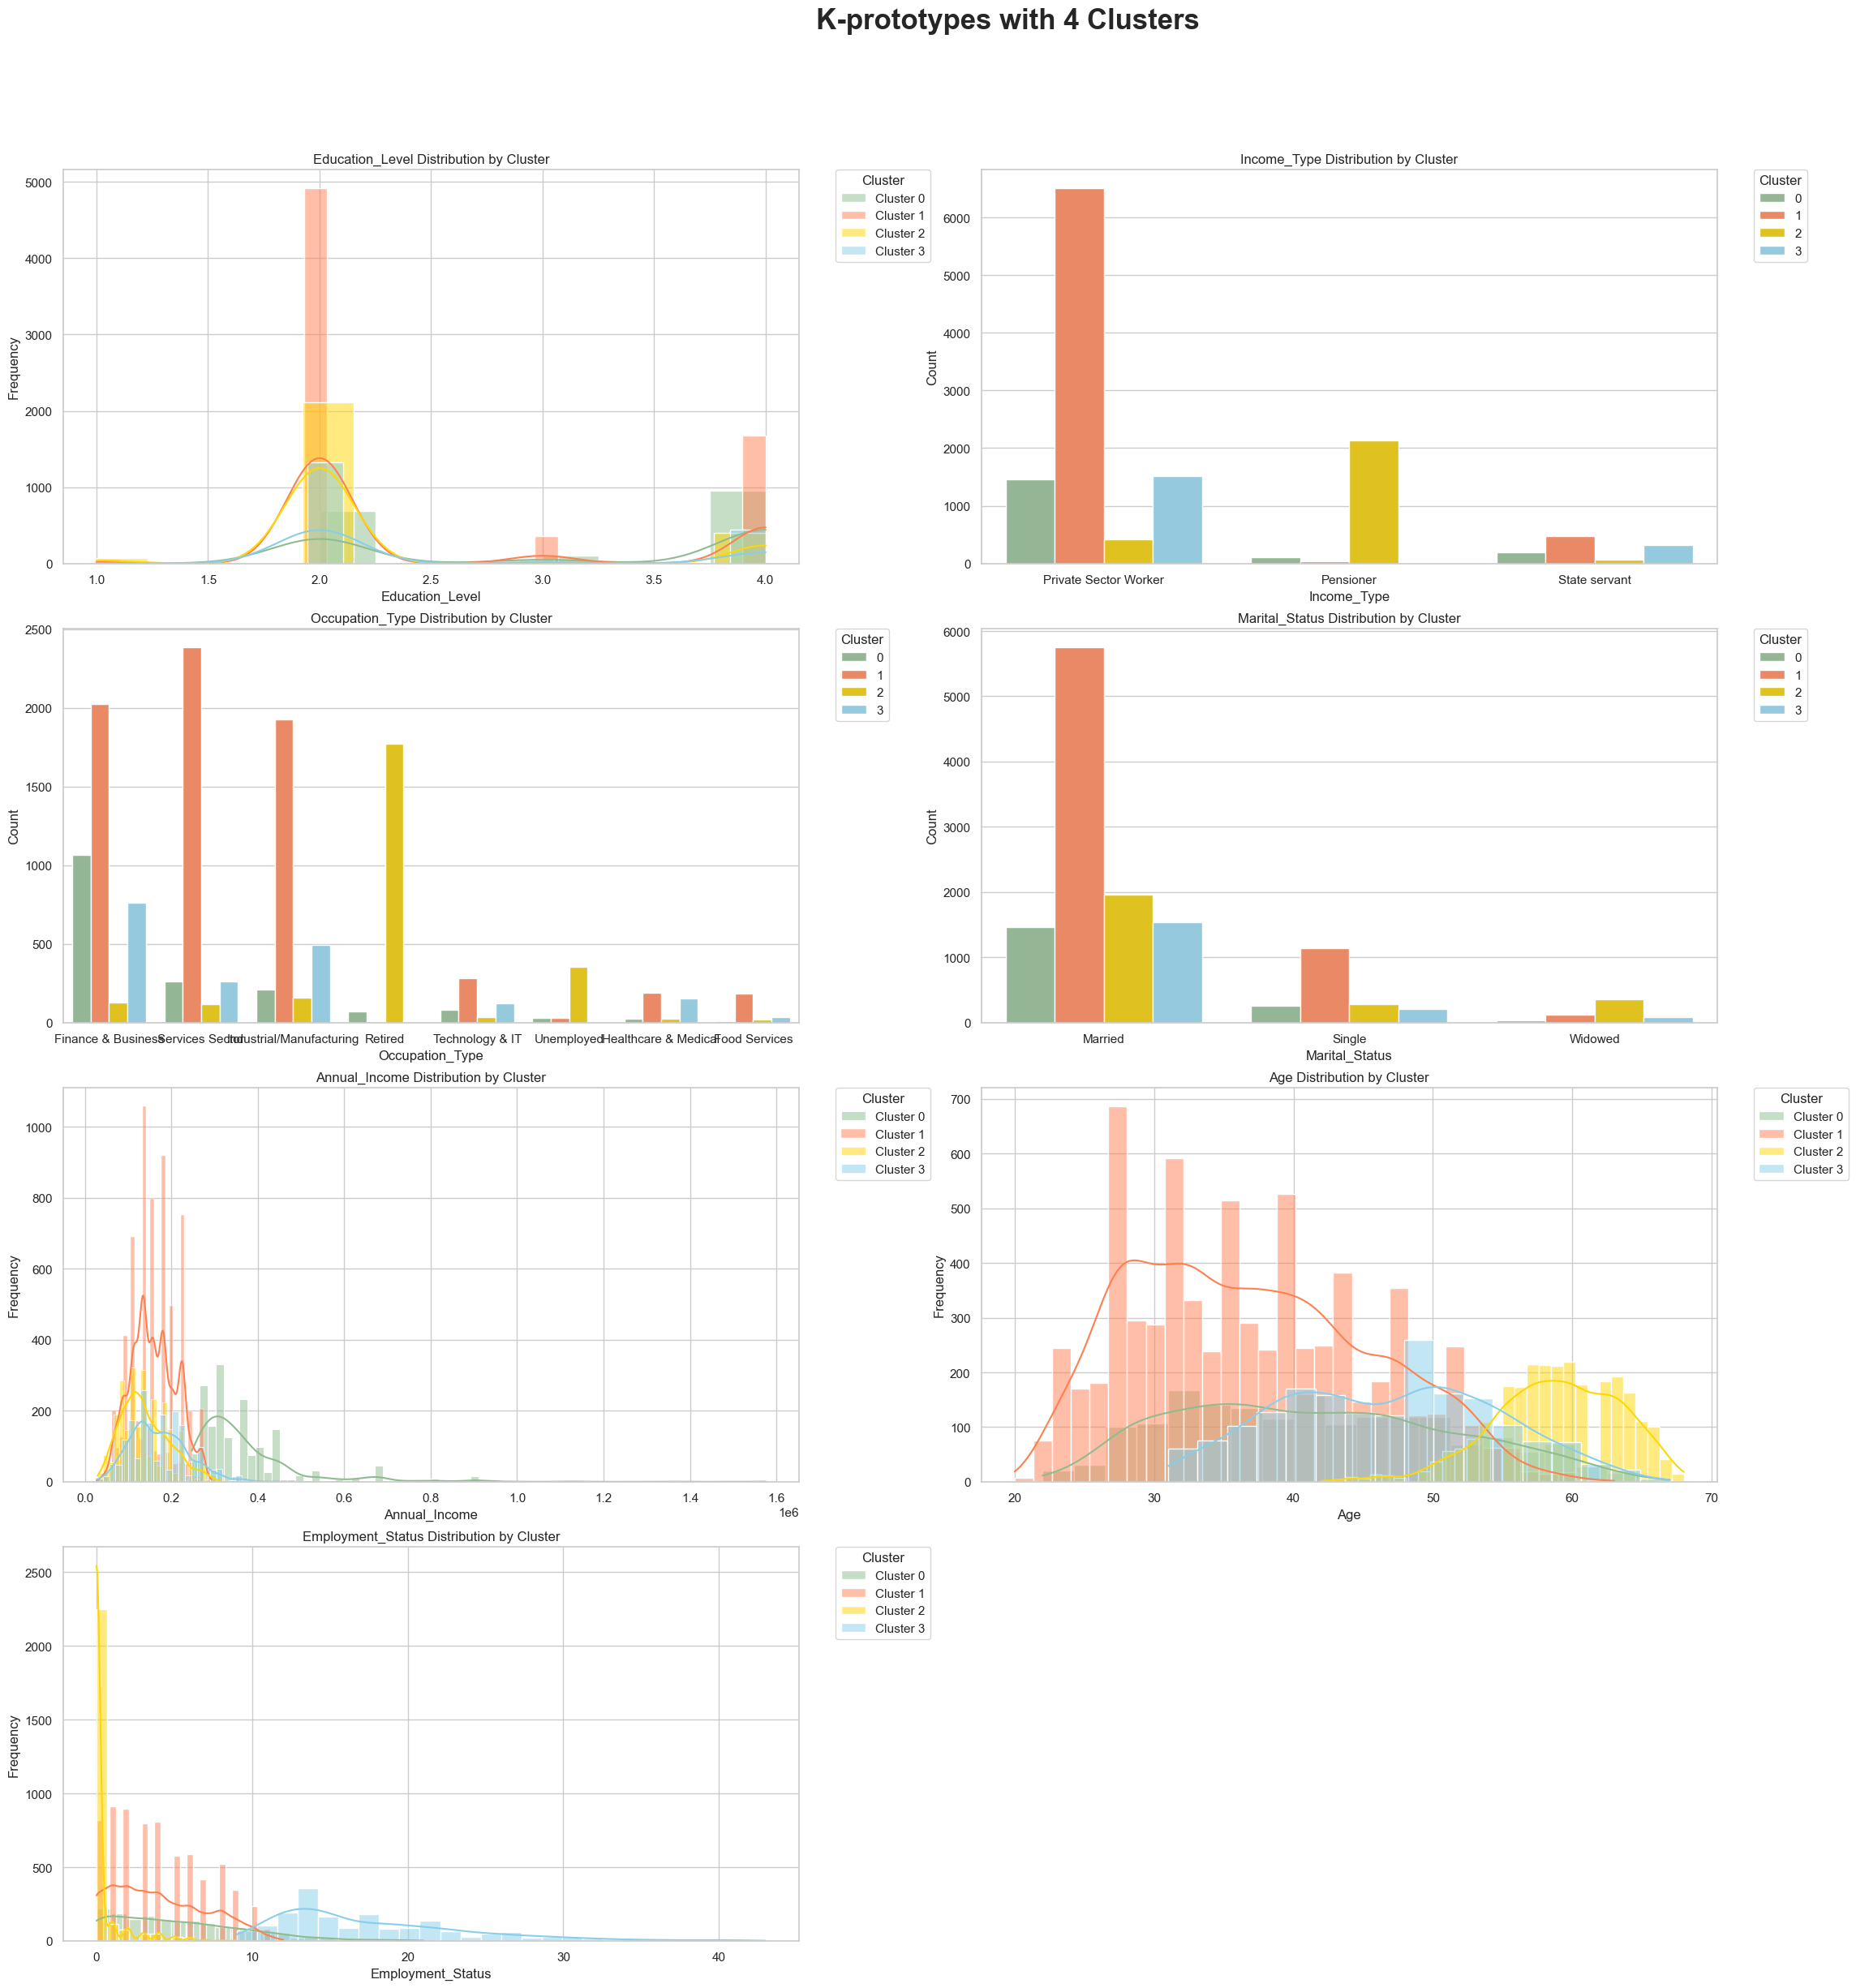

In [264]:
# Define the colors for each cluster 
cluster_colors = ['darkseagreen', 'coral', 'gold','skyblue']

# Create the figure and subplots (adjusted for more columns)
plt.figure(figsize=(25, 25))  

# Number of columns to plot
num_columns = len(columns_clusters)

# Adjust the subplot grid based on the number of columns
rows = (num_columns // 2) + (num_columns % 2)  # Calculate the number of rows dynamically

for i, column in enumerate(columns_clusters):
    plt.subplot(rows, 2, i+1)  # Adjust the row and column placement dynamically
    
    if df_clean[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Numeric columns - histograms
        for cluster in range(4):  
            cluster_data = df_clean[df_clean['label_kproto_4'] == cluster]
            sns.histplot(cluster_data[column], color=cluster_colors[cluster], label=f'Cluster {cluster}', kde=True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution by Cluster')
    
    else:  # Categorical columns - countplot
        # Categorical columns - bar plots with custom color palette
        sns.countplot(x=column, data=df_clean, hue='label_kproto_4', palette=cluster_colors, order=df_clean[column].value_counts().index)
        
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by Cluster')

    # Move the legend outside and adjust its position
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add the overall title
plt.suptitle('K-prototypes with 4 Clusters', fontsize=25, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)  # Adjust the top and right to make room for the suptitle and legend
plt.show()


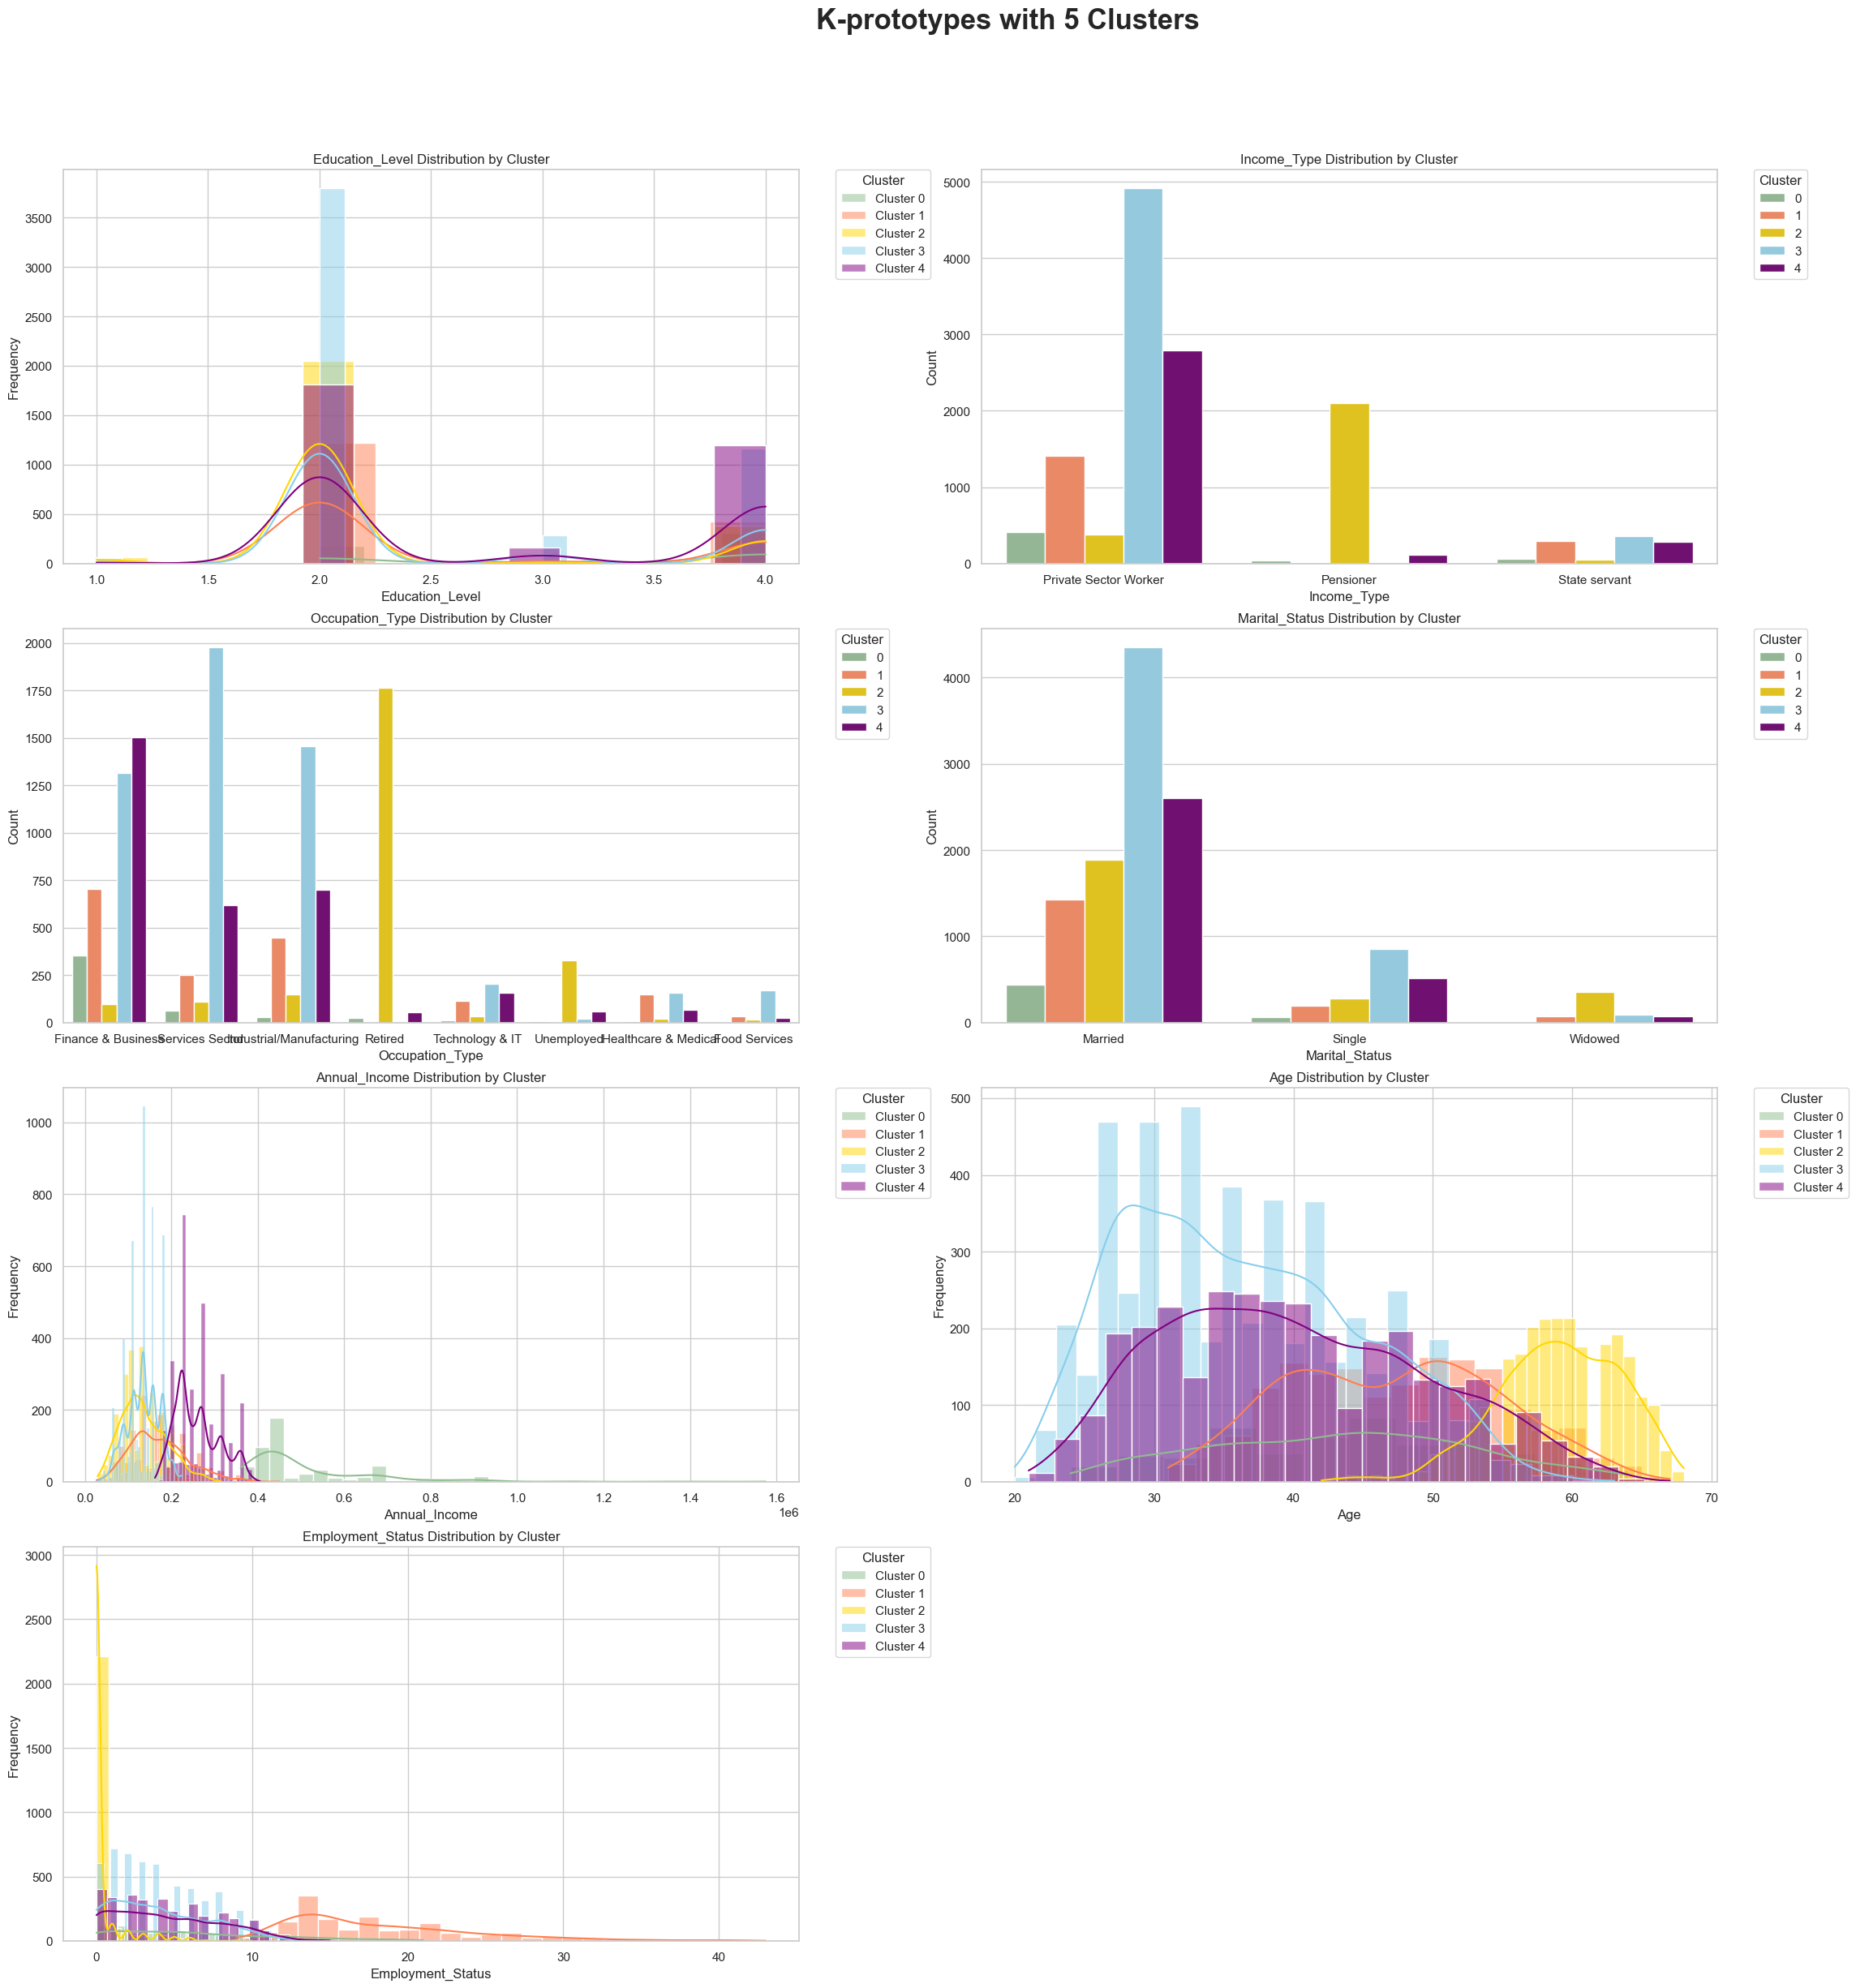

In [266]:
# Define the colors for each cluster (added a color for the 6th cluster)
cluster_colors = ['darkseagreen', 'coral', 'gold', 'skyblue', 'purple', 'orange'] 

# Create the figure and subplots (adjusted for more columns)
plt.figure(figsize=(25, 25))  

# Number of columns to plot
num_columns = len(columns_clusters)

# Adjust the subplot grid based on the number of columns
rows = (num_columns // 2) + (num_columns % 2)  # Calculate the number of rows dynamically

for i, column in enumerate(columns_clusters):
    plt.subplot(rows, 2, i+1)  # Adjust the row and column placement dynamically
    
    if df_clean[column].dtype in ['int64', 'float64']:  # Check if the column is numeric
        # Numeric columns - histograms
        for cluster in range(5):  # Update to loop through 5 clusters
            cluster_data = df_clean[df_clean['label_kproto_5'] == cluster]
            sns.histplot(cluster_data[column], color=cluster_colors[cluster], label=f'Cluster {cluster}', kde=True)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.title(f'{column} Distribution by Cluster')
    
    else:  # Categorical columns - countplot
        # Categorical columns - bar plots with custom color palette
        sns.countplot(x=column, data=df_clean, hue='label_kproto_5', palette=cluster_colors, order=df_clean[column].value_counts().index)
        
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'{column} Distribution by Cluster')

    # Move the legend outside and adjust its position
    plt.legend(title='Cluster', loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Add the overall title
plt.suptitle('K-prototypes with 5 Clusters', fontsize=25, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.subplots_adjust(top=0.9, right=0.85)  # Adjust the top and right to make room for the suptitle and legend
plt.show()


### Conclusion

After evaluating the results from various algorithms, we concluded that the best performing algorithm for this dataset is **K-Prototypes** with **4 clusters**. This approach provided the most meaningful segmentation based on the dataset's characteristics.



In [268]:
df_clean.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0         427500   
5008806        M         1            1                   0         112500   
5008808        F         0            1                   0         270000   
5008810        F         0            1                   0         270000   
5008815        M         1            1                   0         270000   

                     Income_Type  Education_Level Marital_Status  \
Client_ID                                                          
5008804    Private Sector Worker                4        Married   
5008806    Private Sector Worker                2        Married   
5008808    Private Sector Worker                2         Single   
5008810    Private Sector Worker                2         Single   
5008815    Private Sector Worker                4        Married   

                 Housing_Type  Has_Work_Phone  ...  Age  Employment_Status  \
Client_ID                                      ...                           
5008804      Rented Apartment               1  ...   32                 12   
5008806    House or Apartment               0  ...   58                  3   
5008808    House or Apartment               0  ...   52                  8   
5008810    House or Apartment               0  ...   52                  8   
5008815    House or Apartment               1  ...   46                  2   

          Income_Bracket  label_kmodes  label_kmeans_ec_3  label_kmeans_ec_4  \
Client_ID                                                                      
5008804             High             1                  2                  2   
5008806              Low             2                  0                  0   
5008808             High             0                  3                  3   
5008810             High             0                  2                  2   
5008815             High             1                  3                  3   

           label_kmeans_dem_3 label_kmeans_dem_4  label_kproto_4  \
Client_ID                                                          
5008804                     2                  0               0   
5008806                     0                  1               2   
5008808                     0                  1               1   
5008810                     0                  1               1   
5008815                     2                  0               0   

           label_kproto_5  
Client_ID                  
5008804                 0  
5008806                 2  
5008808                 4  
5008810                 4  
5008815                 4  

[5 rows x 25 columns]

In [272]:
columns_to_drop = [
    'label_kmodes', 'label_kmeans_ec_3', 'label_kmeans_ec_4', 
    'label_kmeans_dem_3', 'label_kmeans_dem_4', 'label_kproto_5', 
]

df_clean = df_clean.drop(columns=columns_to_drop)


In [274]:
df_clean.head()

Gender  Owns_Car  Owns_Realty  Number_of_Children  Annual_Income  \
Client_ID                                                                    
5008804        M         1            1                   0         427500   
5008806        M         1            1                   0         112500   
5008808        F         0            1                   0         270000   
5008810        F         0            1                   0         270000   
5008815        M         1            1                   0         270000   

                     Income_Type  Education_Level Marital_Status  \
Client_ID                                                          
5008804    Private Sector Worker                4        Married   
5008806    Private Sector Worker                2        Married   
5008808    Private Sector Worker                2         Single   
5008810    Private Sector Worker                2         Single   
5008815    Private Sector Worker                4        Married   

                 Housing_Type  Has_Work_Phone  Has_Personal_Phone  Has_Email  \
Client_ID                                                                      
5008804      Rented Apartment               1                   0          0   
5008806    House or Apartment               0                   0          0   
5008808    House or Apartment               0                   1          1   
5008810    House or Apartment               0                   1          1   
5008815    House or Apartment               1                   1          1   

              Occupation_Type  Family_Size  Credit_Status  Age  \
Client_ID                                                        
5008804    Finance & Business            2              1   32   
5008806       Services Sector            2              1   58   
5008808       Services Sector            1              2   52   
5008810       Services Sector            1              1   52   
5008815    Finance & Business            2              2   46   

           Employment_Status Income_Bracket  label_kproto_4  
Client_ID                                                    
5008804                   12           High               0  
5008806                    3            Low               2  
5008808                    8           High               1  
5008810                    8           High               1  
5008815                    2           High               0

In [278]:
df_clean.to_csv('df_clean.csv', index=False)
